## ***Enhancing Digital Engagement for Agrinusiness Growth.***

## **Importing Core Data Science and Statistical Libraries**

#### Import the core libraries for data manipulation, statistical modeling, <br> advanced imputation (IterativeImputer for MICE), and visualization.

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import (r2_score, mean_squared_error, 
                             accuracy_score, roc_auc_score, roc_curve,
                             classification_report, confusion_matrix)

from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from tabulate import tabulate

import shap

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("All libraries imported and configured successfully.")

All libraries imported and configured successfully.


In [456]:
## Defining directories 
PROJECT_ROOT = Path("..")

DATA_DIR = PROJECT_ROOT / "data"
OUTPUTS_DIR = PROJECT_ROOT / "outputs"

# Output subfolders
PREPROCESSING_DIR = OUTPUTS_DIR / "01-data-preprocessing-and-validation"
EDA_DIR = OUTPUTS_DIR / "02-exploratory-data-analysis"
MODELING_DIR = OUTPUTS_DIR / "03-modeling-and-predictions"

# Creating folders if they do not exist
DATA_DIR.mkdir(exist_ok=True)
OUTPUTS_DIR.mkdir(exist_ok=True)
PREPROCESSING_DIR.mkdir(exist_ok=True)
EDA_DIR.mkdir(exist_ok=True)
MODELING_DIR.mkdir(exist_ok=True)

In [457]:
# Defining a comprehensive visualization theme and palette

# Custom palette integrating requested colors: green, yellow, water blue, seablue, earth brown, reddish pink
AGRI_COLOR_PALETTE = [
    "#003F27",   # Deep Green (Most impactful/Agribusiness core)
    "#457E4F",   # Lighter Green
    "#b8c412",   # Yellow (Attention/Warning)
    '#00aaff',   # Water Blue (Secondary Engagement)
    "#052442",   # Sea Blue (Deeper Engagement)
    "#4e3827",   # Earth Brown (Trust/Stability)
    "#750A1D"    # Reddish Pink (Instagram/Highlight)
]

# Defining specific social media platform colors for uniformity
PLATFORM_COLORS = {
    'Facebook': "#0D3569",  # Facebook Blue
    'Instagram': "#580F2E", # Reddish Pink (Instagram)
    'Twitter': "#021622",   # Twitter Blue (Water Blue)
    'LinkedIn': '#0077B5',  # LinkedIn Blue/Sea Blue 
}

# Optional Colour variables
agri_green_darker = "#052B0B"  # Deep agribusiness green
agri_yellow_1 = "#d0ff00"      # Vibrant agribusiness yellow
deep_green_1 = "#06362E"
deep_green_2 = "#11572C"
earth_brown_2 = "#693929"
attitude_colors = [deep_green_1, earth_brown_2, deep_green_2, deep_green_1]

# Setting up the global visualization style for thesis-level figures
sns.set_style('whitegrid') # Using a clean, professional grid style
sns.set_context('notebook', font_scale=1.2) # Scaling font for better readability in the notebook
plt.rcParams['figure.figsize'] = (10, 6) # Establishing a uniform default figure size
plt.rcParams['axes.labelweight'] = 'bold' # Making labels bold for thesis professionalism

## **1. Loading and Preparing Dataset:**
### **1.1. Inspecting column headers**

In [458]:
# Loading Data as SMDF
sm_df = pd.read_csv(DATA_DIR / "Agribusiness-Social-Media-Marketing.csv")

print("Shape of Dataset: (Rows, Columns)", sm_df.shape, "\n")
#Show the first 5 rows
sm_df.head(10)

Shape of Dataset: (Rows, Columns) (2548, 19) 



Customer_ID   Age   Gender Location Social_Media_Platform  Follower_Count  \
0     CUST084  41.0   Female    Urban              Facebook         24476.0   
1     CUST077  58.0   Female    Rural              Facebook         49789.0   
2     CUST019  55.0   Female    Rural             Instagram         42019.0   
3     CUST073  35.0     Male    Rural             Instagram         40211.0   
4     CUST095  59.0     Male    Rural              LinkedIn         13503.0   
5     CUST051  53.0   Female    Rural              Facebook         34684.0   
6     CUST080  18.0  Female     Rural              Facebook         10747.0   
7     CUST070  57.0    Male     Rural              LinkedIn         40964.0   
8         NaN  43.0   Female    Rural              LinkedIn          4114.0   
9     CUST072  33.0     Male    Rural             Instagram         12633.0   

   Average_Engagement_Rate  Ad_Click_Through_Rate  \
0                     9.63                   3.73   
1                     5.97                   2.46   
2                     5.55                   2.14   
3                     6.60                   2.79   
4                     0.72                   4.46   
5                     1.60                   0.59   
6                     4.85                   0.28   
7                     6.76                   1.88   
8                     2.15                   3.53   
9                     1.17                   3.89   

   Time_Spent_on_Brand_Content_MinPerWeek  User_Generated_Content_Sharing  \
0                                  228.99                             0.0   
1                                  257.13                             1.0   
2                                   64.56                             0.0   
3                                  204.76                             0.0   
4                                  110.99                             1.0   
5                                  145.92                             1.0   
6                                  264.23                             0.0   
7                                  189.26                             0.0   
8                                  233.01                             0.0   
9                                   42.93                             0.0   

   Purchase_Frequency_PerMonth  Average_Purchase_Value_GHS  Brand_Trust_Score  \
0                          6.0                     1920.20                2.0   
1                          3.0                     1555.17                7.0   
2                          7.0                     1982.31               10.0   
3                          6.0                     1029.46                8.0   
4                          3.0                     1206.28                1.0   
5                          5.0                      698.99                8.0   
6                          8.0                     1152.74                3.0   
7                          4.0                      788.70                4.0   
8                          9.0                     1517.19                6.0   
9                          6.0                     1227.72                6.0   

   Customer_Satisfaction_Score  Brand_Loyalty_Score  \
0                          6.0                  9.0   
1                          1.0                  6.0   
2                          7.0                  5.0   
3                          7.0                  3.0   
4                         10.0                  6.0   
5                          5.0                  4.0   
6                          2.0                  5.0   
7                          1.0                  9.0   
8                          5.0                  2.0   
9                          8.0                  3.0   

   Likelihood_to_Recommend_NPS  Influencer_Impact_Score  \
0                          4.0                      6.0   
1                          9.0                      8.0   
2                        

### **1.2. Standardizing Column Names for Efficiency**

#### Renaming columns is a crucial step for cleaning the code and enhancing efficiency in a complex data analytics process, especially for a large-scale project. <br> The process involve converting the descriptive, long column headers into concise, snake\_case names to facilitate simpler variable referencing in subsequent code cells.

In [459]:
# build rename map using the exact current column names
rename_map = {
    'Customer_ID': 'cust_id',
    'Age': 'age',
    'Gender': 'gender',
    'Location': 'location',
    'Social_Media_Platform': 'platform',
    'Follower_Count': 'followers',
    'Average_Engagement_Rate': 'eng_rate',
    'Ad_Click_Through_Rate': 'ad_click_rate',   # clearer than ad_ctr
    'Time_Spent_on_Brand_Content_MinPerWeek': 'brand_time_week',
    'User_Generated_Content_Sharing': 'ugc_shares',
    'Purchase_Frequency_PerMonth': 'monthly_purchases',
    'Average_Purchase_Value_GHS': 'avg_spend_ghs',
    'Brand_Trust_Score': 'trust_score',
    'Customer_Satisfaction_Score': 'satisfaction_score', # updated to sat_score
    'Brand_Loyalty_Score': 'loyalty_score',
    'Likelihood_to_Recommend_NPS': 'nps_score',
    'Influencer_Impact_Score': 'infl_score',
    'Discount_Promotion_Sensitivity': 'promo_sens',
    'Brand_Switching_Behavior': 'brand_switch'}

# applying renaming
sm_df.rename(columns=rename_map, inplace=True)

# verifying the new column names
for col in sm_df.columns:
    print(col)

cust_id
age
gender
location
platform
followers
eng_rate
ad_click_rate
brand_time_week
ugc_shares
monthly_purchases
avg_spend_ghs
trust_score
satisfaction_score
loyalty_score
nps_score
infl_score
promo_sens
brand_switch


## **2. DATA CLEANING AND PREPROCESSING**
### **2.1. Checking Unique Categorical Values** 
#### The dataset has been split into categorical and numerical columns. A check was run to be sure<br>there are no multiple representations of the same categorical values to avoid dealing with duplicate categories.

In [460]:
# Separating numeric and categorical columns
numCols = sm_df.select_dtypes(include=np.number).columns.tolist()
catCols = sm_df.select_dtypes(include=['object']).columns.tolist()

# Displaying the separated column lists
print("Numerical Columns (numCols):", numCols, "\n")
print("Categorical Columns (catCols):", catCols, "\n")

# Iterating through categorical columns to check for inconsistencies
for col in catCols:
    print(f"--- Checking Column: '{col}' ---")
    # Printing unique values
    unique_values = sm_df[col].unique()
    print(f"Unique values: {unique_values}")
    
    # Printing value counts to highlight inconsistent entries
    print(f"Value counts for {col}:")
    print(sm_df[col].value_counts(dropna=False), '\n')

Numerical Columns (numCols): ['age', 'followers', 'eng_rate', 'ad_click_rate', 'brand_time_week', 'ugc_shares', 'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score', 'promo_sens', 'brand_switch'] 

Categorical Columns (catCols): ['cust_id', 'gender', 'location', 'platform'] 

--- Checking Column: 'cust_id' ---
Unique values: ['CUST084' 'CUST077' 'CUST019' 'CUST073' 'CUST095' 'CUST051' 'CUST080'
 'CUST070' nan 'CUST072' 'CUST008' 'CUST018' 'CUST029' 'CUST081' 'CUST042'
 'CUST079' 'CUST048' 'CUST065' 'CUST086' 'CUST038' 'CUST074' 'CUST055'
 'CUST057' 'CUST076' 'CUST050' 'CUST023' 'CUST091' 'CUST033' 'CUST013'
 'CUST015' 'CUST032' 'CUST068' 'CUST071' 'CUST034' 'CUST011' 'CUST017'
 'CUST001' 'CUST003' 'CUST043' 'CUST096' 'CUST024' 'CUST049' 'CUST088'
 'CUST054' 'CUST069' 'CUST045' 'CUST035' 'CUST022' 'CUST089' 'CUST082'
 'CUST063' 'CUST041' 'CUST006' 'CUST005' 'CUST040' 'CUST031' 'CUST027'
 'CUST020' 'CUST004' 'CUST039' 'CUST

### **2.2. Standardizing Categorical Entries (Removing Whitespace)**
#### The inspection confirmed critical data quality issues in $\mathbf{gender, location}$, and $\mathbf{platform}$ <br> due to inconsistent whitespace (leading or trailing spaces). These inconsistencies prevent accurate analysis and modeling. <br> We are applying the $\mathbf{str.strip()}$ method to these columns to ensure each category has a single, standardized representation. <br> It wwas realised that there are 96 Unique Customer IDs duplicated to create 2548 total rows.

In [461]:
# Cleaning categorical variables to remove whitespaces and standardize values

# Cleaning gender, location, and platform columns in-place
sm_df['gender'] = sm_df['gender'].str.strip().str.title()
sm_df['location'] = sm_df['location'].str.strip().str.title()
sm_df['platform'] = sm_df['platform'].str.strip().str.title()
sm_df['cust_id'] = sm_df['cust_id'].str.strip().str.title()

# Did the cleaning work?
for col in catCols:
    uniqueVals = sm_df[col].unique()
    print(f"{col}: {uniqueVals}\n")
    print(f"Value counts for {col}:")
    print(sm_df[col].value_counts(), '\n\n')

# Checking Unique Customer IDs count
unique_customer_ids = sm_df['cust_id'].nunique()
total_rows = sm_df.shape[0]
print(f"Unique Customer IDs: {unique_customer_ids} out of {total_rows} total rows.")
if unique_customer_ids == total_rows:
    print("All Customer IDs are unique.")

cust_id: ['Cust084' 'Cust077' 'Cust019' 'Cust073' 'Cust095' 'Cust051' 'Cust080'
 'Cust070' nan 'Cust072' 'Cust008' 'Cust018' 'Cust029' 'Cust081' 'Cust042'
 'Cust079' 'Cust048' 'Cust065' 'Cust086' 'Cust038' 'Cust074' 'Cust055'
 'Cust057' 'Cust076' 'Cust050' 'Cust023' 'Cust091' 'Cust033' 'Cust013'
 'Cust015' 'Cust032' 'Cust068' 'Cust071' 'Cust034' 'Cust011' 'Cust017'
 'Cust001' 'Cust003' 'Cust043' 'Cust096' 'Cust024' 'Cust049' 'Cust088'
 'Cust054' 'Cust069' 'Cust045' 'Cust035' 'Cust022' 'Cust089' 'Cust082'
 'Cust063' 'Cust041' 'Cust006' 'Cust005' 'Cust040' 'Cust031' 'Cust027'
 'Cust020' 'Cust004' 'Cust039' 'Cust075' 'Cust002' 'Cust037' 'Cust085'
 'Cust010' 'Cust028' 'Cust090' 'Cust058' 'Cust060' 'Cust092' 'Cust052'
 'Cust044' 'Cust021' 'Cust083' 'Cust066' 'Cust026' 'Cust047' 'Cust053'
 'Cust014' 'Cust087' 'Cust094' 'Cust059' 'Cust036' 'Cust078' 'Cust007'
 'Cust012' 'Cust064' 'Cust025' 'Cust061' 'Cust030' 'Cust016' 'Cust009'
 'Cust056' 'Cust093' 'Cust046' 'Cust067' 'Cust062']

Value count

#### **There 2548 total rows and 96 unique cust_ids.** <br> It is important that the rows are checked to ensure that there are distinct observations (panel data) rather than identical duplicate entries across all variables.<br>So, there was a check conducted for any instances where two or more rows are identical across all columns, despite having the same cust_id. <br> This check is essential, as finding true duplicates means they offer no new information, and they should be dropped before modeling to avoid inflating confidence/standard errors.

In [462]:

# Checking if the observation data is identical.
# Excluding 'cust_id' and including ALL other columns.
columns_to_check = sm_df.columns.drop('cust_id').tolist()

# --- 2. Find True Identical Duplicate Observations ---
# True Duplicates are identified as rows that have the same value across ALL observation columns.
true_duplicates_all_cols = sm_df[sm_df.duplicated(subset=columns_to_check, keep=False)]

# Calculate the number of rows that are identical to another row
num_true_duplicates = len(true_duplicates_all_cols)
num_true_duplicates_to_drop = sm_df.duplicated(subset=columns_to_check, keep='first').sum()


print(f"Total Rows Checked: {len(sm_df)}")
print(f"Number of columns checked for identity: {len(columns_to_check)}")
print("\n--- Check for Identical Observations Across All Columns (True Duplicates) ---")
print(f"Number of rows that are IDENTICAL to another row (both marked): {num_true_duplicates}")
print(f"Number of identical rows that will be DROPPED (keeping first instance): {num_true_duplicates_to_drop}")



Total Rows Checked: 2548
Number of columns checked for identity: 18

--- Check for Identical Observations Across All Columns (True Duplicates) ---
Number of rows that are IDENTICAL to another row (both marked): 2011
Number of identical rows that will be DROPPED (keeping first instance): 1837


#### **There was a monumental finding that will fundamentally change the nature of the data and the analysis approach.** <br> The original data suffered a massive redundancy of 1933 rows. Keeping these redundant rows can result in <br> an inflated sample size, highly misleading p-values, and false confidence in the stability of models, causing a serious statistical error. <br> These rows were dropped, leaving the number of truly unique observations remaining to be 2548−1837=711 rows.

In [463]:
# Dropping True Duplicates to prepare the Final DataFrame ---
if num_true_duplicates_to_drop > 0:
    # Drop identical rows in-place and reindex in-place (no reassignment)
    sm_df.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)
    sm_df.reset_index(drop=True, inplace=True)

    print("\n True Identical Duplicate rows dropped.")
    print(f"Final Total Observations (N): {len(sm_df)}")
else:
    # don't create a copy if no duplicates to drop
    print("\n No true identical duplicate rows found. The data is entirely composed of unique observations.")
    
# --- 4. Final Panel Structure Confirmation ---
final_unique_cust_ids = sm_df['cust_id'].nunique()

print(f"Final Unique Customers (n): {final_unique_cust_ids}")
print(f"The number of rows per customer now represents unique observations for that customer.")


 True Identical Duplicate rows dropped.
Final Total Observations (N): 711
Final Unique Customers (n): 96
The number of rows per customer now represents unique observations for that customer.


### **2.3. Handling Missing Values** 
#### Total missing values add up to 750 

In [464]:
# Quantifying missing values across all columns
missing_data = pd.DataFrame({
    'Total Missing': sm_df.isnull().sum(),
    'Percentage': (sm_df.isnull().sum() / len(sm_df)) * 100
})

# Filtering and displaying columns with missing data, sorted by percentage
missing_data = missing_data[missing_data['Total Missing'] > 0].sort_values(by='Percentage', ascending=False)
print("Missing Values Analysis (Top Missing Columns):")
print(missing_data.round(2), "\n")

print(f"Total missing data after standardization: {sm_df.isnull().sum().sum()}")

Missing Values Analysis (Top Missing Columns):
                    Total Missing  Percentage
platform                       53        7.45
nps_score                      50        7.03
trust_score                    47        6.61
infl_score                     42        5.91
brand_time_week                42        5.91
monthly_purchases              41        5.77
satisfaction_score             41        5.77
ad_click_rate                  40        5.63
avg_spend_ghs                  40        5.63
ugc_shares                     39        5.49
followers                      39        5.49
age                            39        5.49
gender                         38        5.34
eng_rate                       38        5.34
loyalty_score                  38        5.34
promo_sens                     36        5.06
brand_switch                   36        5.06
location                       34        4.78
cust_id                        17        2.39 

Total missing data after standa


#### **cust_id** <br> Dropping rows with missing cust_id: This is just an identifier, non-analytical <br> and a low priority column. Dropping missing values in this column will not affect our <br> analysis but ensure a clean list of valid customer IDs. 
#### **Platforms & Demographics** 
#### **Categorical(catCols):** gender, location and platform have been imputed with their respective modes. <br> **Numerical(numCols):** age has also been imputed the median value.

In [465]:
# Checking missing values in cust_id column
print("Total missing values in column['cust_id'] is:", sm_df['cust_id'].isnull().sum())

# Dropping rows where cust_id is missing
sm_df = sm_df.dropna(subset=['cust_id'])

# Verifying that no missing value remains in the column
print("Total missing values in column['cust_id'] is:", sm_df['cust_id'].isnull().sum())

# Imputing categorical columns with their respective modes
for col in catCols:
    col_mode = sm_df[col].mode()[0]
    sm_df[col] = sm_df[col].fillna(col_mode)

# Imputing Numerical [age] column with median 
median_age = sm_df['age'].median()
sm_df['age'] = sm_df['age'].fillna(median_age)

# Verifying that no missing value remains in the columns imputed
cols_to_check = ['gender', 'location', 'platform', 'age']
values_missing = sm_df[cols_to_check].isnull().sum()
print("\n----MISSING VALUES AFTER IMPUTATION----\n",values_missing)

Total missing values in column['cust_id'] is: 17
Total missing values in column['cust_id'] is: 0

----MISSING VALUES AFTER IMPUTATION----
 gender      0
location    0
platform    0
age         0
dtype: int64


#### **Followers:**
#### Given that $\mathbf{followers}$ counts are typically highly skewed, the **Median Imputation** strategy was used. <br> This approach is more robust than using the mean, as the median is less influenced by potential outliers.


In [466]:
# Checking missing 'followers' values
print(f"Missing 'followers' before imputation:, {sm_df['followers'].isnull().sum()}")

# Summary Statistics for followers count before imputation
original_followers_stats = sm_df['followers'].describe().round(2)

# Calculating the median of values in the 'followers' column.
median_followers = sm_df['followers'].median()

# imputing the median valueu
sm_df['followers'] = sm_df['followers'].fillna(median_followers)

# Summary Statistics for followers count after imputation
imputed_followers_stats = sm_df['followers'].describe().round(2)

# Verifying that no missing value remains in the 'followers' column
print(f"Missing 'followers' after imputation:, {sm_df['followers'].isnull().sum()}\n")

# Validating the imputation by comparing the summary statistics 
print(f"---original followers stats---\n{original_followers_stats} \n\n ---imputed followers stats---\n{imputed_followers_stats}\n")


Missing 'followers' before imputation:, 38
Missing 'followers' after imputation:, 0

---original followers stats---
count      656.00
mean     25131.82
std      15090.59
min        290.00
25%      10777.00
50%      25647.00
75%      39890.00
max      49858.00
Name: followers, dtype: float64 

 ---imputed followers stats---
count      694.00
mean     25160.03
std      14671.48
min        290.00
25%      10993.00
50%      25647.00
75%      38310.00
max      49858.00
Name: followers, dtype: float64



####  **eng_rate**  
#### Imputation was done with Iterative Imputer using a Linear Regression estimator. <br> This method was adopted to ensure the most accurate prediction of all null values in the 'eng_rate' column.

Checking missing 'eng_rate' values before imputation: 37

 The Kernel Density Estimate plot shows the difference between 
 the distribution before and after imputation


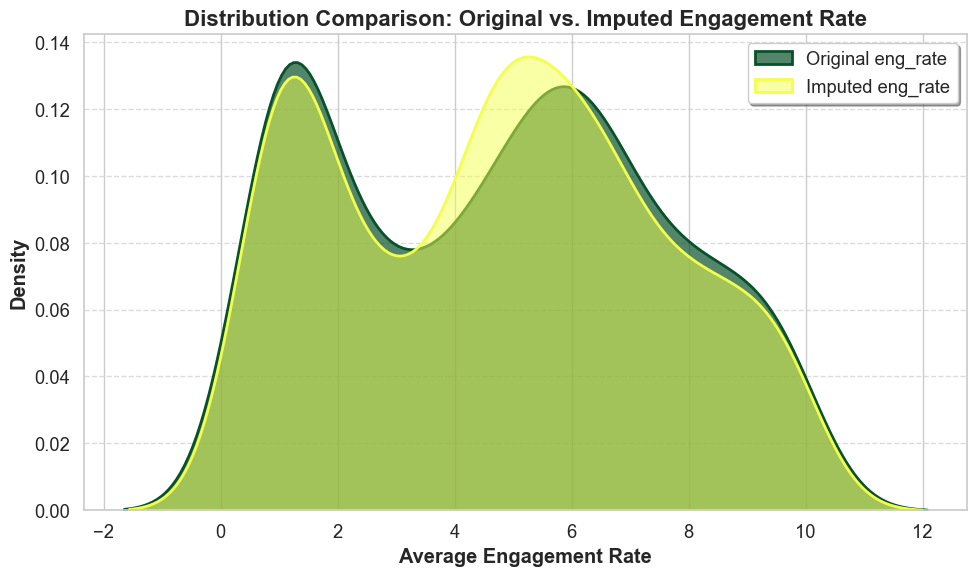

'eng_rate' imputed, validated, and optimized.
Checking missing 'eng_rate' values after final imputation: 0


In [467]:
# Checking missing 'eng_rate' before imputation
print("Checking missing 'eng_rate' values before imputation:", sm_df['eng_rate'].isnull().sum())
print("\n The Kernel Density Estimate plot shows the difference between \n the distribution before and after imputation")

# Initializing IterativeImputer with a simple Linear Regression estimator
imputer_eng_rate = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=RANDOM_SEED)

# Reshaping the 'eng_rate' column for the imputer (required for single-feature input)
# Note: For thesis-level rigor, passing the entire numerical matrix to the MICE imputer is recommended.
eng_rate_reshaped = sm_df['eng_rate'].values.reshape(-1, 1)

# Fitting and transforming the data to create the imputed column
sm_df['eng_rate_imputed'] = imputer_eng_rate.fit_transform(eng_rate_reshaped)

# Validating the imputation by comapring KDE plots of the  original eng_rate and imputed
# Defining custom colors for the plot
ORIGINAL_FILL_COLOR = "#085229C5"
IMPUTED_COLOR = "#f3ff4cbc"  

plt.figure(figsize=(10, 6))
# 1. Plotting the Original distribution to compare with the imputed
# Using 'fill=True' and 'alpha' to avoid the FutureWarning and set transparency
sns.kdeplot(
    sm_df['eng_rate'], 
    label='Original eng_rate', # Temporarily change label for clarity
    color=ORIGINAL_FILL_COLOR, 
    fill=True, 
    linewidth = 2,
    linestyle = '-',
    alpha=0.7, # Setting alpha for transparency
)
# 2. Plotting the Imputed distribution
sns.kdeplot(
    sm_df['eng_rate_imputed'], 
    label='Imputed eng_rate', 
    color=IMPUTED_COLOR, 
    fill=True, 
    linewidth=2,
    alpha=0.5 
)
# Setting the visualization parameters
plt.title('Distribution Comparison: Original vs. Imputed Engagement Rate', weight='bold', fontsize=16)
plt.xlabel('Average Engagement Rate', weight='bold')
plt.ylabel('Density', weight='bold')

# Creating the final legend by renaming the original line item
handles, labels = plt.gca().get_legend_handles_labels()
# Assuming the first two handles correspond to the original fill and original line
handles[0] = handles[0] # The fill element
labels[0] = 'Original eng_rate' # Renaming the fill label to be the main entry 

plt.legend(frameon=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(
    PREPROCESSING_DIR/ 
    "Distribution-Comparison-Original-vs-Imputed-Engagement-Rate.png",
    bbox_inches="tight")
plt.show()

# Replacing the original column with the imputed one
sm_df['eng_rate'] = sm_df['eng_rate_imputed']

# Dropping the temporary imputed column
sm_df.drop(columns=['eng_rate_imputed'], inplace=True)

print("'eng_rate' imputed, validated, and optimized.")
print("Checking missing 'eng_rate' values after final imputation:", sm_df['eng_rate'].isnull().sum())

#### **ad_click_rate | brand_time_week | ugc_shares:**
 * #### **$\mathbf{ad\_click\_rate}$ & $\mathbf{brand\_time\_week}$ (Numerical):** These are quantitative metrics that often show skewness (e.g., brand time has a floor of zero). The **Median** is chosen as a robust measure to handle potential outliers and preserve the central tendency of the data.
 * #### **$\mathbf{ugc\_shares}$ (Binary/Categorical):** Since this column is binary (0 or 1), using the mean or median would inappropriately yield a decimal value. We are correctly using the **Mode (most frequent value)** to ensure the imputed values remain within the valid set {0, 1}, preserving the data type and interpretability.

In [468]:
# --- 0. CRITICAL: Save Original State Before Imputation ---
# This CREATES the columns that the visualization relies on.
sm_df['ad_click_rate_original'] = sm_df['ad_click_rate'].copy()
sm_df['brand_time_week_original'] = sm_df['brand_time_week'].copy()
sm_df['ugc_shares_original'] = sm_df['ugc_shares'].copy() # Used for bar plot comparison

# Storing the number of missing values for the bar plot logic
N_imputed_ugc = sm_df['ugc_shares'].isnull().sum()

print(f"Missing 'ad_click_rate' before MICE: {sm_df['ad_click_rate'].isnull().sum()}")
print(f"Missing 'brand_time_week' before MICE: {sm_df['brand_time_week'].isnull().sum()}")
print(f"Missing 'ugc_shares' before Mode Imputation: {N_imputed_ugc}\n") 

#### ---1. MICE Imputation for Ad_Click_Rate & Brand_Time_Week--- ####
# Identifying the numerical columns for MICE
mice_cols = ['brand_time_week', 'ad_click_rate']

# Re-initializing MICE Imputer
mice_imputer_re = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=RANDOM_SEED)

# Applying the imputer to the numerical subset
imputed_data_re = mice_imputer_re.fit_transform(sm_df[mice_cols])

# Re-inserting the imputed data back into the original DataFrame
sm_df[mice_cols] = imputed_data_re

#### ---2. Mode Imputation for UGC_Shares (Binary)--- ####
# Creating a variable to store the mode for 'ugc_shares' (ensures binary value)
mode_ugc = sm_df['ugc_shares'].mode()[0]

# Imputing missing 'ugc_shares' with the mode value
sm_df['ugc_shares'] = sm_df['ugc_shares'].fillna(mode_ugc)

# Converting the column to the correct integer type (0 or 1)
sm_df['ugc_shares'] = sm_df['ugc_shares'].round(0).astype(int)

# Verifying the imputation status
print(f"Missing 'ad_click_rate' after MICE: {sm_df['ad_click_rate'].isnull().sum()} ")
print(f"Missing 'brand_time_week' after MICE: {sm_df['brand_time_week'].isnull().sum()} ")
print(f"Missing 'ugc_shares' after Mode Imputation: {sm_df['ugc_shares'].isnull().sum()} \n")

Missing 'ad_click_rate' before MICE: 38
Missing 'brand_time_week' before MICE: 42
Missing 'ugc_shares' before Mode Imputation: 39

Missing 'ad_click_rate' after MICE: 0 
Missing 'brand_time_week' after MICE: 0 
Missing 'ugc_shares' after Mode Imputation: 0 



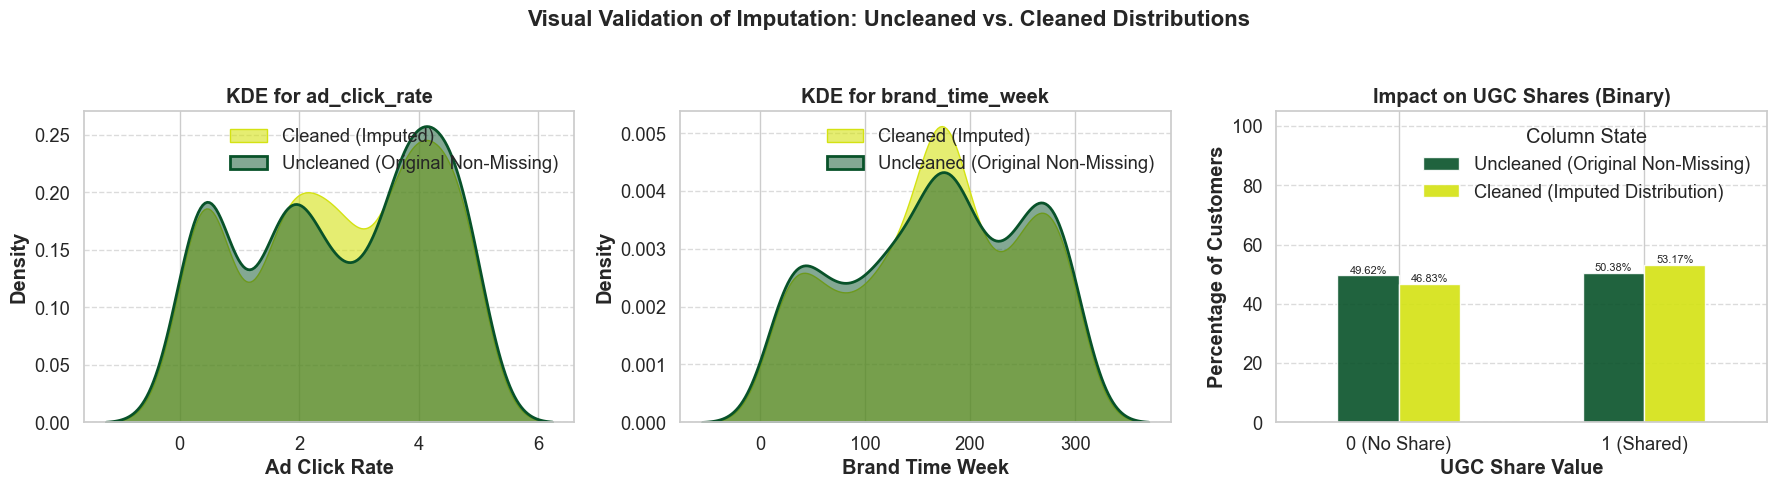

In [469]:
#### ---Validating the Imputations with Visualizations--- ####

# Identifying columns for visualization
kde_cols = ['ad_click_rate', 'brand_time_week']
# Defining visualization style colors
IMPUTED_COLOR = "#d4e212"    # Yellow (Cleaned/Imputed)
ORIGINAL_COLOR = "#085229"  # Deep Earth Green (Uncleaned)

# Setting up the plot area for 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visual Validation of Imputation: Uncleaned vs. Cleaned Distributions', weight='bold', fontsize=16)

#### ---Plotting ad_click_rate and brand_time_week (KDE Plots)--- ####
for i, col in enumerate(kde_cols):
    ax = axes[i]
    # Get the original (pre-imputation) series, which is now guaranteed to exist
    original_series = sm_df[f'{col}_original'] 

    # 1. Plotting the Imputed distribution (full dataset)
    sns.kdeplot(sm_df[col], label='Cleaned (Imputed)', color=IMPUTED_COLOR, fill=True, alpha=0.6, ax=ax)
    
    # 2. Plotting the Original (Non-Missing) distribution line
    sns.kdeplot(original_series.dropna(), label='Uncleaned (Original Non-Missing)',color=ORIGINAL_COLOR, fill=True, alpha=0.5, linewidth=2, linestyle='-', ax=ax)
    
    ax.set_title(f'KDE for {col}', weight='bold')
    ax.set_xlabel(col.replace('_', ' ').title(), weight='bold')
    ax.legend(loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 3.2. Plotting ugc_shares (Bar Plot)
ax_ugc = axes[2]

# We must use the 'ugc_shares_original' column to calculate the true original distribution
original_non_missing = sm_df['ugc_shares_original'].dropna()

# a. Calculating Original (Non-Missing Rows Only) Counts (Percentage)
original_counts = original_non_missing.value_counts(normalize=True).sort_index() * 100

# b. Calculating Final Imputed Counts (Percentage)
imputed_counts = sm_df['ugc_shares'].value_counts(normalize=True).sort_index() * 100

# BAR PLOT FIX: Use pd.concat for reliable alignment and then assign string labels.
comparison_percentages = pd.concat({'Uncleaned (Original Non-Missing)': original_counts,'Cleaned (Imputed Distribution)': imputed_counts}, axis=1).round(2)

# Ensure both 0 and 1 are in the index (for plotting two bars)
if 0 not in comparison_percentages.index:
    comparison_percentages.loc[0] = 0.0
if 1 not in comparison_percentages.index:
    comparison_percentages.loc[1] = 0.0
comparison_percentages.sort_index(inplace=True)

# Map numeric index (0, 1) to descriptive string labels
comparison_percentages.index = comparison_percentages.index.map(lambda x: f'{int(x)} (No Share)' if x == 0 else f'{int(x)} (Shared)')

# Plotting the comparison side-by-side
comparison_percentages.plot(kind='bar', color=[ORIGINAL_COLOR, IMPUTED_COLOR], alpha=0.9, ax=ax_ugc)

# Setting up labels and titles for UGC plot
ax_ugc.set_title('Impact on UGC Shares (Binary)', weight='bold')
ax_ugc.set_xlabel('UGC Share Value', weight='bold')
ax_ugc.set_ylabel('Percentage of Customers', weight='bold')
ax_ugc.set_ylim(0, 105)
ax_ugc.tick_params(axis='x', rotation=0)
ax_ugc.legend(title='Column State')
ax_ugc.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for container in ax_ugc.containers:
    plt.bar_label(container, fmt='%.2f%%', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(PREPROCESSING_DIR / 
            "Visual-Validation-of-Imputation-Raw-vs-Cleaned-Distributions", 
            bbox_inches="tight")
plt.show()

# Clean up temporary columns
sm_df.drop(columns=['ad_click_rate_original', 'brand_time_week_original', 'ugc_shares_original'], inplace=True)
plt.show()

### **Core Outcome Variables**
#### **'monthly_purchases' and 'avg_spend_ghs'**.<br>These are very crucial outcome variables. Imputed values are supposed to be true reflection of the impact of other variable like 'age', 'location', 'trust_score', 'brand_switch' etc. So, to achieve a more likely accurate reflection, model-based imputation was used.<br>The model of choice in this case is ***Random Forest Regressor.***
#### **avg_spend_ghs <br>monthly_purchases:**

In [470]:
# Creating temporary original columns for robust diagnostics
sm_df['avg_spend_ghs_original'] = sm_df['avg_spend_ghs'].copy()
sm_df['monthly_purchases_original'] = sm_df['monthly_purchases'].copy()

# Variables to hold the original series (with NaNs)
avg_spend_ghs_original = sm_df['avg_spend_ghs_original']
monthly_purchases_original = sm_df['monthly_purchases_original']
nan_count_spend = avg_spend_ghs_original.isnull().sum()
nan_count_purchases = monthly_purchases_original.isnull().sum()
print(f"Missing 'avg_spend_ghs' before imputation: {nan_count_spend}")
print(f"Missing 'monthly_purchases' before imputation: {nan_count_purchases}\n")

# --- 1. Imputation for avg_spend_ghs ---
predictors_spend = [
    'age', 'gender', 'location', 'platform', 'followers', 'eng_rate',
    'ad_click_rate', 'brand_time_week', 'ugc_shares', 'trust_score',
    'satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score',
    'promo_sens', 'brand_switch']

train_df = sm_df[sm_df['avg_spend_ghs'].notnull()] 
to_impute_df = sm_df[sm_df['avg_spend_ghs'].isnull()] 
X_train_spend = pd.get_dummies(train_df[predictors_spend])
Y_train_spend = train_df['avg_spend_ghs']
X_to_impute_spend = pd.get_dummies(to_impute_df[predictors_spend])
X_to_impute_spend = X_to_impute_spend.reindex(columns=X_train_spend.columns, fill_value=0)

imputer = SimpleImputer(strategy='median')
X_train_Imp = imputer.fit_transform(X_train_spend)
X_to_impute_Imp = imputer.transform(X_to_impute_spend)

model = RandomForestRegressor(n_estimators=100, random_state = 42, n_jobs=-1)
model.fit(X_train_Imp, Y_train_spend)
imputed_values_spend = model.predict(X_to_impute_Imp)

# UPDATE: The imputation is now applied to the main sm_df
sm_df.loc[sm_df['avg_spend_ghs'].isnull(), 'avg_spend_ghs'] = imputed_values_spend

# --- 2. Imputation for monthly_purchases ---
predictors_purchases = [
    'age', 'gender', 'location', 'platform', 'followers', 'eng_rate',
    'ad_click_rate', 'brand_time_week', 'ugc_shares', 'trust_score',
    'satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score',
    'promo_sens', 'brand_switch', 'avg_spend_ghs'] # Using imputed avg_spend_ghs

train_df = sm_df[sm_df['monthly_purchases'].notnull()] 
to_impute_df = sm_df[sm_df['monthly_purchases'].isnull()] 
X_train_purchases = pd.get_dummies(train_df[predictors_purchases])
Y_train_purchases = train_df['monthly_purchases']
X_to_impute_purchases = pd.get_dummies(to_impute_df[predictors_purchases])
X_to_impute_purchases = X_to_impute_purchases.reindex(columns=X_train_purchases.columns, fill_value=0)

imputer = SimpleImputer(strategy='median')
X_train_Imp = imputer.fit_transform(X_train_purchases)
X_to_impute_Imp = imputer.transform(X_to_impute_purchases)

model = RandomForestRegressor(n_estimators=100, random_state = 42, n_jobs=-1)
model.fit(X_train_Imp, Y_train_purchases)
imputed_values_purchases = model.predict(X_to_impute_Imp)
# UPDATE: The imputation is now applied to the main sm_df
sm_df.loc[sm_df['monthly_purchases'].isnull(), 'monthly_purchases'] = imputed_values_purchases

print(f"Missing 'avg_spend_ghs' after imputation: {sm_df['avg_spend_ghs'].isnull().sum()}")
print(f"Missing 'monthly_purchase' after imputation:{sm_df['monthly_purchases'].isnull().sum()}")

Missing 'avg_spend_ghs' before imputation: 38
Missing 'monthly_purchases' before imputation: 41

Missing 'avg_spend_ghs' after imputation: 0
Missing 'monthly_purchase' after imputation:0


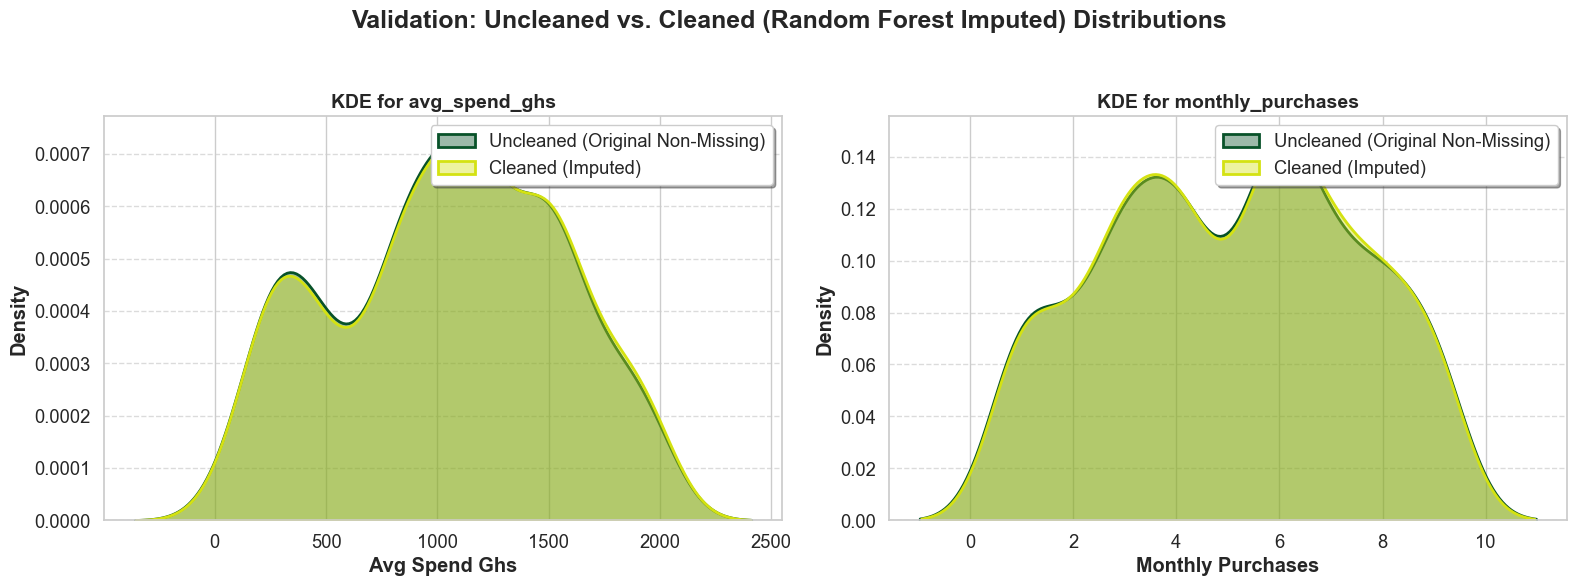


The slight difference in the green plot(original distribution) and the yellow plot(imputed distribution) 
proves imputation occured and it's well optimized.


In [471]:
# ---VISUALIZATION THE THE ORIGINAL AND THE IMPUTED DISTRIBUTIONS TO VALIDATE---

validation_cols = [('avg_spend_ghs', avg_spend_ghs_original), ('monthly_purchases', monthly_purchases_original)]
ORIGINAL_COLOR ="#085229"    # Deep Earth Green (Uncleaned)
IMPUTED_COLOR = "#d4e212"    # Yellow (Cleaned/Imputed)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Validation: Uncleaned vs. Cleaned (Random Forest Imputed) Distributions', weight='bold', fontsize=18)

for i, (col_name, original_series) in enumerate(validation_cols):
    ax = axes[i]
# 1---Plotting the Original (Non-Missing) distribution---
    sns.kdeplot(original_series.dropna(), # drops the NaNs from the original copy
        label='Uncleaned (Original Non-Missing)',color=ORIGINAL_COLOR, 
        fill=True, alpha=0.4, linewidth=2, linestyle='-', ax=ax)
    
# 2---Plotting the Imputed distribution (full dataset)---
    sns.kdeplot(sm_df[col_name], label='Cleaned (Imputed)', color=IMPUTED_COLOR, 
        fill=True, alpha=0.4, linewidth=2, ax=ax)

    ax.set_title(f'KDE for {col_name}', weight='bold', fontsize=14)
    ax.set_xlabel(col_name.replace('_', ' ').title(), weight='bold')
    ax.set_ylabel('Density', weight='bold')
    ax.legend(loc='upper right', frameon=True, shadow=True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(PREPROCESSING_DIR / 
            "Validation-Raw-vs-Cleaned-Distribution-RandomForestImputer", 
            bbox_inches="tight")
plt.show()

sm_df.drop(columns=['avg_spend_ghs_original', 'monthly_purchases_original'], inplace=True)
print("\nThe slight difference in the green plot(original distribution) and the yellow plot(imputed distribution) \nproves imputation occured and it's well optimized.")

### **Attitudes Scores** 
#### **trust_score | satisfaction_score | loyalty_score | nps_score | infl_score | promo_sens | brand_switch**<br>These are ordinals and binary variables. Median imputation was used for the ordinals<br>with a scale of 1 to 10 and mode imputation for columns with binary variables


---Missing values before imputing attitudes scores:---
trust_score           46
satisfaction_score    39
loyalty_score         38
nps_score             48
infl_score            42
promo_sens            32
brand_switch          36
dtype: int64

---Missing values after imputation attitudes scores:---
trust_score           0
satisfaction_score    0
loyalty_score         0
nps_score             0
infl_score            0
promo_sens            0
brand_switch          0
dtype: int64

✅ Imputation Complete for all attitude scores.


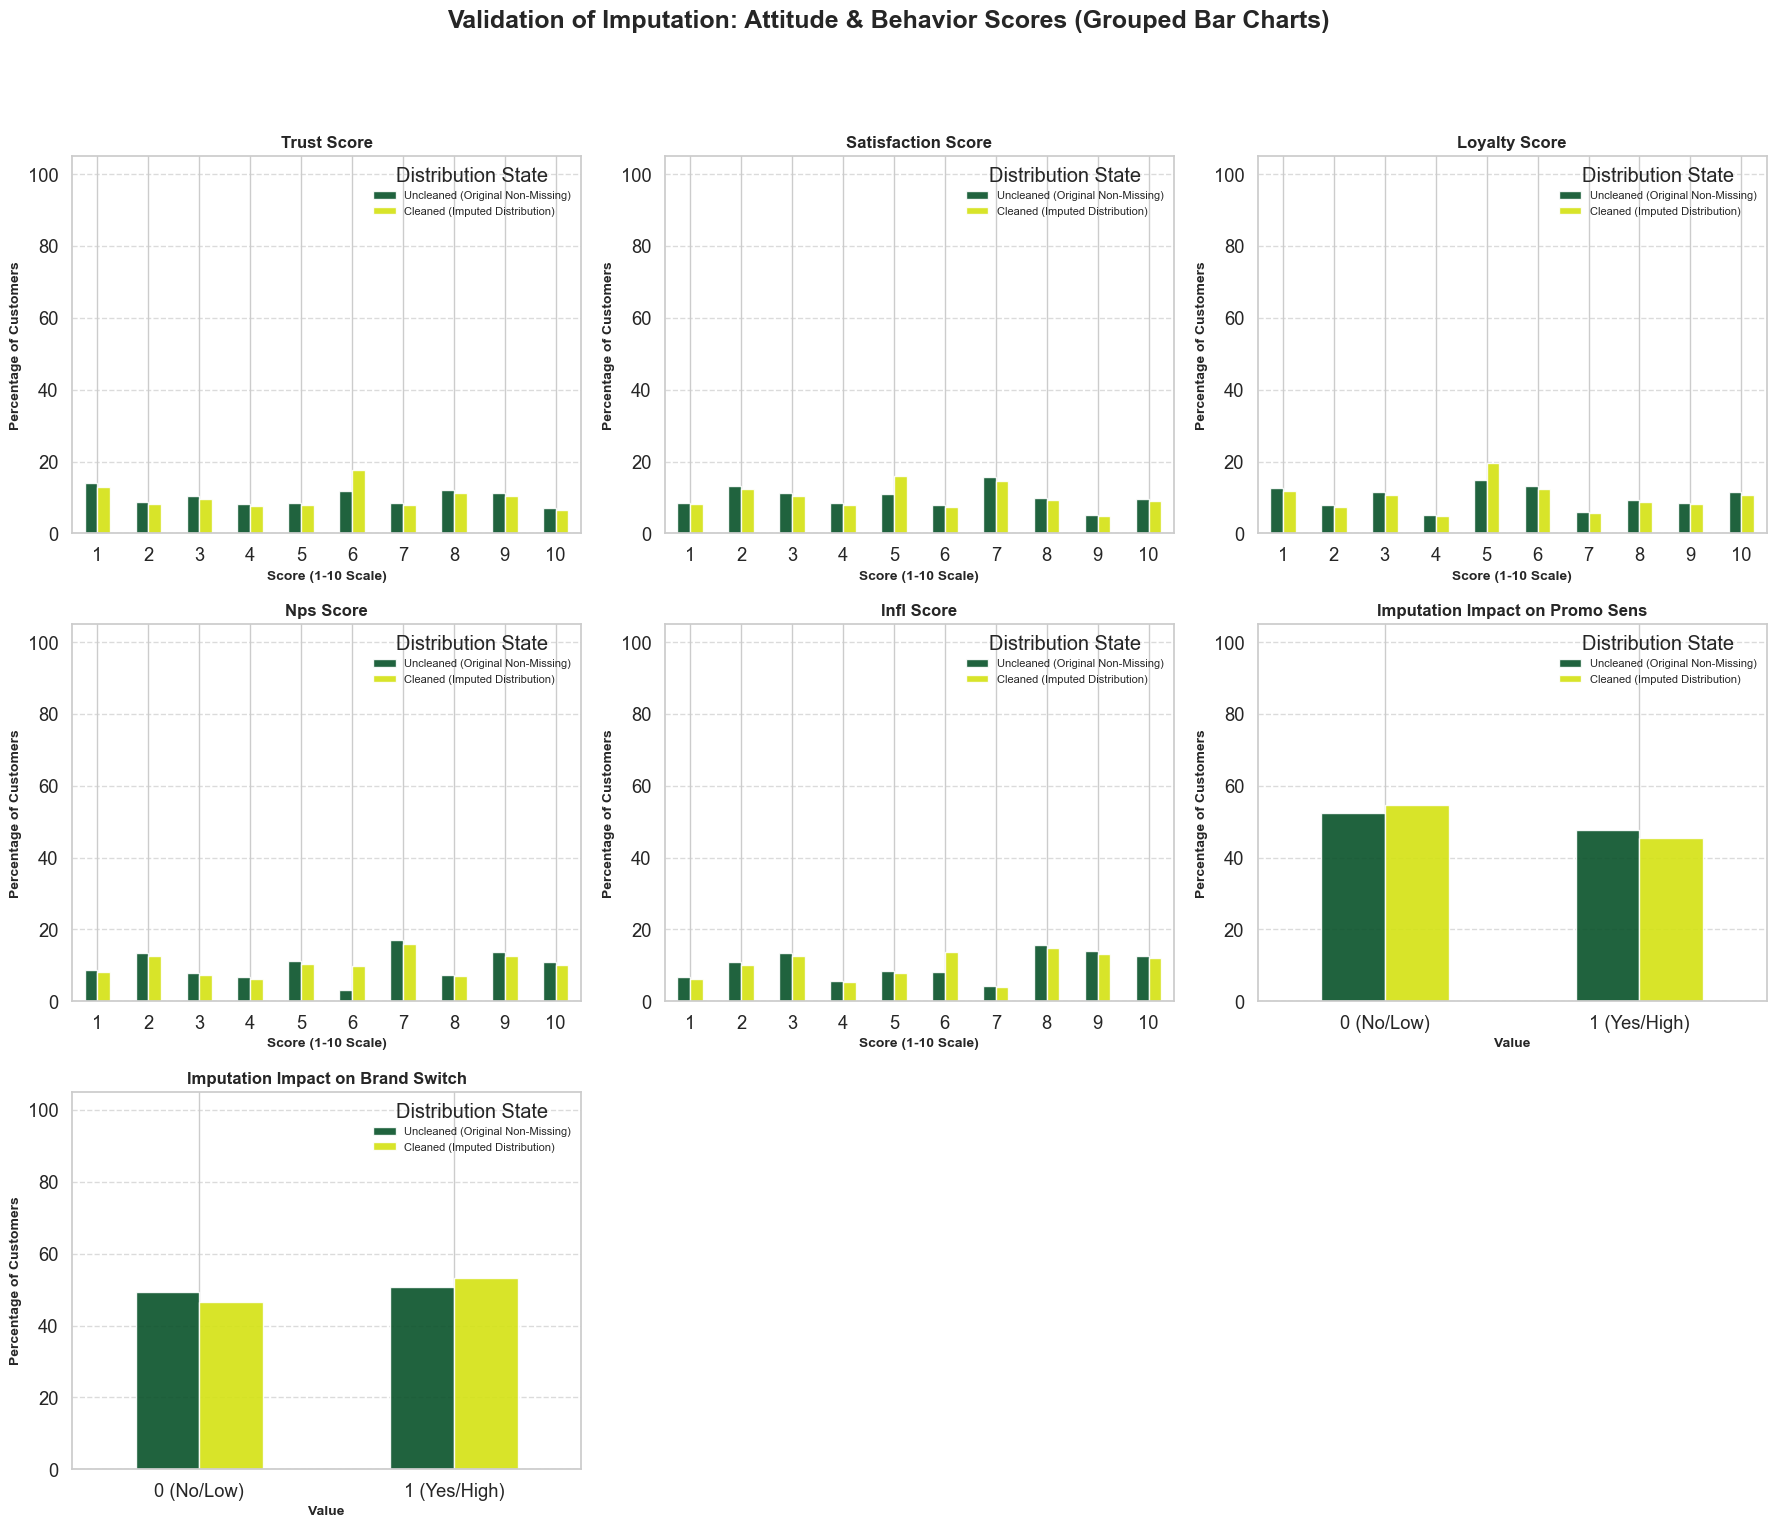

In [472]:
# Define all columns to be imputed
attd_cols = ['trust_score', 'satisfaction_score', 'loyalty_score', 
             'nps_score', 'infl_score', 'promo_sens', 'brand_switch']
ordinals = ['trust_score', 'satisfaction_score', 'loyalty_score', 
            'nps_score', 'infl_score']
binaries = ['promo_sens', 'brand_switch']

# --- Saving Original State Before Imputation ---
for col in attd_cols:
    sm_df[f'{col}_original'] = sm_df[col].copy()

# Checking missing values before imputation
print("\n---Missing values before imputing attitudes scores:---")
print(sm_df[attd_cols].isnull().sum())

# --- 1. Imputing ordinal variables (0-10) scores with median ---
for V in ordinals:
    median_value = sm_df[V].median()
    sm_df[V] = sm_df[V].fillna(median_value)

# --- 2. Imputing binary variables with mode ---
for V in binaries:
    mode_value = sm_df[V].mode()[0]
    sm_df[V] = sm_df[V].fillna(mode_value)

# Verifying no missing values remain
print("\n---Missing values after imputation attitudes scores:---")
print(sm_df[attd_cols].isnull().sum())
print("\n✅ Imputation Complete for all attitude scores.")

# --- 3. VALIDATION VISUALIZATION (7 Plots) ---
IMPUTED_COLOR = "#d4e212"   # Yellow (Cleaned/Imputed)
ORIGINAL_COLOR = "#085229"  # Deep Earth Green (Uncleaned)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Validation of Imputation: Attitude & Behavior Scores (Grouped Bar Charts)', weight='bold', fontsize=18, y=1.02)
axes = axes.flatten() # Flatten the 3x3 array of axes for easy indexing
plot_index = 0

# --- 3.1. Plotting Ordinals (Grouped Bar Charts - IMPROVED) ---
for V in ordinals:
    ax = axes[plot_index]
    original_non_missing = sm_df[f'{V}_original'].dropna()
    
    # Define the full index (1 to 10) for robust value_counts
    full_index = pd.Index(range(1, 11), name='Score')
    
    # Calculate Original Proportions
    original_counts = original_non_missing.value_counts(normalize=True).reindex(full_index, fill_value=0) * 100
    
    # Calculate Imputed Proportions
    imputed_counts = sm_df[V].value_counts(normalize=True).reindex(full_index, fill_value=0) * 100

    # Combine into a DataFrame for plotting
    comparison_percentages = pd.DataFrame({
        'Uncleaned (Original Non-Missing)': original_counts,
        'Cleaned (Imputed Distribution)': imputed_counts
    }).round(2)
    
    # Plotting
    comparison_percentages.plot(
        kind='bar', 
        color=[ORIGINAL_COLOR, IMPUTED_COLOR],
        alpha=0.9,
        ax=ax
    )
    
    # Set titles and labels
    ax.set_title(V.replace('_', ' ').title(), weight='bold', fontsize=12)
    ax.set_xlabel('Score (1-10 Scale)', weight='bold', fontsize=10)
    ax.set_ylabel('Percentage of Customers', weight='bold', fontsize=10)
    ax.set_ylim(0, 105)
    ax.tick_params(axis='x', rotation=0) # No rotation on x-ticks
    ax.legend(title='Distribution State', fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding labels to the bars
    for container in ax.containers:
        plt.bar_label(container, fmt='%.1f%%', fontsize=6)
    
    plot_index += 1

# --- 3.2. Plotting Binaries (Bar Charts - preserved logic) ---
for V in binaries:
    ax = axes[plot_index]
    
    # Calculate Original and Imputed proportions
    original_non_missing = sm_df[f'{V}_original'].dropna()
    original_counts = original_non_missing.value_counts(normalize=True).sort_index() * 100
    imputed_counts = sm_df[V].value_counts(normalize=True).sort_index() * 100

    # Combine into a DataFrame for plotting
    comparison_percentages = pd.concat({
        'Uncleaned (Original Non-Missing)': original_counts,
        'Cleaned (Imputed Distribution)': imputed_counts
    }, axis=1).round(2)
    
    # Ensure both 0 and 1 are in the index
    if 0 not in comparison_percentages.index:
        comparison_percentages.loc[0] = 0.0
    if 1 not in comparison_percentages.index:
        comparison_percentages.loc[1] = 0.0
    comparison_percentages.sort_index(inplace=True)

    # Map numeric index (0, 1) to descriptive string labels
    comparison_percentages.index = comparison_percentages.index.map(lambda x: f'{int(x)} (No/Low)' if x == 0 else f'{int(x)} (Yes/High)')

    # Plotting
    comparison_percentages.plot(
        kind='bar', 
        color=[ORIGINAL_COLOR, IMPUTED_COLOR],
        alpha=0.9,
        ax=ax
    )

    ax.set_title(f'Imputation Impact on {V.replace("_", " ").title()}', weight='bold', fontsize=12)
    ax.set_xlabel('Value', weight='bold', fontsize=10)
    ax.set_ylabel('Percentage of Customers', weight='bold', fontsize=10)
    ax.set_ylim(0, 105)
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Distribution State', fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding labels to the bars
    for container in ax.containers:
        plt.bar_label(container, fmt='%.1f%%', fontsize=7)
    plot_index += 1

# --- 3.3. Cleanup unused axes ---
# Hide the remaining unused subplot (index 7 and 8)
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(PREPROCESSING_DIR / 
            "Validation-of-Imputation-Attitude-and-Behavior-Scores", 
            bbox_inches="tight")
plt.show()

# --- 4. Final Cleanup ---
# Drop temporary original columns
sm_df.drop(columns=[f'{col}_original' for col in attd_cols], inplace=True)

## **3. OUTLOOK OF THE CLEANED DATASET** <br> "Social_Media_Marketing.csv" (sm_df)
#### A clear first-look at the customer dataset **'sm_df'** breaks down who the customers are and how they behave on social media.<br>The size and types of the dataset was checked. Summary statistics and frequency counts for numerical columns(**numCols**) <br> and categorical columns(**catCols**) were checked. Includes: a near-even gender splitand a 60/40 rural–urban mix.<br>Facebook is most used (35%). 54% of customers report switching brands, which signals active competition in the market.

In [473]:
# Inspecting Columns 
# -----For Numeric and Categorical columns-----
print("\n       -----COLUMN FEATURES-----") 
print(sm_df.info())

# Dataset Shape
print("\nShape(rows, columns):", sm_df.shape)

# DataTypes
print("\n\n     -----Data Types-----\n",sm_df.dtypes)

# Summary Statistics
print("\n\n     -----SUMMARY STATISTICS (numCols)-----\n", sm_df.describe().round(2))

# -----For Categorical variables-----
print("\n--Categorical Variables Description--")

# Creating  new categorical columns without 'customer_id'
catCols = [col for col in catCols if col != 'cust_id']
# Ensure catCols is a list of column names
if isinstance(catCols, pd.DataFrame):
    catCols_list = catCols.columns.tolist()
elif isinstance(catCols, pd.Series):
    catCols_list = [catCols.name]
elif isinstance(catCols, list):
    catCols_list = catCols
else:
    catCols_list = list(catCols)

# Checking unique values and frequency counts and percentages for each categorical column
for col in catCols_list:
    print(f"\n--{col} value counts:--")
    print(sm_df[col].value_counts())
    print("\n--Percentage distribution:--")
    print((sm_df[col].value_counts(normalize=True) * 100).round(2))

# Save the final data, which is now confirmed to have only distinct observations.
import os
from pathlib import Path

print("Current working dir:", os.getcwd())

out_path = Path(r"C:\Users\Bhrajo\Desktop\myDEV\01_DSA-LABS\01-DATA-LAB\Notebooks\Thesis_Notebooks\Cleaned_Social_Media_Marketing.csv")
out_path.parent.mkdir(parents=True, exist_ok=True)  # ensure folder exists
sm_df.to_csv(DATA_DIR / 'Cleaned_Social_Media_Marketing.csv', index=False)
print(f"Saved: {out_path.resolve()}")

print("\nFinal clean, non-duplicated panel data saved to 'Cleaned_Social_Media_Marketing.csv'")


       -----COLUMN FEATURES-----
<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 710
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_id             694 non-null    object 
 1   age                 694 non-null    float64
 2   gender              694 non-null    object 
 3   location            694 non-null    object 
 4   platform            694 non-null    object 
 5   followers           694 non-null    float64
 6   eng_rate            694 non-null    float64
 7   ad_click_rate       694 non-null    float64
 8   brand_time_week     694 non-null    float64
 9   ugc_shares          694 non-null    int64  
 10  monthly_purchases   694 non-null    float64
 11  avg_spend_ghs       694 non-null    float64
 12  trust_score         694 non-null    float64
 13  satisfaction_score  694 non-null    float64
 14  loyalty_score       694 non-null    float64
 15  nps_score           694 non-

### **3.1. Visualizing Outlier Detection:** 
#### The grid of box plots below visualizes the distribution of all key numerical metrics.

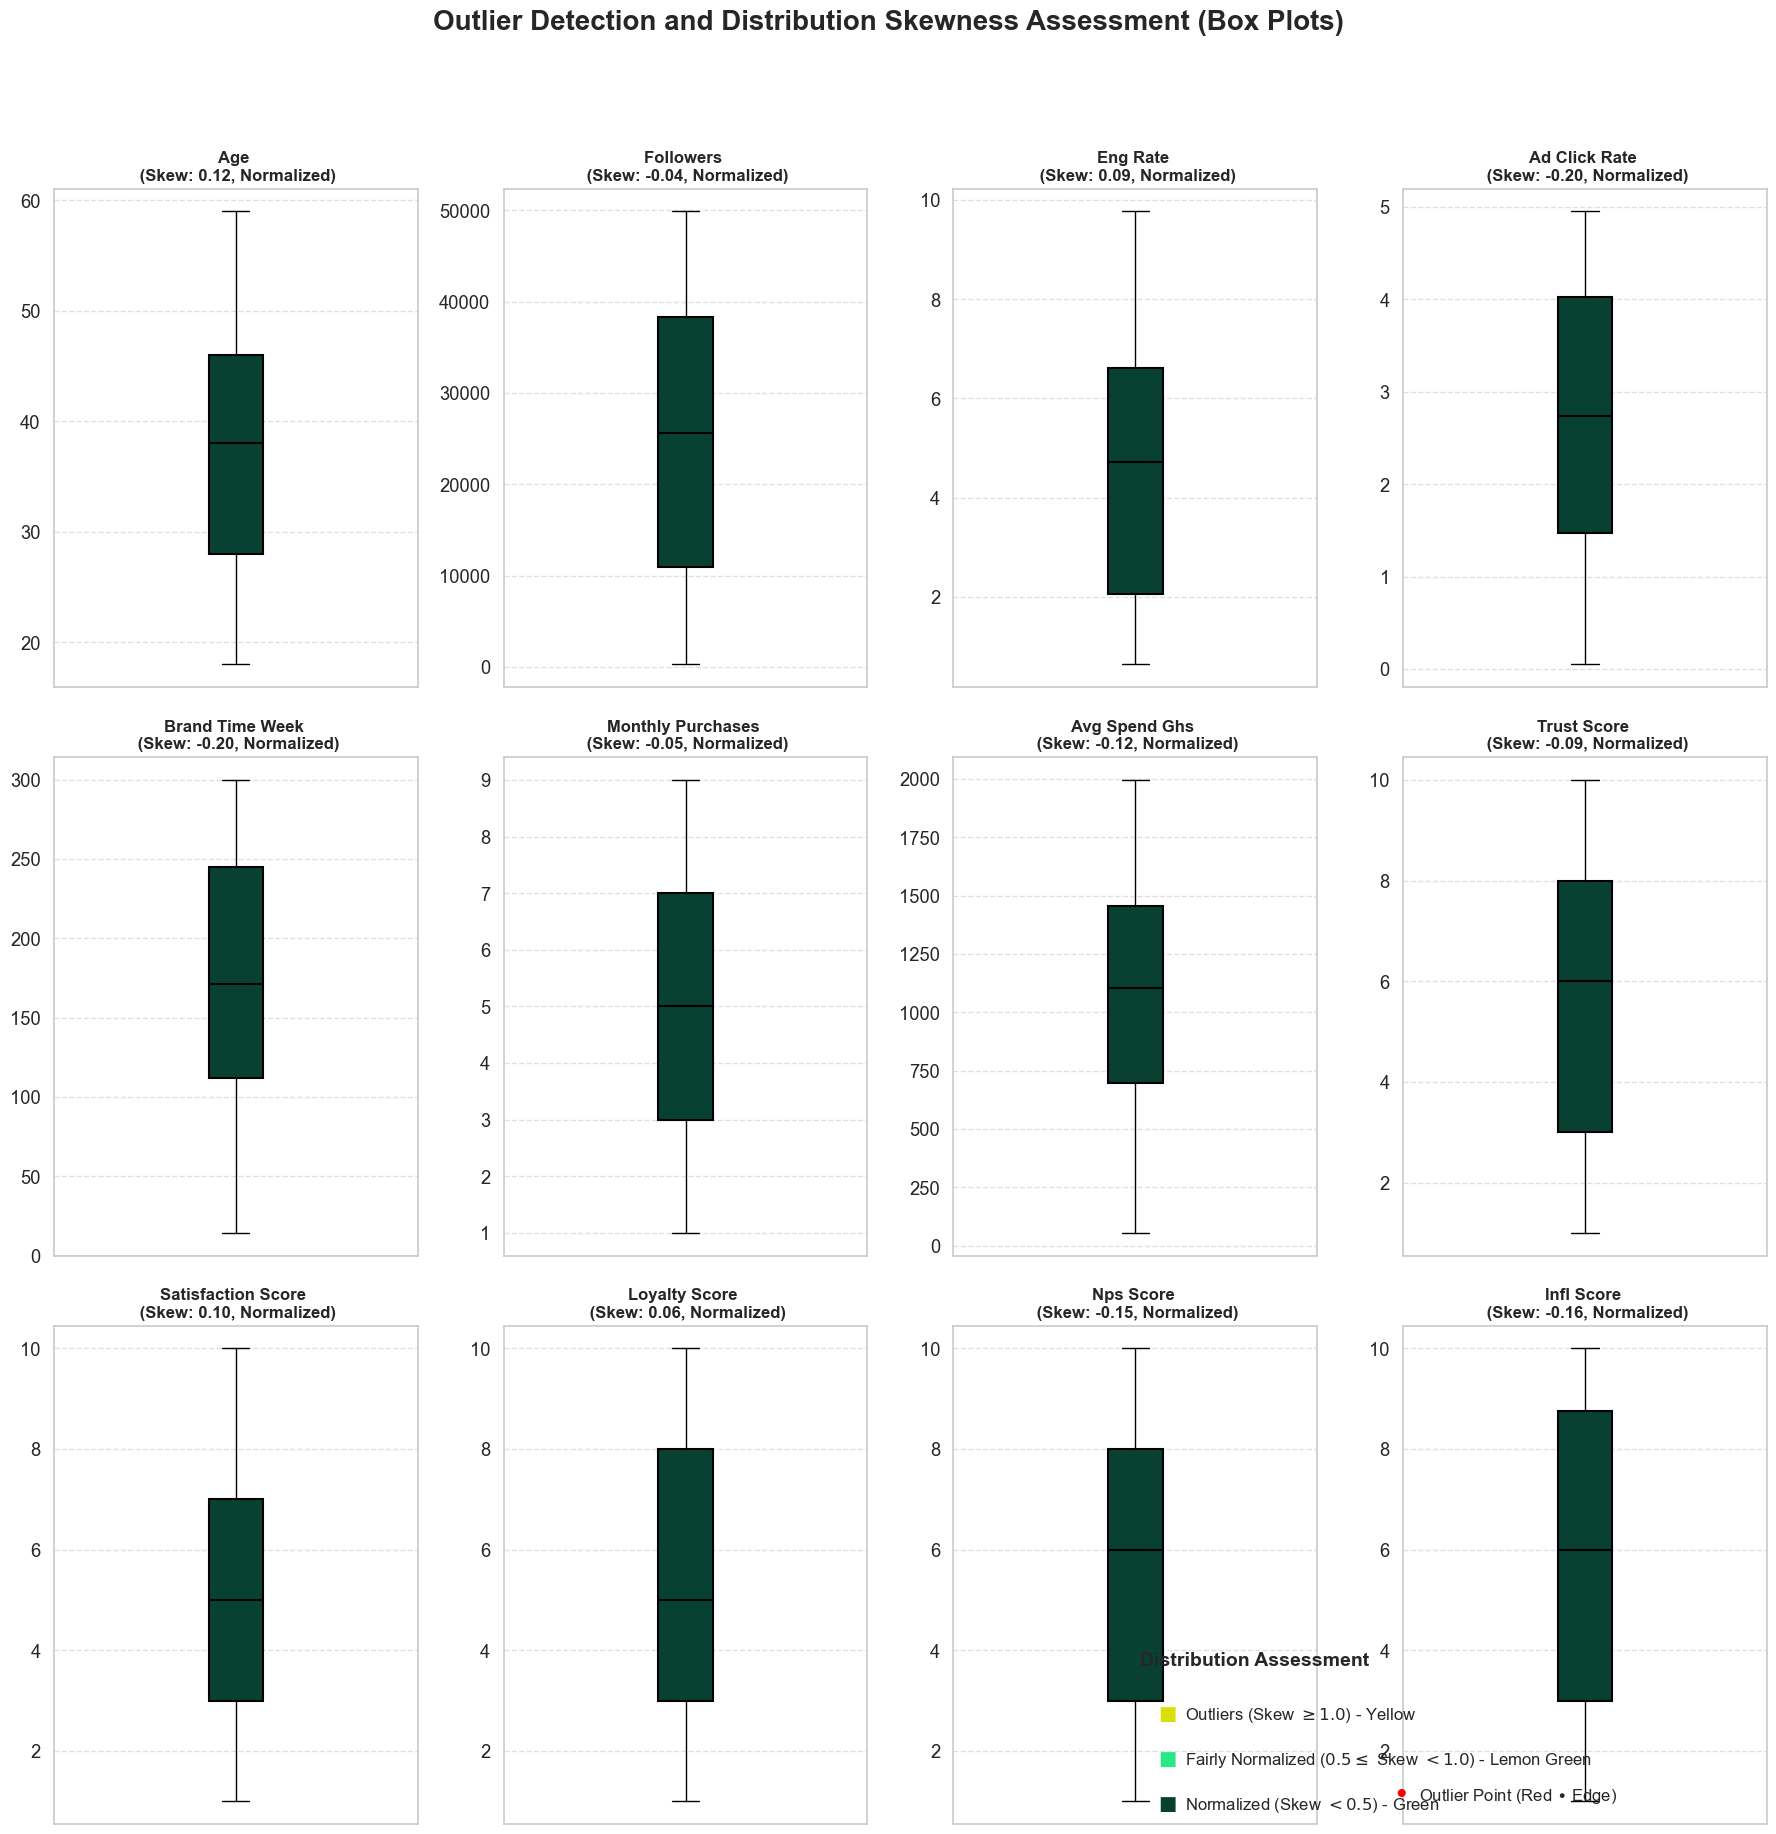


It appears the cleaning and imputation process has been effective. 
The box plots and the skewness analysis confirm that all numerical 
features are now highly normalized (Green category, ∣Skew∣<0.5).


In [474]:
# ____________OUTLIER DETECTION AND VISUALIZATION______________

# ---Defining Numerical Variables---
NUMERIC_COLS = [
    'age', 'followers', 'eng_rate', 'ad_click_rate', 'brand_time_week', 'monthly_purchases', 'avg_spend_ghs', 
    'trust_score', 'satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score']

# ---Custome Colour Palette---
COLOR_MAP = {'Outliers (Skew >= 1.0)': "#dbdf08", 'Fairly Normalized (0.5 <= Skew < 1.0)': "#28e787",'Normalized (Skew < 0.5)': "#084132"}

# ---Calculating Skewness and Assigning Color Category---
plot_data = {}
for col in NUMERIC_COLS:
    # Calculating Skewness
    col_skew = sm_df[col].skew()
    
    # Heuristic for color assignment based on absolute skewness
    if abs(col_skew) >= 1.0:
        category = 'Outliers (Skew >= 1.0)'
    elif abs(col_skew) >= 0.5:
        category = 'Fairly Normalized (0.5 <= Skew < 1.0)'
    else:
        category = 'Normalized (Skew < 0.5)'
    plot_data[col] = {'color': COLOR_MAP[category], 'category': category, 'skew': col_skew}

# ---Generating Box Plots (3x4 Grid)---
fig, axes = plt.subplots(3, 4, figsize=(18, 18))
fig.suptitle('Outlier Detection and Distribution Skewness Assessment (Box Plots)', weight='bold', fontsize=20, y=1.02)
axes = axes.flatten()

#---Drawing boxplots with specific styling---
def draw_boxplot(ax, data, color, title):
    ax.boxplot(data, vert=True, patch_artist=True, showfliers=True, medianprops={'color': 'black', 'linewidth': 1.5},
               boxprops={'facecolor': color, 'edgecolor': 'black', 'linewidth': 1.5}, 
               flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': 'red', 'markersize': 5, 'alpha': 0.7})
    ax.set_title(f"{title}", weight='bold', fontsize=12)
    ax.set_xticks([]) # Remove x-ticks
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plotting loop
for i, col in enumerate(NUMERIC_COLS):
    ax = axes[i]
    p_data = plot_data[col]
    
    # Preparing title
    title_text = f"{col.replace('_', ' ').title()} \n (Skew: {p_data['skew']:.2f}, {p_data['category'].split('(')[0].strip()})"
    
    #---Drawing the boxplot with the determined color
    draw_boxplot(ax, sm_df[col].dropna(), p_data['color'], title_text)

# ---Custom Legend (Using fig.text for robust LaTeX Mathtext) ---
legend_start_x = 0.65
legend_start_y = 0.02
v_space = 0.025
marker_size = 14

#___Outliers (Yellow)___
fig.text(legend_start_x, legend_start_y + 2 * v_space, '$\\blacksquare$', color=COLOR_MAP['Outliers (Skew >= 1.0)'], fontsize=marker_size)
fig.text(legend_start_x + 0.015, legend_start_y + 2 * v_space, r'Outliers (Skew $\geq 1.0$) - Yellow', fontsize=12)

#___Fairly Normalized (Lemon Green)___
fig.text(legend_start_x, legend_start_y + v_space, '$\\blacksquare$', color=COLOR_MAP['Fairly Normalized (0.5 <= Skew < 1.0)'], fontsize=marker_size)
fig.text(legend_start_x + 0.015, legend_start_y + v_space, r'Fairly Normalized ($0.5 \leq$ Skew $< 1.0$) - Lemon Green', fontsize=12)

#___Normalized (Green)___
fig.text(legend_start_x, legend_start_y, '$\\blacksquare$', color=COLOR_MAP['Normalized (Skew < 0.5)'], fontsize=marker_size)
fig.text(legend_start_x + 0.015, legend_start_y, r'Normalized (Skew $< 0.5$) - Green', fontsize=12)

#___Outlier Point (Red Marker)___
fig.text(0.78, legend_start_y + 0.005, '$\\bullet$', color='red', fontsize=20, weight='bold')
fig.text(0.795, legend_start_y + 0.005, 'Outlier Point (Red $\\bullet$ Edge)', fontsize=12)
fig.text(0.64, legend_start_y + 3 * v_space + 0.005, 'Distribution Assessment', fontsize=14, weight='bold')

#___Cleaning up any unused axes___
for i in range(len(NUMERIC_COLS), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(PREPROCESSING_DIR/ 
            "Outlier-Detection-Analysis-and-Skewness-Assessment.png", 
            bbox_inches="tight")
plt.show()

print("\nIt appears the cleaning and imputation process has been effective. \nThe box plots and the skewness analysis confirm that all numerical \nfeatures are now highly normalized (Green category, ∣Skew∣<0.5).")

## **4. EXPLORATORY DATA ANALYSIS**

### **4.1. UNIVARIATE ANALYSIS**
#### **Customer Profiling:** <br> The univariate analysis helps us understand the basic characteristics of our customer base. For agribusiness marketing, <br> knowing the demographic profile (age, location) and preferred platforms will help with effective targeting in  our <br> marketing strategy. The followers distribution shows influencer potential.

=== AGE DISTRIBUTION ANALYSIS ===
Most common age: 38.0 years
Number of customers at this age: 57
Percentage of total customers: 8.21%
Total customers in dataset: 694
=== YOUNG CUSTOMER ANALYSIS (18-30 YEARS) ===
Number of customers aged 18-40: 402
Total customers: 694
Percentage of customers aged 18-40: 57.93%


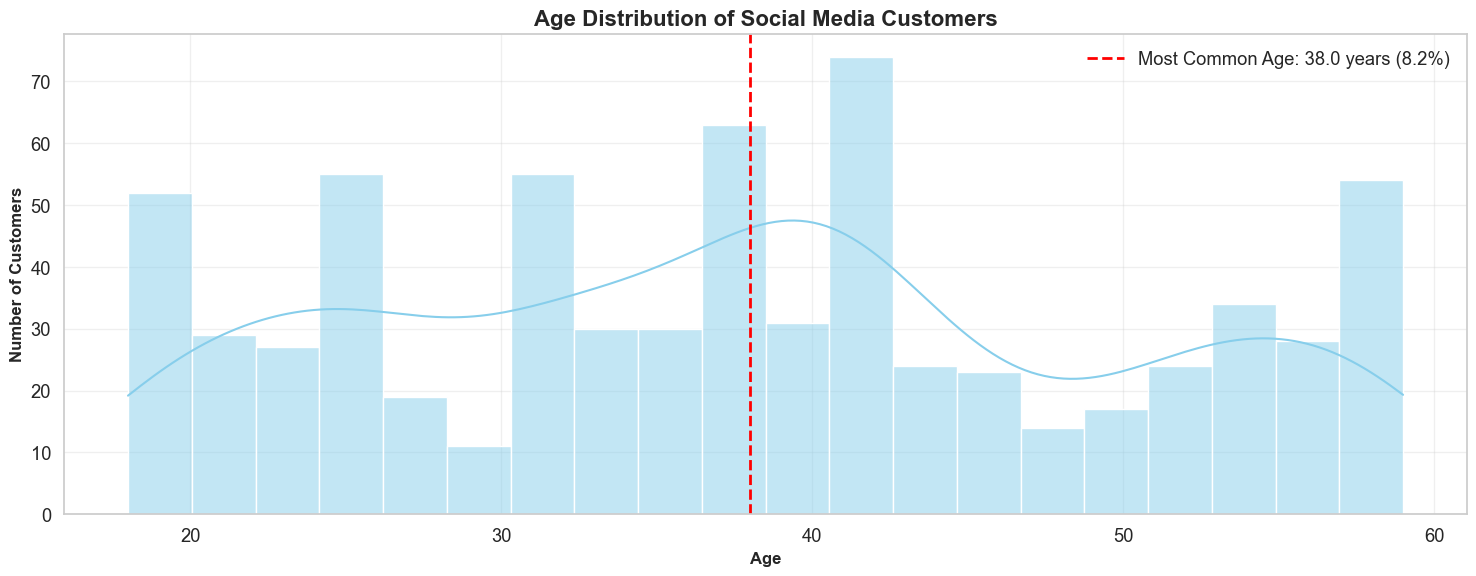

In [475]:
# Find the most common age group and its percentage
print("=== AGE DISTRIBUTION ANALYSIS ===")

# Calculate age distribution
age_distribution = sm_df['age'].value_counts().sort_index()
most_common_age = age_distribution.idxmax()
most_common_count = age_distribution.max()
total_customers = len(sm_df)
percentage_most_common = (most_common_count / total_customers) * 100

print(f"Most common age: {most_common_age} years")
print(f"Number of customers at this age: {most_common_count}")
print(f"Percentage of total customers: {percentage_most_common:.2f}%")
print(f"Total customers in dataset: {total_customers}")

# Visualize the age distribution with emphasis on the most common age
plt.figure(figsize=(15, 6))

# Create age distribution plot
ax = sns.histplot(data=sm_df, x='age', bins=20, kde=True, color='skyblue')

# Highlight the most common age
plt.axvline(x=most_common_age, color='red', linestyle='--', linewidth=2, 
           label=f'Most Common Age: {most_common_age} years ({percentage_most_common:.1f}%)')

# Calculate percentage of customers aged 18-30
print("=== YOUNG CUSTOMER ANALYSIS (18-30 YEARS) ===")

# Filter customers aged 18-40
young_customers = sm_df[(sm_df['age'] >= 18) & (sm_df['age'] <= 40)]
young_count = len(young_customers)
total_customers = len(sm_df)
young_percentage = (young_count / total_customers) * 100

print(f"Number of customers aged 18-40: {young_count}")
print(f"Total customers: {total_customers}")
print(f"Percentage of customers aged 18-40: {young_percentage:.2f}%")
plt.title('Age Distribution of Social Media Customers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(EDA_DIR/ 
            "Age-Distribution-of-Social-Media-Customers.png", 
            bbox_inches="tight")
plt.show()

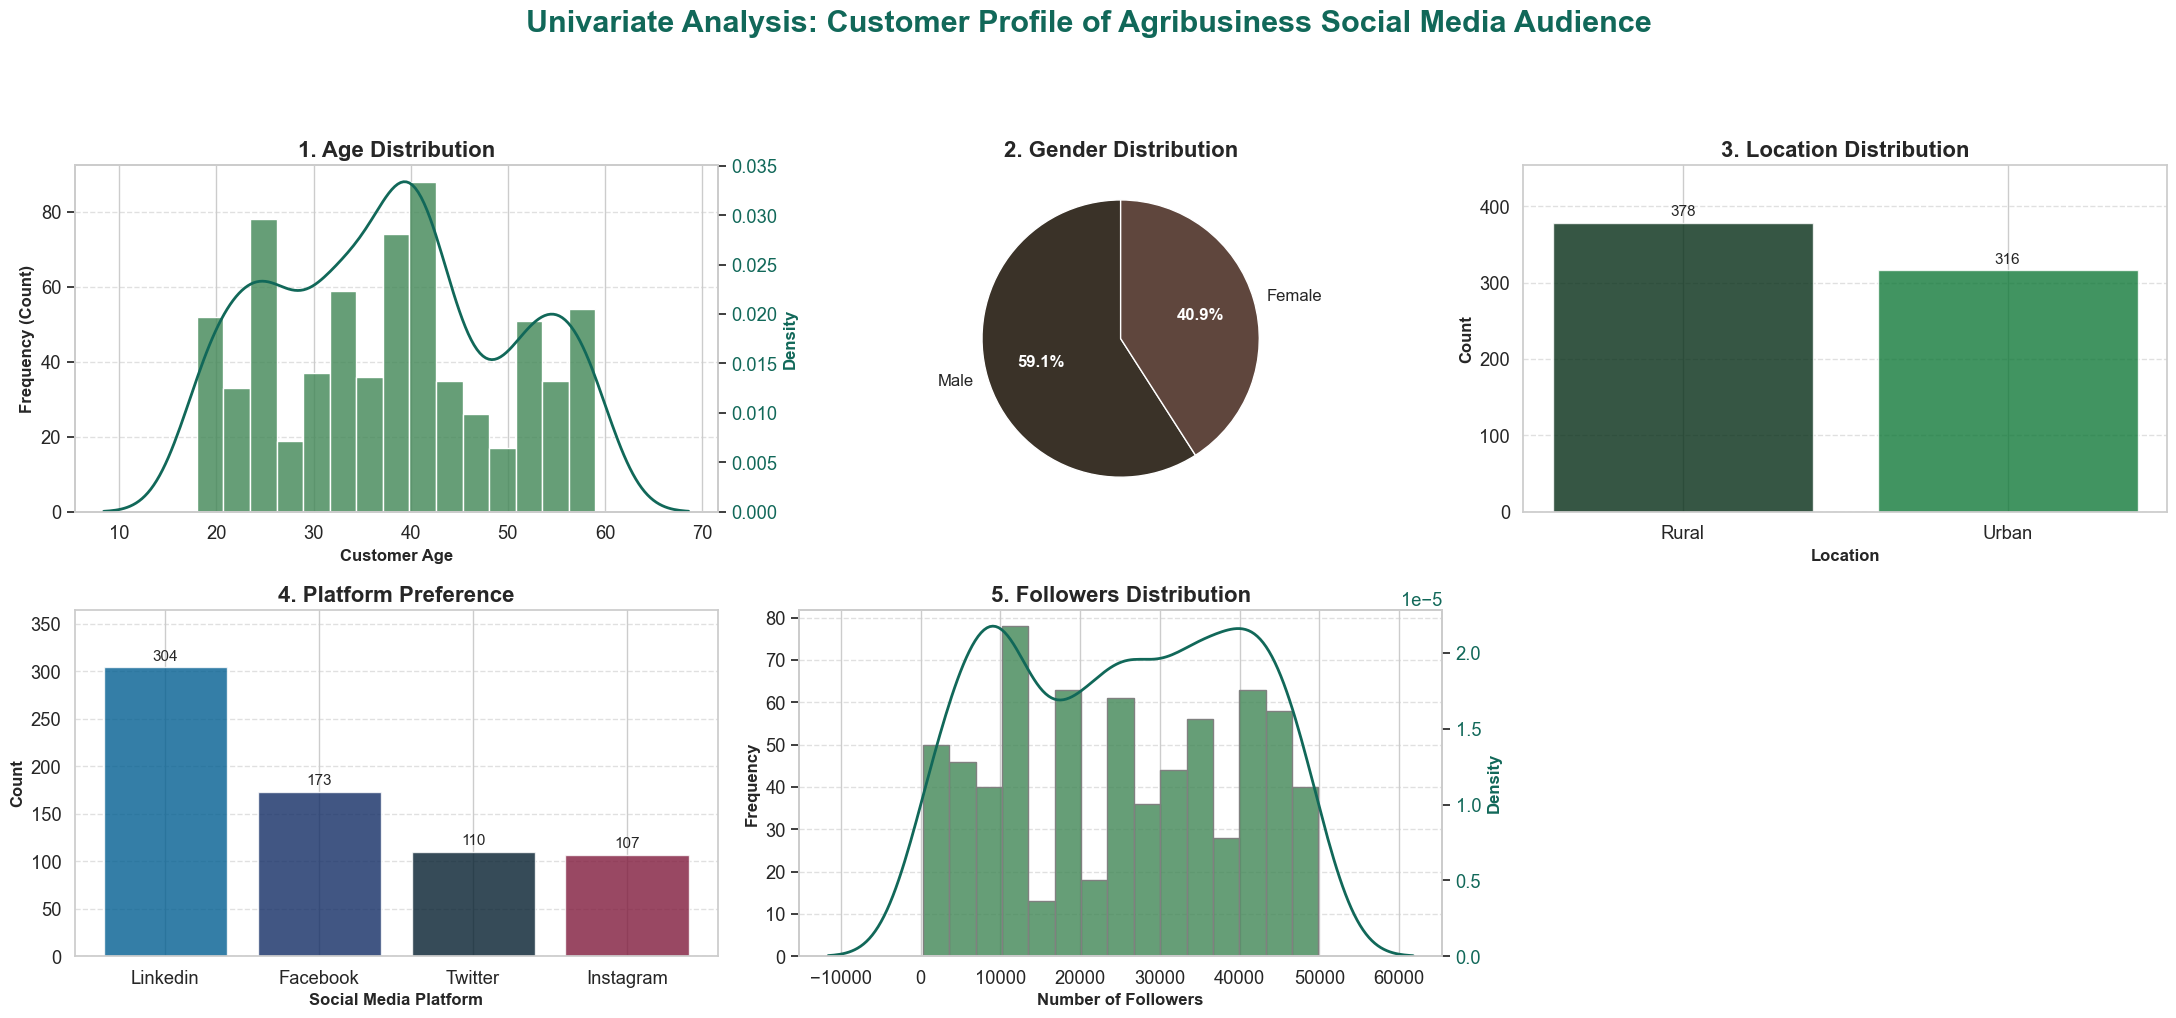

In [476]:
#____DEFINIING Color Palette____
agri_green_darker = "#116859"   # Dark, prominent green for trend lines
deep_green_1 = "#042C15"        # Deep green for rural
deep_green_2 = "#117939"        # Light deep green for urban
earth_brown_1 = "#3A3228"       # Earth brown for frequent gender
earth_brown_2 = "#5F463D"       # Lighter brown for less frequent gender
agri_yellow_1 = "#408655"       # Yellow for histogram bars
platform_colors = {'Linkedin': "#015e91", 'Facebook': "#122C64", 'Instagram': "#801a3cff", 'Twitter': '#041E2E'}

fig, axes = plt.subplots(2, 3, figsize=(22, 10))    # Create a 2x3 Grid Layout (for 5 variables)
fig.suptitle( 'Univariate Analysis: Customer Profile of Agribusiness Social Media Audience', weight='bold', fontsize=22, y=1.02, color=agri_green_darker)

#____AGE DISTRIBUTION____
ax = axes[0, 0]
sns.histplot(data=sm_df, x='age', kde=False, ax=ax, bins=15, color=agri_yellow_1, alpha=0.8)
ax.set_ylabel('Frequency (Count)', fontsize=12)
ax2 = ax.twinx()
sns.kdeplot(data=sm_df, x='age', ax=ax2, color=agri_green_darker, linewidth=2)
ax2.set_ylabel('Density', fontsize=12, color=agri_green_darker)
ax2.tick_params(axis='y', labelcolor=agri_green_darker)
ax2.grid(False)
ax.set_title('1. Age Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Customer Age', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

#____GENDER DISTRIBUTION____
ax = axes[0, 1]
gender_counts = sm_df['gender'].value_counts()
def make_autopct_white(pct):
    return f'{pct:.1f}%'  # Custom formatting, text color handled below
wedges, texts, autotexts = ax.pie(gender_counts.values, labels=gender_counts.index, autopct=make_autopct_white, 
                                  colors=[earth_brown_1, earth_brown_2], startangle=90,textprops={'fontsize': 12})
for autotext in autotexts:      # Set percentage labels (autotexts) to white for visibility
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax.set_title('2. Gender Distribution', weight='bold', fontsize=16)

#____LOCATION DISTRIBUTION____
ax = axes[0, 2]
location_counts = sm_df['location'].value_counts().sort_values(ascending=False)
colors = [deep_green_1, deep_green_2]
bars = ax.bar(location_counts.index, location_counts.values, color=colors, alpha=0.8)
ax.set_title('3. Location Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_ylim(0, location_counts.max() * 1.2)
ax.bar_label(bars, fmt='%d', fontsize=11, padding=3)

#____PLATFORRM DISTRIBUTION____
ax = axes[1, 0]
platform_counts = sm_df['platform'].value_counts()
colors = [platform_colors.get(p, '#cccccc') for p in platform_counts.index]
bars = ax.bar(platform_counts.index, platform_counts.values, color=colors, alpha=0.8)
ax.set_title('4. Platform Preference', weight='bold', fontsize=16)
ax.set_xlabel('Social Media Platform', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_ylim(0, platform_counts.max() * 1.2)
ax.bar_label(bars, fmt='%d', fontsize=11, padding=3)

#____FOLLOWERS DISTRIBBUTION____
ax = axes[1, 1]
sns.histplot(data=sm_df, x='followers', kde=False, ax=ax, color=agri_yellow_1, alpha=0.8, bins=15, edgecolor='gray')
ax.set_xlabel('Number of Followers', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('5. Followers Distribution', weight='bold', fontsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax2 = ax.twinx()
sns.kdeplot(data=sm_df, x='followers', ax=ax2, color=agri_green_darker, linewidth=2)
ax2.set_ylabel('Density', fontsize=12, color=agri_green_darker)
ax2.tick_params(axis='y', labelcolor=agri_green_darker)
ax2.grid(False)

#displaying the plots
fig.delaxes(axes[1, 2])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(EDA_DIR/
            'univariate_customer_profiling_agribusiness.png', 
            dpi=300, bbox_inches='tight')
plt.show()

#### **Behaviourial Metrics**

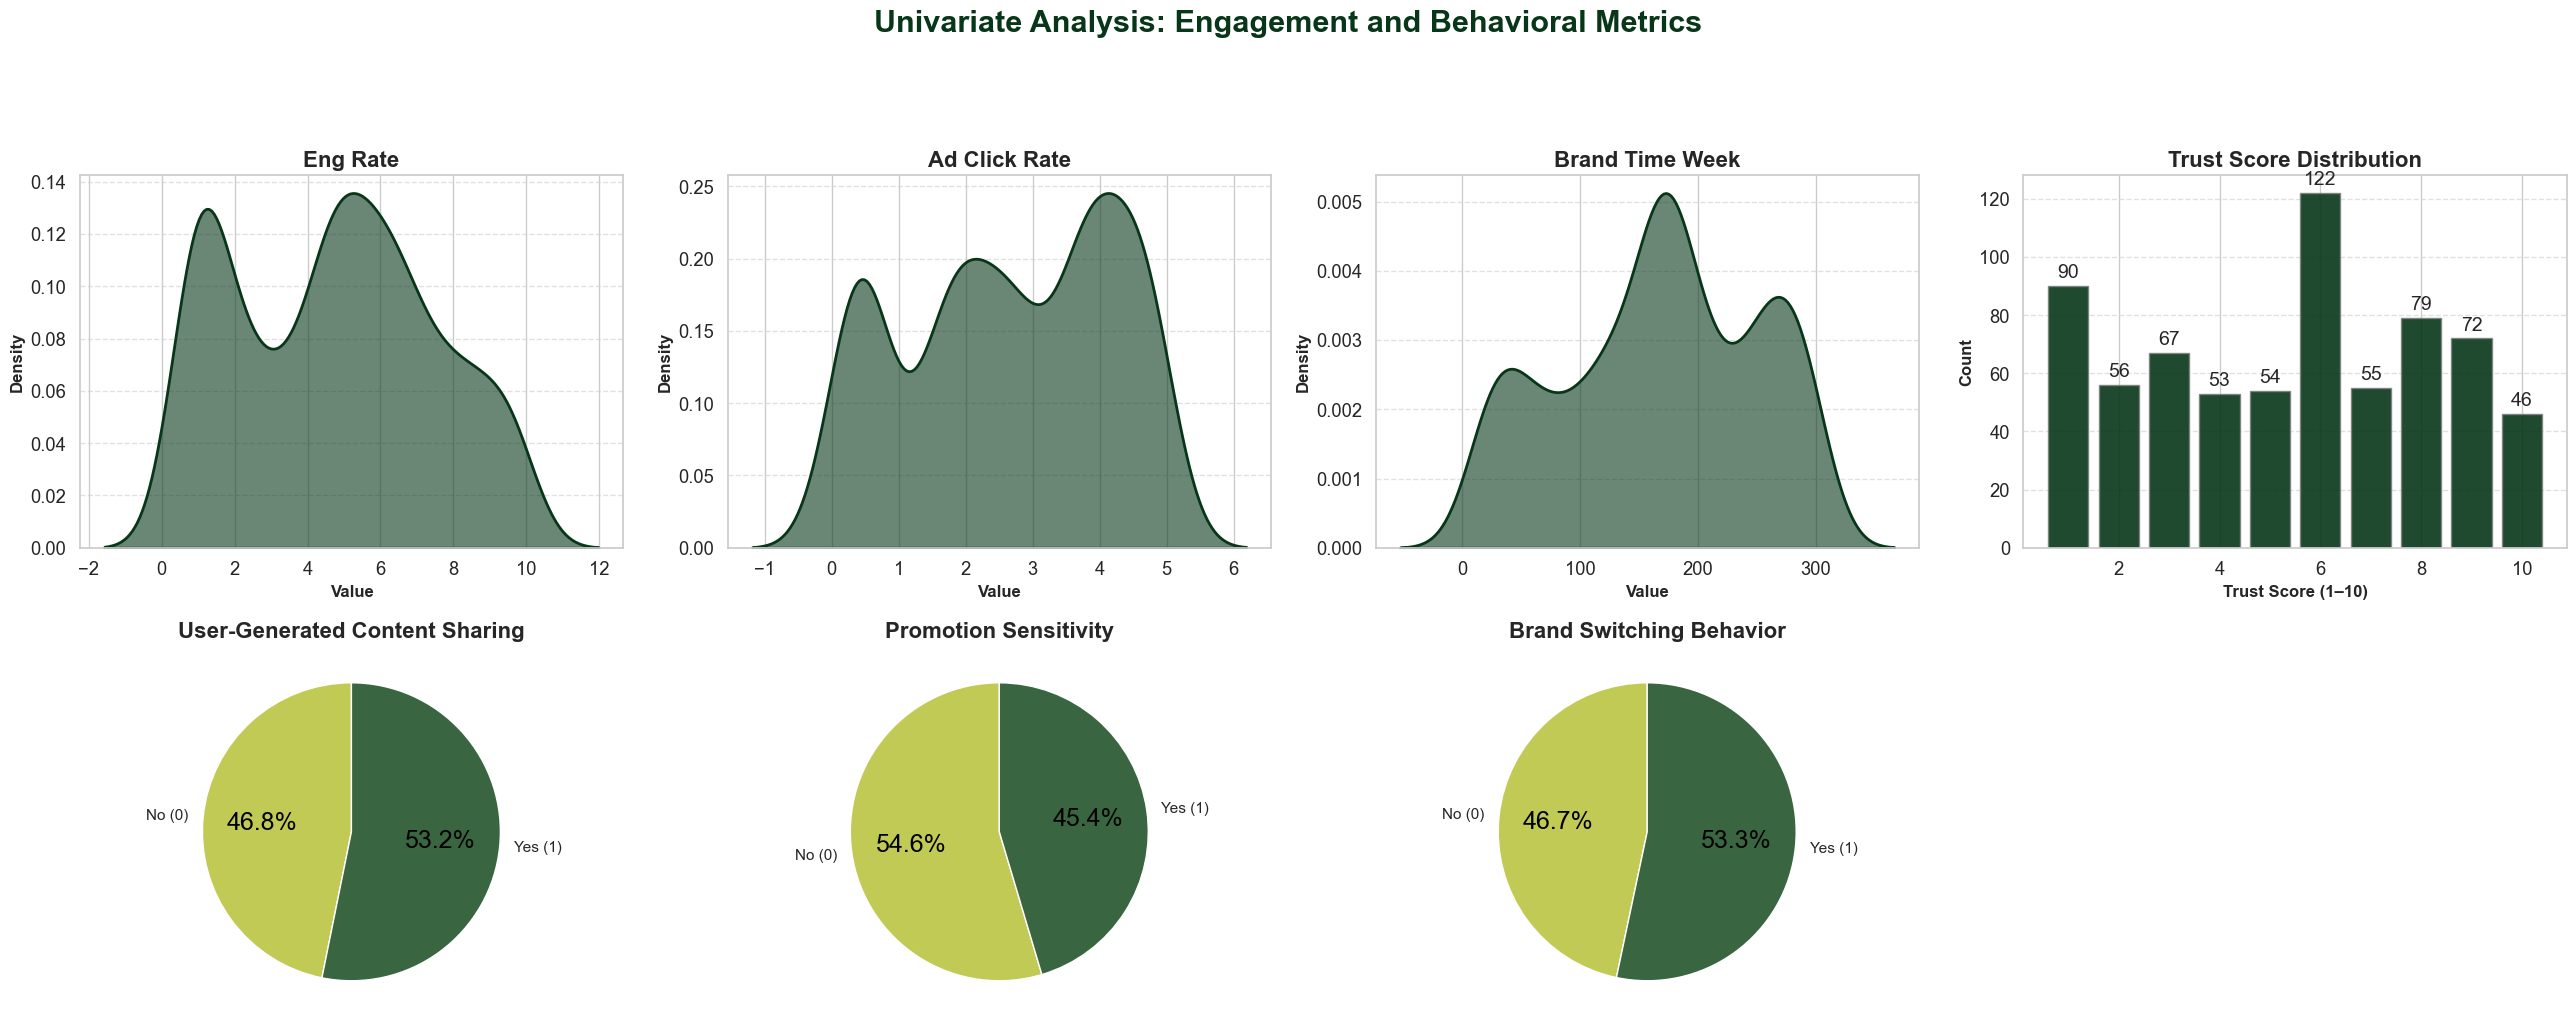

In [477]:
#____Definining Variables____
CONTINUOUS_VARS = ['eng_rate', 'ad_click_rate', 'brand_time_week']
ORDINAL_VARS = ['trust_score']
BINARY_VARS = ['ugc_shares', 'promo_sens', 'brand_switch']
agri_green_darker = "#073619"   # Green for trend lines / density
agri_yellow_1 = "#c2ca56"       # Yellow for bar charts and pie No/False
agri_green_true = "#396641"     # Brighter green for Yes/True

#____Setring up plotting canvas____
fig, axes = plt.subplots(2, 4, figsize=(26, 10))
fig.suptitle('Univariate Analysis: Engagement and Behavioral Metrics', weight='bold', fontsize=22, y=1.03, color=agri_green_darker)

#____CONTINUOUS VARIABLES____
for i, col in enumerate(CONTINUOUS_VARS):
    ax = axes[0, i]
    sns.kdeplot(data=sm_df, x=col, fill=True, color=agri_green_darker, alpha=0.6, linewidth=2, ax=ax)
    ax.set_title(col.replace('_', ' ').title(), weight='bold', fontsize=16)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

#____ORDINAL VARIABLE____
ax = axes[0, 3]
if 'trust_score' in sm_df.columns:
    trust_counts = sm_df['trust_score'].value_counts().sort_index()
    bars = ax.bar(trust_counts.index, trust_counts.values, color=agri_green_darker, edgecolor='gray', alpha=0.9)
    ax.set_title('Trust Score Distribution', weight='bold', fontsize=16)
    ax.set_xlabel('Trust Score (1–10)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.bar_label(bars, fmt='%d', fontsize=14, padding=3)

#____BINARY VARIABLES____
binary_vars = ['ugc_shares', 'promo_sens', 'brand_switch']
binary_titles = {'ugc_shares': 'User-Generated Content Sharing', 'promo_sens': 'Promotion Sensitivity', 'brand_switch': 'Brand Switching Behavior'}
for i, col in enumerate(binary_vars):
    ax = axes[1, i]
    counts = sm_df[col].value_counts().sort_index()
    labels = ['No (0)', 'Yes (1)']
    fontsize = 16
    colors = [agri_yellow_1, agri_green_true]
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 11})
    for autotext in autotexts:  # Improve percentage label visibility
        autotext.set_color('black')
        autotext.set_fontsize(18)
    ax.set_title(binary_titles.get(col, col.replace('_', ' ').title()), weight='bold', fontsize=16)

#showing the plots
fig.delaxes(axes[1, 3])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(EDA_DIR/
            'univariate_engagement_behavior_metrics.png', 
            dpi=300, bbox_inches='tight')
plt.show()

#### **Commercial and Attitudinal Metrics**

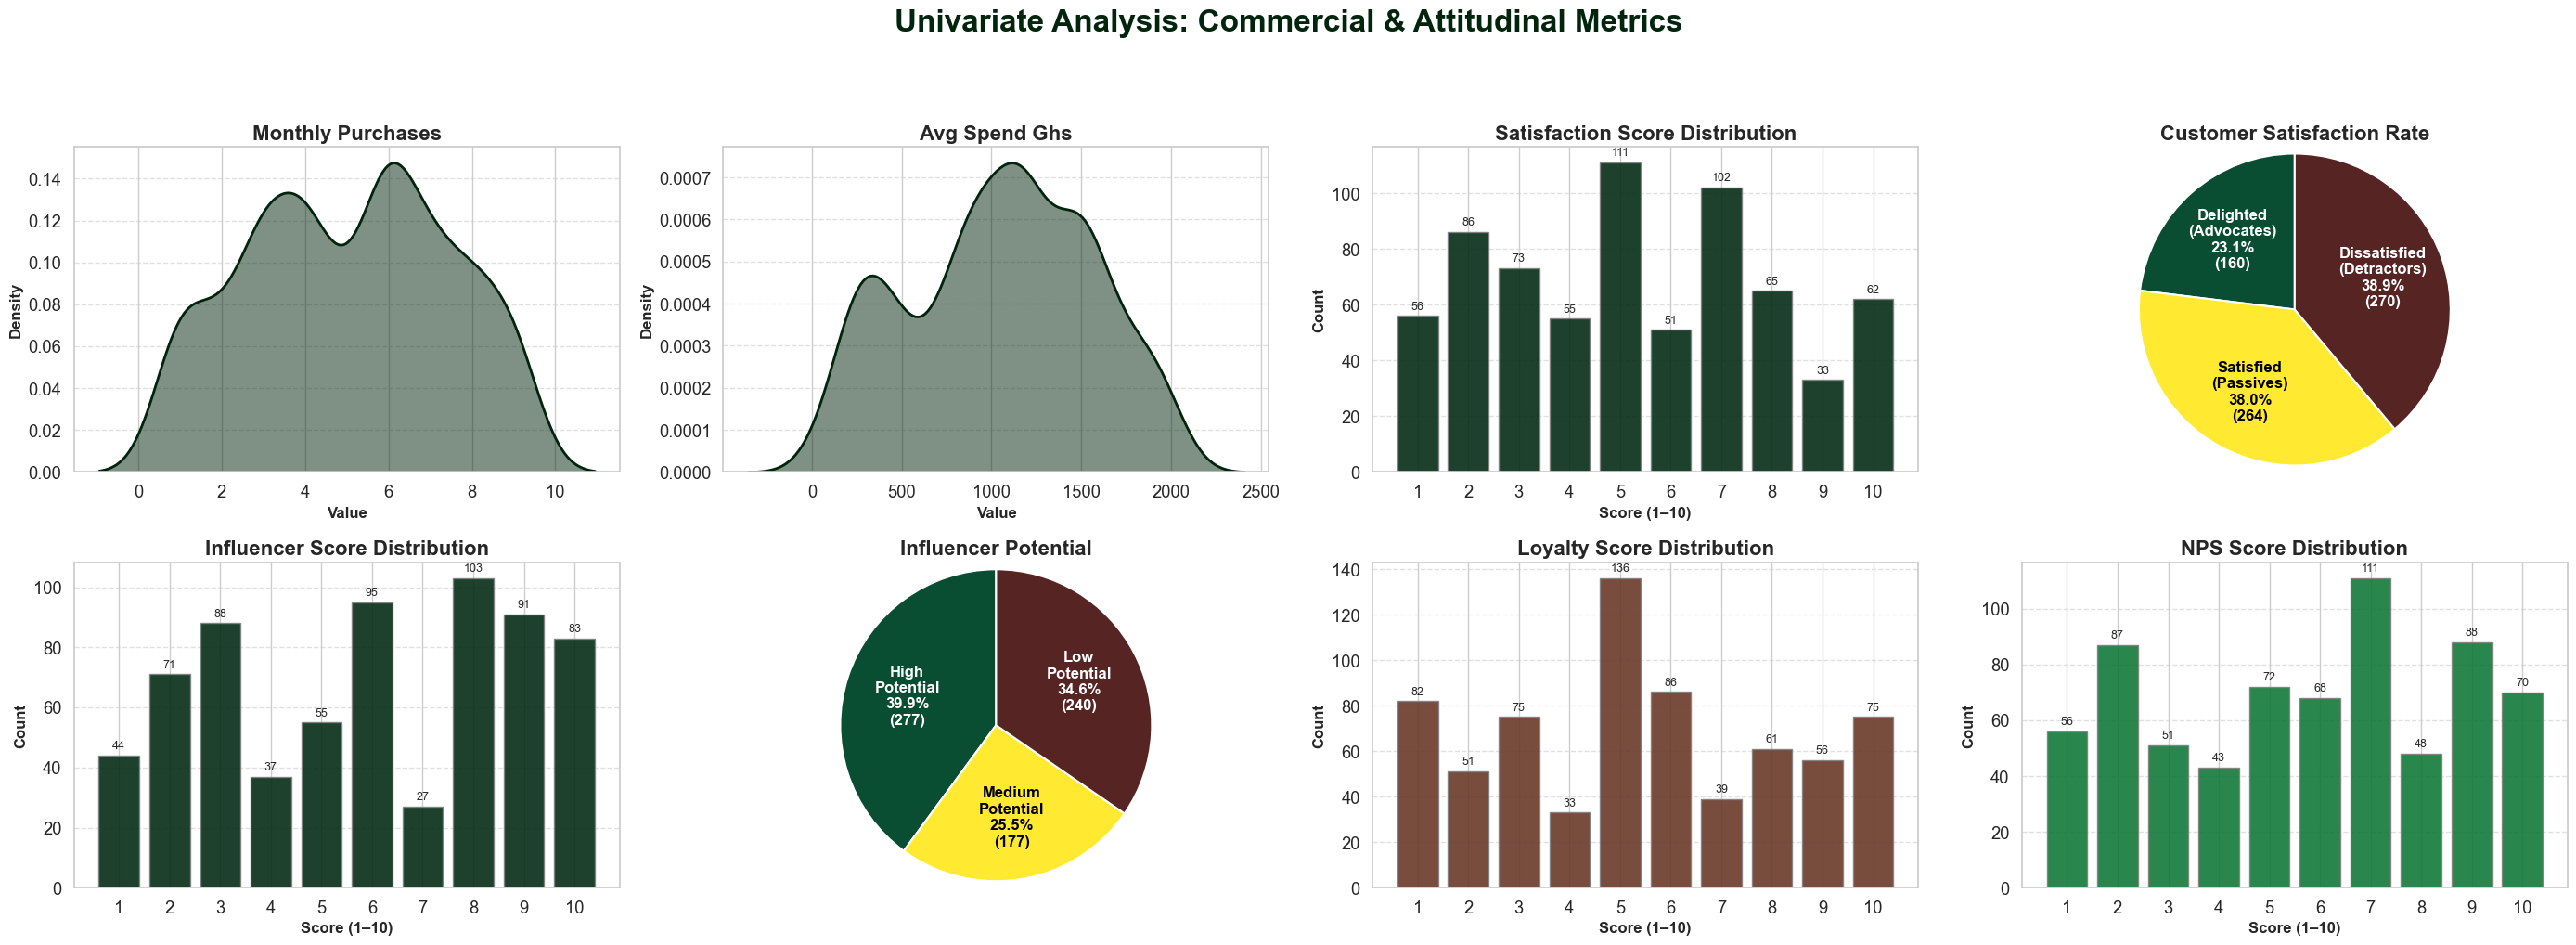

In [478]:
#____Define Variables____
COMMERCIAL_VARS = ['monthly_purchases', 'avg_spend_ghs']
ATTITUDE_VARS = ['satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score']  # Excluding trust_score

#____Color Palett____
agri_green_darker = "#01240C"  # Deep agribusiness green
agri_yellow_1 = "#a5ca00"      # Vibrant agribusiness yellow
deep_green_1 = "#042C15"
deep_green_2 = "#117939"
earth_brown_2 = "#693929"
attitude_colors = [deep_green_1, earth_brown_2, deep_green_2, deep_green_1]
attitude_color_map = dict(zip(ATTITUDE_VARS, attitude_colors))

fig, axes = plt.subplots(2, 4, figsize=(28, 10))
fig.suptitle('Univariate Analysis: Commercial & Attitudinal Metrics', weight='bold', fontsize=24, y=1.02, color=agri_green_darker)

#____COMMERCIAL METRICS____
for i, col in enumerate(COMMERCIAL_VARS):
    ax = axes[0, i]
    sns.kdeplot(data=sm_df, x=col, fill=True, color=agri_green_darker, alpha=0.5, linewidth=2, ax=ax)
    ax.set_title(col.replace('_', ' ').title(), weight='bold', fontsize=16)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

#___ATTITUDINAL METRICS

# --- Loyalty Score ---
col = 'loyalty_score'
ax = axes[1, 2]
counts = sm_df[col].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=attitude_color_map[col], edgecolor='gray', alpha=0.9)
ax.set_title('Loyalty Score Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Score (1–10)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(range(1, 11))
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.bar_label(bars, fmt='%d', fontsize=9, padding=3)

# --- NPS Score ---
col = 'nps_score'
ax = axes[1, 3]
counts = sm_df[col].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=attitude_color_map[col], edgecolor='gray', alpha=0.9)
ax.set_title('NPS Score Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Score (1–10)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(range(1, 11))
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.bar_label(bars, fmt='%d', fontsize=9, padding=3)

#___PIE CHART SEGMENTATION FUNTION
#Defining segment categories
def categorize_score(score):
    if 8 <= score <= 10:
        return 'High'
    elif 5 <= score <= 7:
        return 'Medium'
    else:
        return 'Low'
#Separating wedges 
def make_autopct(values, labels):
    """
    This function assigns labels to pie wedges.
    It relies on the fact that matplotlib calls this function sequentially for each wedge.
    """
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Get the correct label from the list using the counter
        current_label = labels[my_autopct.counter]
        my_autopct.counter += 1
        return f'{current_label}\n{pct:.1f}%\n({val})'
#Initialize a counter for the closure
    my_autopct.counter = 0
    return my_autopct

#____SATISFACTION & INFLUENCER SCORE (Bar-Plots)____
#---Satifaction---
col = 'satisfaction_score'
ax = axes[0, 2]
counts = sm_df[col].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=attitude_color_map[col], edgecolor='gray', alpha=0.9)
ax.set_title('Satisfaction Score Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Score (1–10)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(range(1, 11))
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.bar_label(bars, fmt='%d', fontsize=9, padding=3)

#---Influencer---
col = 'infl_score'
ax = axes[1, 0]
counts = sm_df[col].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=attitude_color_map[col], edgecolor='gray', alpha=0.9)
ax.set_title('Influencer Score Distribution', weight='bold', fontsize=16)
ax.set_xlabel('Score (1–10)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(range(1, 11))
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.bar_label(bars, fmt='%d', fontsize=9, padding=3)

#____SATISFACTION RATES & INFLUENCER POTENTIAL SEGMENTS (Pie-Cahrts)____
#---Satisfaction Rate---
sm_df['satisfaction_cat'] = sm_df['satisfaction_score'].apply(categorize_score)
sat_counts = sm_df['satisfaction_cat'].value_counts().reindex(['High', 'Medium', 'Low'])
sat_labels = ['Delighted\n(Advocates)', 'Satisfied\n(Passives)', 'Dissatisfied\n(Detractors)']
sat_colors = ["#094D33", "#FFEA31", "#572424"] # earthgreen, faded harvest-yellow, faded orange-red
wedges, texts, autotexts = axes[0, 3].pie(sat_counts, labels=None, autopct=make_autopct(sat_counts, sat_labels), 
                          startangle=90, colors=sat_colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, 
                          textprops={'fontsize': 12, 'ha': 'center', 'weight': 'bold'}, radius=1.2)
# Set font colors for each segment
autotexts[0].set_color('white')
autotexts[1].set_color('black')
autotexts[2].set_color('white')
axes[0, 3].set_title('Customer Satisfaction Rate', weight='bold', fontsize=16)

#---Influencer Potential---
sm_df['infl_cat'] = sm_df['infl_score'].apply(categorize_score)
infl_counts = sm_df['infl_cat'].value_counts().reindex(['High', 'Medium', 'Low'])
infl_labels = ['High\nPotential', 'Medium\nPotential', 'Low\nPotential']
infl_colors = ['#094D33', '#FFEA31', '#572424'] # earthgreen, faded harvest-yellow, faded orange-red
wedges, texts, autotexts = axes[1, 1].pie(infl_counts, labels=None, autopct=make_autopct(infl_counts, infl_labels),
                           startangle=90, colors=infl_colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, 
                           textprops={'fontsize': 12, 'ha': 'center', 'weight': 'bold'}, radius=1.2)
# Set font colors for each segment
autotexts[0].set_color('white')
autotexts[1].set_color('black')
autotexts[2].set_color('white')
axes[1, 1].set_title('Influencer Potential', weight='bold', fontsize=16)

# FINAL LAYOUT & SAVE
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(EDA_DIR/
            'univariate_commercial_attitudinal_metrics_with_segments.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### **4.3. Bivariate Analysis:** 
#### **Exploring Relationships Between Variables:** Relationships between social media metrics and business outcomes were examined, <br> focusing on how engagement metrics relate to spending and purchasing behavior. Using a heatmap, we can uncover several crucial <br> relationships  that offer profound insights into the dynamics of social media engagement and its impact on agribusiness growth. <br> The coloration of the heatmap ranges from dark green for strong positive correlations to a tan/brownish color for strong negative ones.

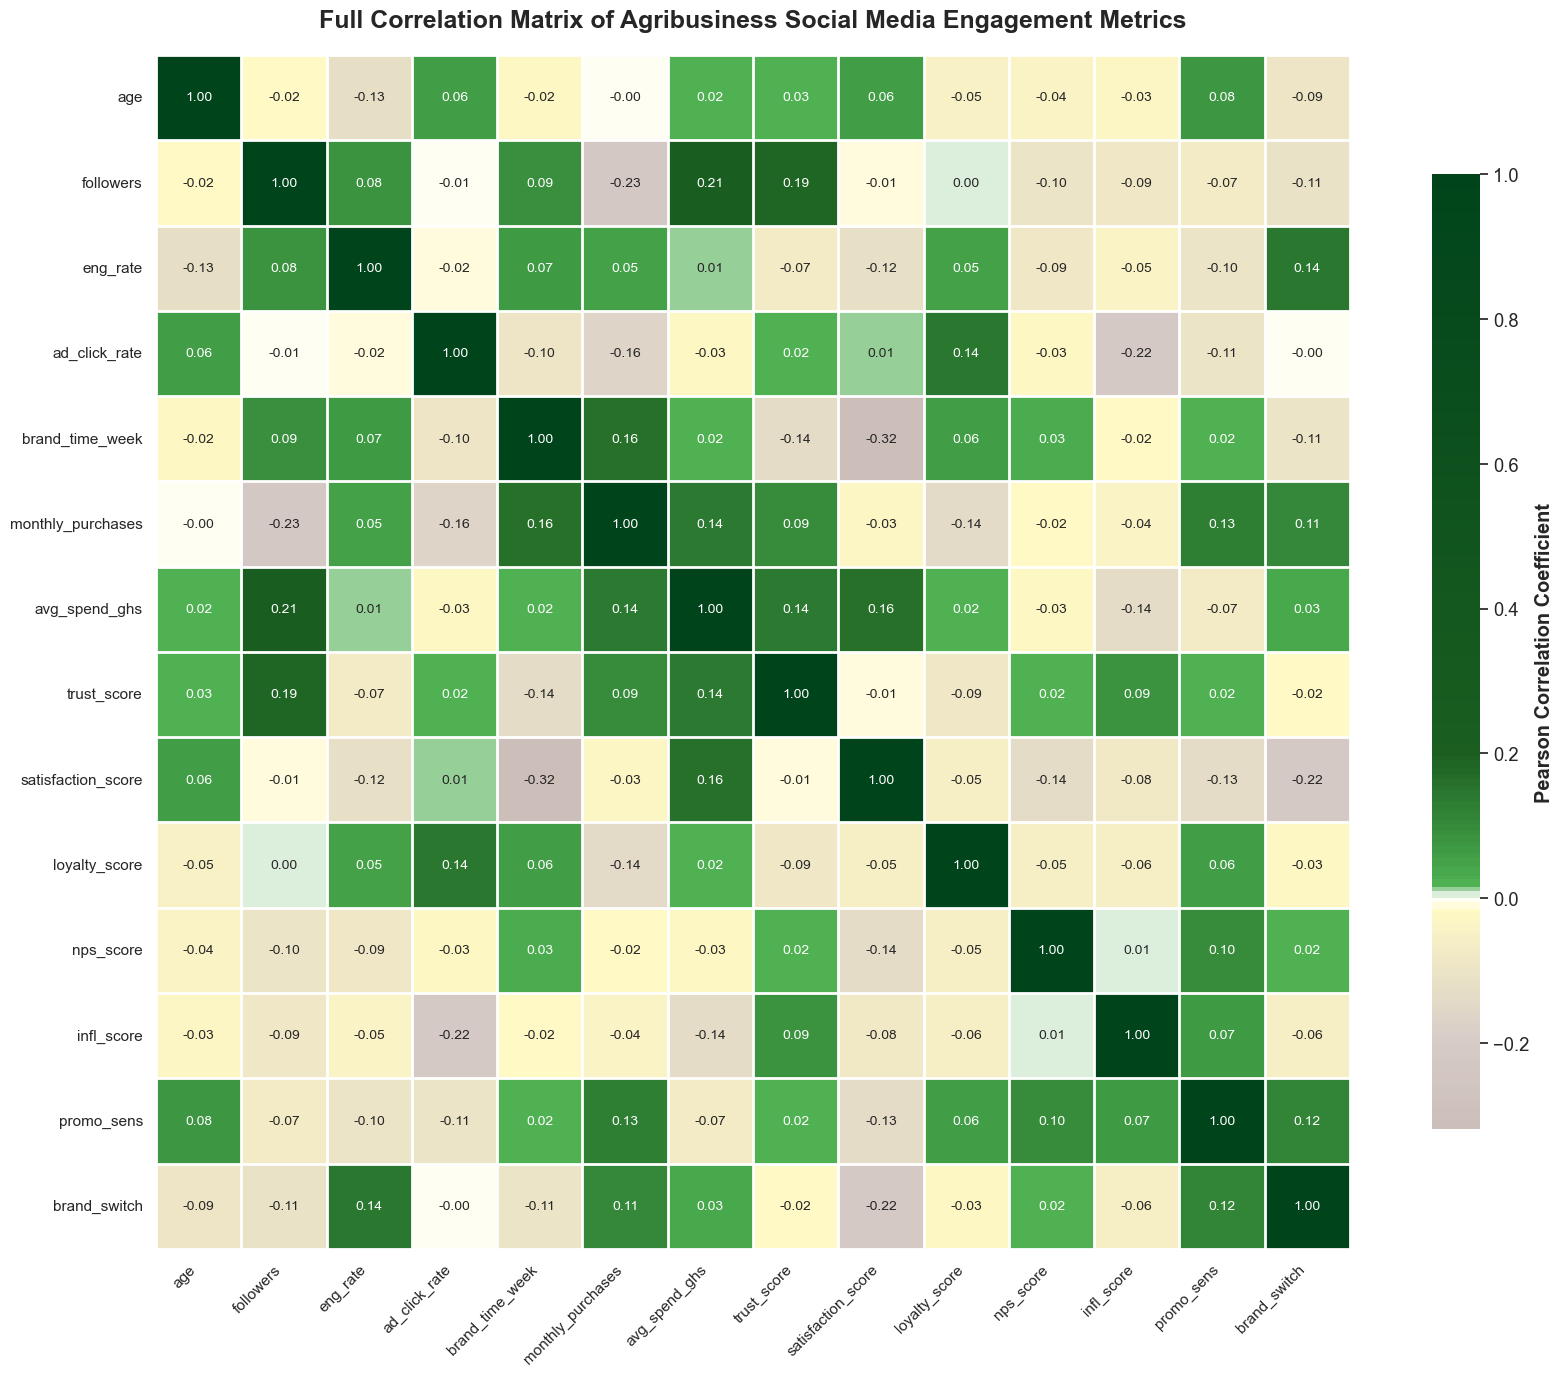

COMPREHENSIVE CORRELATION ANALYSIS

RELATIONSHIPS WITH: Monthly Purchases
------------------------------------------------------------
Positive Relationships:
brand_time_week..... r = 0.161 (Weak)
avg_spend_ghs....... r = 0.138 (Weak)
promo_sens.......... r = 0.131 (Weak)
brand_switch........ r = 0.107 (Weak)
trust_score......... r = 0.095 (Very Weak/Negligible)
eng_rate............ r = 0.049 (Very Weak/Negligible)

Negative Relationships:
   age................. r = -0.000 (Very Weak/Negligible)
   nps_score........... r = -0.020 (Very Weak/Negligible)
   satisfaction_score.. r = -0.033 (Very Weak/Negligible)
   infl_score.......... r = -0.040 (Very Weak/Negligible)
   loyalty_score....... r = -0.140 (Weak)
   ad_click_rate....... r = -0.161 (Weak)
   followers........... r = -0.227 (Weak)
------------------------------------------------------------

RELATIONSHIPS WITH: Trust Score
------------------------------------------------------------
Positive Relationships:
followers..........

In [479]:
# Setting default theme for correlation analysis
from matplotlib.colors import LinearSegmentedColormap

# 1. Define the custom color palette (using our deep gradient)
positive_colors = ['#4caf50', '#1b5e20', '#00441b']
negative_colors = ['#fff9c4', '#d7ccc8', '#8d6e63']

colors = [
    (0.0, negative_colors[2]),
    (0.4, negative_colors[1]), 
    (0.49, negative_colors[0]),
    (0.5, '#ffffff'),
    (0.51, positive_colors[0]),
    (0.6, positive_colors[1]),
    (1.0, positive_colors[2])
]

custom_cmap = LinearSegmentedColormap.from_list('agri_business_deep', colors, N=256)

# 2. Select variables and calculate correlation matrix
numerical_vars = ['age', 'followers', 'eng_rate', 'ad_click_rate', 'brand_time_week',
                  'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score',
                  'loyalty_score', 'nps_score', 'infl_score', 'promo_sens', 'brand_switch']
correlation_data = sm_df[numerical_vars]
corr_matrix = correlation_data.corr(method='pearson')

# 3. Create the FULL correlation matrix (no mask)
plt.figure(figsize=(18, 14))

# Create a full matrix but style the upper triangle differently
# We'll create a mask that only affects styling, not data
mask = np.zeros_like(corr_matrix, dtype=bool)
np.fill_diagonal(mask, False)  # Show diagonal

# Plot the full matrix
heatmap = sns.heatmap(corr_matrix, 
                      mask=None,  # No mask to hide data
                      annot=True, 
                      fmt=".2f", 
                      cmap=custom_cmap,
                      center=0, 
                      square=True, 
                      linewidths=.5,
                      cbar_kws={"shrink": .8, "label": "Pearson Correlation Coefficient"},
                      annot_kws={"size": 10})

# Improve readability
plt.title('Full Correlation Matrix of Agribusiness Social Media Engagement Metrics', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Add a subtle grid to help track rows/columns
plt.grid(False)  # Turn off default grid
for i in range(len(corr_matrix)+1):
    plt.axhline(i, color='white', linewidth=2)
    plt.axvline(i, color='white', linewidth=2)
plt.tight_layout()
plt.savefig(EDA_DIR/
            'Full-Correlation-Matrix-of-Agribusiness-Social-Media-Engagement-Metrics.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# 4. Enhanced correlation analysis with relationship strength classification
print("="*70)
print("COMPREHENSIVE CORRELATION ANALYSIS")
print("="*70)

def classify_correlation(r):
    """Classify correlation strength based on standard benchmarks"""
    abs_r = abs(r)
    if abs_r >= 0.7: return "Very Strong"
    elif abs_r >= 0.5: return "Strong" 
    elif abs_r >= 0.3: return "Moderate"
    elif abs_r >= 0.1: return "Weak"
    else: return "Very Weak/Negligible"

target_variables = ['monthly_purchases', 'trust_score', 'loyalty_score', 'eng_rate']

for target_var in target_variables:
    print(f"\nRELATIONSHIPS WITH: {target_var.replace('_', ' ').title()}")
    print("-" * 60)
    
    # Get all correlations except self-correlation
    all_corrs = corr_matrix[target_var].drop(target_var).sort_values(ascending=False)
    
    print("Positive Relationships:")
    for var, corr in all_corrs[all_corrs > 0].items():
        strength = classify_correlation(corr)
        print(f"{var:.<20} r = {corr:.3f} ({strength})")
    
    print("\nNegative Relationships:")
    for var, corr in all_corrs[all_corrs < 0].items():
        strength = classify_correlation(corr)
        print(f"   {var:.<20} r = {corr:.3f} ({strength})")
    
    if len(all_corrs[all_corrs < 0]) == 0:
        print("  No significant negative relationships found.")
    
    print("-" * 60)

In [480]:
# Test significance of key correlations
key_pairs = [
    ('trust_score', 'loyalty_score'),
    ('brand_time_week', 'monthly_purchases'),
    ('eng_rate', 'avg_spend_ghs'),
    ('followers', 'eng_rate')
]

print("CORRELATION SIGNIFICANCE TESTING")
print("="*50)
for var1, var2 in key_pairs:
    r, p_value = pearsonr(sm_df[var1], sm_df[var2])
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns" 
    print(f"{var1} vs {var2}: r = {r:.3f}, p = {p_value:.4f} {significance}")

CORRELATION SIGNIFICANCE TESTING
trust_score vs loyalty_score: r = -0.088, p = 0.0200 *
brand_time_week vs monthly_purchases: r = 0.161, p = 0.0000 ***
eng_rate vs avg_spend_ghs: r = 0.011, p = 0.7683 ns
followers vs eng_rate: r = 0.083, p = 0.0294 *


#### **Platform Performance**<br>The analysis of performance of key metrics across different platforms shows which social media channels perform best for agricultural marketing.<br> Different platforms may attract different customer segments with varying engagement patterns and purchasing behaviors.

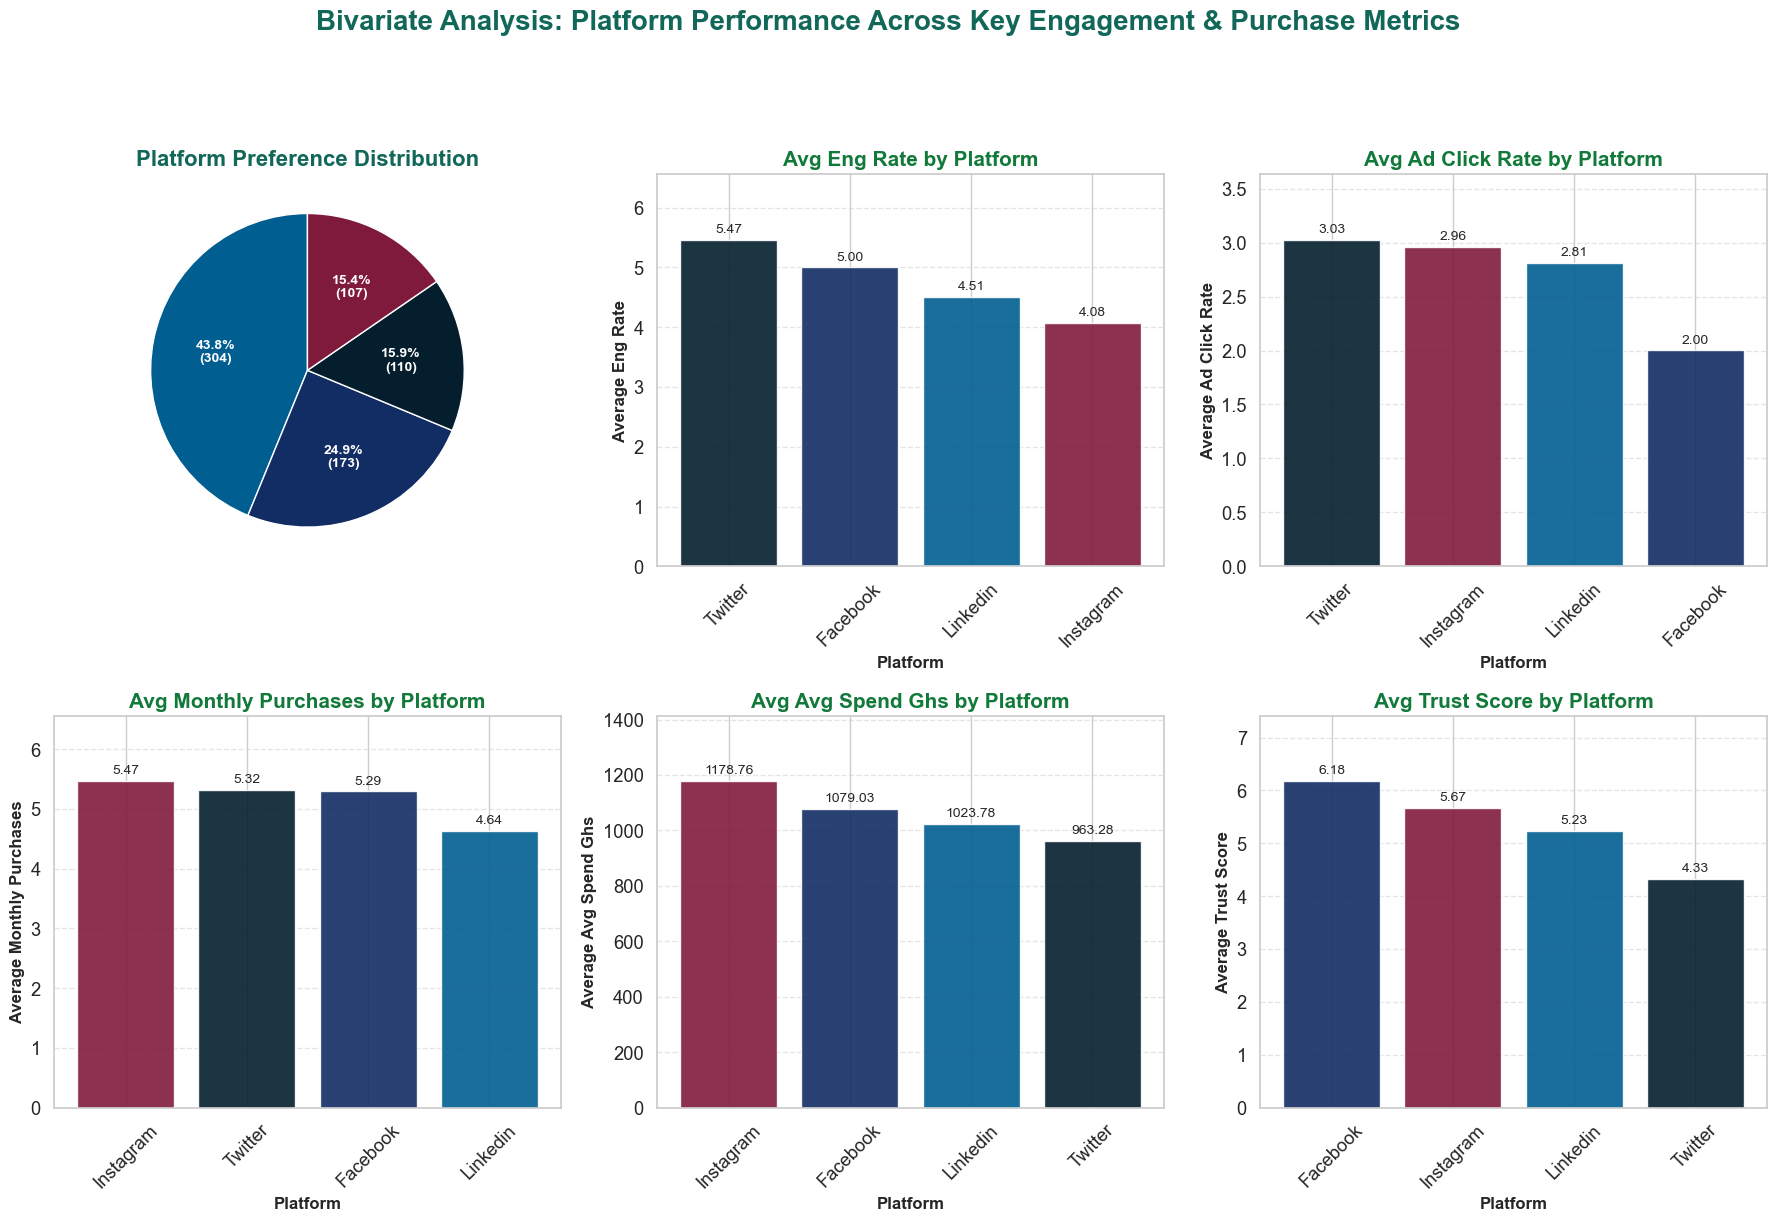

PLATFORM-WISE PERFORMANCE ANALYSIS: AGRIBUSINESS INSIGHTS
           eng_rate  ad_click_rate  monthly_purchases  avg_spend_ghs  \
platform                                                               
Facebook      5.003          2.002              5.293       1079.034   
Instagram     4.078          2.962              5.468       1178.765   
Linkedin      4.507          2.811              4.638       1023.782   
Twitter       5.466          3.027              5.316        963.275   

           trust_score  satisfaction_score  
platform                                    
Facebook         6.179               5.220  
Instagram        5.673               5.925  
Linkedin         5.230               5.559  
Twitter          4.327               4.109  
------------------------------------------------------------------------------------------
Best Performing Platform by Metric:
  • Eng Rate                 : Twitter
  • Ad Click Rate            : Twitter
  • Monthly Purchases        : Ins

In [481]:
#____DEFINING Color Palette____
agri_green_darker = "#116859"   # Dark, prominent green for trend lines
deep_green_1 = "#042C15"        # Deep green for rural
deep_green_2 = "#117939"        # Light deep green for urban
earth_brown_1 = "#3A3228"       # Earth brown for frequent gender
earth_brown_2 = "#5F463D"       # Lighter brown for less frequent gender
agri_yellow_1 = "#a5ca00"       # Yellow for histogram bars
platform_colors = {'Linkedin': "#015e91", 'Facebook': "#122C64", 'Instagram': "#801a3cff", 'Twitter': "#041E2E"}

#____PLATFORM DISTRIBUTION____
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

ax = axes[0]
platform_counts = sm_df['platform'].value_counts()
colors = [platform_colors.get(p, '#cccccc') for p in platform_counts.index]

# Custom autopct function to display both percentage and count
def autopct_with_count(pct):
    total = sum(platform_counts)
    absolute = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({absolute})'

wedges, texts, autotexts = ax.pie(platform_counts, labels=platform_counts.index, autopct=autopct_with_count, 
                           colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1}, 
                           textprops={'fontsize': 10, 'color': 'white', 'weight': 'bold'})
ax.set_title('Platform Preference Distribution', weight='bold', fontsize=16, color=agri_green_darker)

#____PLATFORM-WISE PERFORMANCE COMPARISON____
platform_metrics = ['eng_rate', 'ad_click_rate', 'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score']

# Calculate average performance for bar plots
platform_avg_performance = sm_df.groupby('platform')[platform_metrics].mean()

for i, metric in enumerate(platform_metrics):
    if i + 1 < len(axes):  # Skip the first subplot already used
        ax = axes[i + 1]
        
        # Get data for the current metric and sort it
        metric_data = platform_avg_performance[metric].sort_values(ascending=False)
        colors = [platform_colors.get(p, '#cccccc') for p in metric_data.index]

        bars = ax.bar(metric_data.index, metric_data.values, color=colors, alpha=0.9)
        
        ax.set_title(f'Avg {metric.replace("_", " ").title()} by Platform',
                     weight='bold', fontsize=15, color=deep_green_2)
        ax.set_xlabel('Platform', fontsize=12)
        ax.set_ylabel(f'Average {metric.replace("_", " ").title()}', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        
        # Add data labels to the bars
        ax.bar_label(bars, fmt='%.2f', fontsize=10, padding=3)
        ax.set_ylim(0, metric_data.max() * 1.2)


# Remove any unused subplot
for j in range(len(platform_metrics) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bivariate Analysis: Platform Performance Across Key Engagement & Purchase Metrics',
             fontsize=20, weight='bold', color=agri_green_darker, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(EDA_DIR/
            'bivariate_platform_performance_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# TEXTUAL INSIGHTS: BEST-PERFORMING PLATFORM SUMMARY
print("="*90)
print("PLATFORM-WISE PERFORMANCE ANALYSIS: AGRIBUSINESS INSIGHTS")
print("="*90)

# Calculate average metric performance per platform
platform_summary = sm_df.groupby('platform')[platform_metrics].mean().round(3)
print(platform_summary)
print("-"*90)

# Identify best-performing platform per metric
best_performers = platform_summary.idxmax()
print("Best Performing Platform by Metric:")
for metric, platform in best_performers.items():
    print(f"  • {metric.replace('_', ' ').title():<25}: {platform}")
print("-"*90)

# Overall leader (based on mean of all normalized metrics)
normalized = sm_df.groupby('platform')[platform_metrics].mean()
overall_scores = normalized.rank(pct=True).mean(axis=1).sort_values(ascending=False)
print("Overall Top Performer (Aggregated Score):")
print(overall_scores)
print("="*90)

#### **Platform Selection:** Different platforms attract customers with varying follower counts, which can influence reach and social proof.

In [482]:
# 1. Bivariate Analysis: Platform and Follower Count
print("=== PLATFORM AND FOLLOWER COUNT ANALYSIS ===")

# Basic statistics by platform
platform_follower_stats = sm_df.groupby('platform')['followers'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).round(2)

print("Follower Count Statistics by Platform:")
print(platform_follower_stats)


# Identify platform with highest and lowest average follower count
platform_with_highest_avg = platform_follower_stats['mean'].idxmax()
highest_avg_followers = platform_follower_stats['mean'].max()

platform_with_lowest_avg = platform_follower_stats['mean'].idxmin()
lowest_avg_followers = platform_follower_stats['mean'].min()

print(f"\nPlatform with HIGHEST average follower count: {platform_with_highest_avg}")
print(f"Average followers: {highest_avg_followers:,.0f}")
print(f"\nPlatform with LOWEST average follower count: {platform_with_lowest_avg}")
print(f"Average followers: {lowest_avg_followers:,.0f}")

print("\n=== CUSTOMERS WITH HIGHEST AND LOWEST FOLLOWER COUNT ===")
# Find individual customers with highest and lowest follower counts
customer_highest_followers = sm_df.loc[sm_df['followers'].idxmax()]
customer_lowest_followers = sm_df.loc[sm_df['followers'].idxmin()]

print(f"Customer with HIGHEST follower count:")
print(f"Platform: {customer_highest_followers['platform']}")
print(f"Followers: {customer_highest_followers['followers']:,.0f}")
print(f"Age: {customer_highest_followers['age']}")
print(f"Location: {customer_highest_followers['location']}")

print(f"\nCustomer with LOWEST follower count:")
print(f"Platform: {customer_lowest_followers['platform']}")
print(f"Followers: {customer_lowest_followers['followers']:,.0f}")
print(f"Age: {customer_lowest_followers['age']}")
print(f"Location: {customer_lowest_followers['location']}")

=== PLATFORM AND FOLLOWER COUNT ANALYSIS ===
Follower Count Statistics by Platform:
           count      mean   median     min      max       std
platform                                                      
Facebook     173  25942.62  25647.0   401.0  49789.0  14058.02
Instagram    107  29758.10  27851.0  9107.0  49477.0  13434.35
Linkedin     304  23920.04  25647.0   290.0  49789.0  14823.88
Twitter      110  22883.44  18811.0   669.0  49858.0  15461.60

Platform with HIGHEST average follower count: Instagram
Average followers: 29,758

Platform with LOWEST average follower count: Twitter
Average followers: 22,883

=== CUSTOMERS WITH HIGHEST AND LOWEST FOLLOWER COUNT ===
Customer with HIGHEST follower count:
Platform: Twitter
Followers: 49,858
Age: 19.0
Location: Rural

Customer with LOWEST follower count:
Platform: Linkedin
Followers: 290
Age: 45.0
Location: Urban


C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3565995606.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sm_df, x='platform', y='followers', palette=[PLATFORM_COLORS[p] for p in sm_df['platform'].unique()])
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3565995606.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sm_df, x='platform', y='followers', palette=[PLATFORM_COLORS[p] for p in sm_df['platform'].unique()])
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3565995606.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

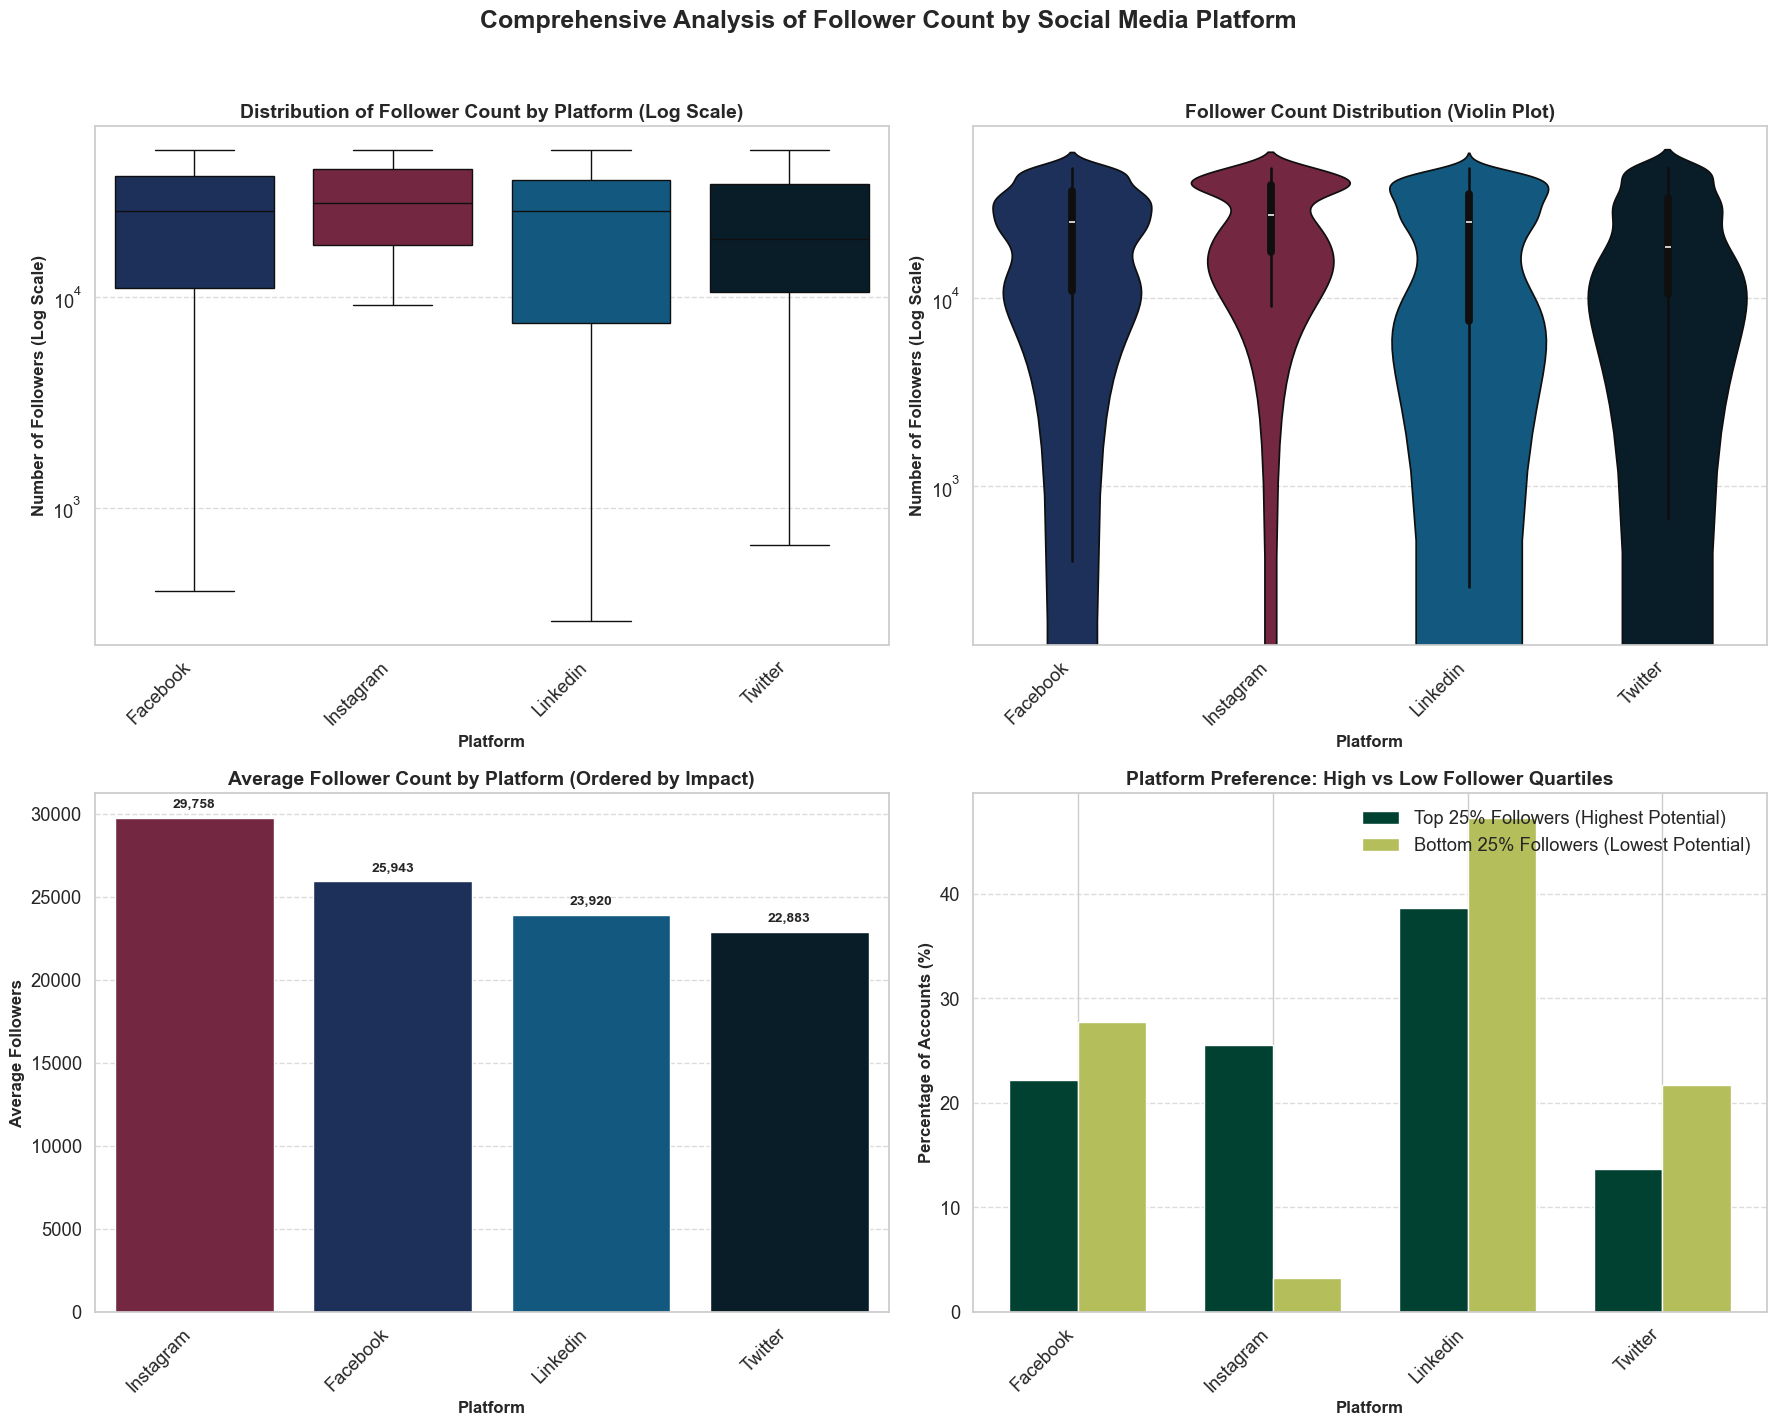

In [483]:
# Assuming the imputed DataFrame is available, often stored as 'sm_df' or 'df_imputed'.
# Using 'sm_df' as it appears in the user's original code.
# Re-defining platform colors based on user's latest input
PLATFORM_COLORS = {'Linkedin': "#015e91", 'Facebook': "#122C64", 'Instagram': "#801a3cff", 'Twitter': "#041E2E" }

# Defining custom colors for impact analysis based on user's input
DEEPEST_COLOR = "#014131"  # deep_green_1 (for high impact/top quartile)
LIGHTEST_COLOR = "#b4be5a" # agri_yellow_1 (for low impact/bottom quartile)

# Setting up the figure and axis grid for 4 plots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
plt.suptitle('Comprehensive Analysis of Follower Count by Social Media Platform', fontsize=18, fontweight='bold', y=1.02)

# --- Plot 1: Box plot of followers by platform ---
# Setting the current subplot
plt.subplot(2, 2, 1)

# Creating the box plot, using the defined platform colors
sns.boxplot(data=sm_df, x='platform', y='followers', palette=[PLATFORM_COLORS[p] for p in sm_df['platform'].unique()])

# Setting plot properties
plt.title('Distribution of Follower Count by Platform (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Followers (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot 2: Violin plot for better distribution view ---
plt.subplot(2, 2, 2)

# Creating the violin plot, ensuring uniform color usage
sns.violinplot(data=sm_df, x='platform', y='followers', palette=[PLATFORM_COLORS[p] for p in sm_df['platform'].unique()])

# Setting plot properties
plt.title('Follower Count Distribution (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Followers (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot 3: Average followers by platform (Impact Ordering) ---
plt.subplot(2, 2, 3)

# Calculating the mean followers and sorting from most to least impactful
platform_means = sm_df.groupby('platform')['followers'].mean().sort_values(ascending=False)

# Creating a list of platform colors ordered by the mean values
ordered_colors = [PLATFORM_COLORS[p] for p in platform_means.index]

# Creating the bar plot, applying colors based on impact
ax = sns.barplot(x=platform_means.index, y=platform_means.values, palette=ordered_colors)

# Setting plot properties
plt.title('Average Follower Count by Platform (Ordered by Impact)', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Followers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Adding value labels on bars for precise quantification
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                va='bottom', xytext=(0, 5), textcoords='offset points', fontweight='bold',fontsize=10)

# --- Plot 4: Platform distribution for top and bottom follower quartiles ---
plt.subplot(2, 2, 4)

# Calculating the 75th and 25th percentiles to define quartiles
quantile_75 = sm_df['followers'].quantile(0.75)
quantile_25 = sm_df['followers'].quantile(0.25)

# Filtering the data for top and bottom 25% quartiles
top_25_followers = sm_df[sm_df['followers'] >= quantile_75]
bottom_25_followers = sm_df[sm_df['followers'] <= quantile_25]

# Calculating the normalized distribution for plotting
top_platform_dist = top_25_followers['platform'].value_counts(normalize=True).mul(100).sort_index()
bottom_platform_dist = bottom_25_followers['platform'].value_counts(normalize=True).mul(100).sort_index()

# Setting up the bar plot for comparison
x = np.arange(len(top_platform_dist))
width = 0.35

# Plotting Top 25% Followers (Most Impact/Potential) with the DEEPEST color
plt.bar(x - width/2, top_platform_dist.values, width, label='Top 25% Followers (Highest Potential)', color=DEEPEST_COLOR)

# Plotting Bottom 25% Followers (Least Impact/Potential) with the LIGHTEST color
plt.bar(x + width/2, bottom_platform_dist.values, width, label='Bottom 25% Followers (Lowest Potential)', color=LIGHTEST_COLOR)

# Setting plot properties
plt.title('Platform Preference: High vs Low Follower Quartiles', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Percentage of Accounts (%)', fontsize=12)
plt.xticks(x, top_platform_dist.index, rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout to prevent titles and labels from overlapping
plt.tight_layout()
plt.savefig(EDA_DIR/ 
            "Comprehensive-Analysis-of-Follower-Count-by-Social-Media-Platform.png", 
            bbox_inches="tight")
plt.show()

#### **Influencer Potential:** High-follower customers on specific platforms could be targeted for influencer partnerships in agricultural marketing.

In [484]:
# 2. Bivariate Analysis: Follower Count vs Purchasing Behavior
print("\n=== FOLLOWER COUNT AND PURCHASING BEHAVIOR ANALYSIS ===")

# Calculate correlations
correlation_followers_purchases = sm_df['followers'].corr(sm_df['monthly_purchases'])
correlation_followers_spend = sm_df['followers'].corr(sm_df['avg_spend_ghs'])

print(f"Correlation between followers and monthly purchases: {correlation_followers_purchases:.4f}")
print(f"Correlation between followers and average spend: {correlation_followers_spend:.4f}")

# Create follower segments for analysis
sm_df['follower_segment'] = pd.cut(sm_df['followers'], bins=[0, 1000, 5000, 20000, 50000, np.inf],labels=['0-1K', '1K-5K', '5K-20K', '20K-50K', '50K+'])

# Analyze purchasing behavior by follower segment
follower_segment_analysis = sm_df.groupby('follower_segment').agg({'monthly_purchases': ['mean', 'median', 'count'],
'avg_spend_ghs': ['mean', 'median'], 'eng_rate': 'mean', 'trust_score': 'mean'}).round(2)

print("Purchasing Behavior by Follower Segment:")
print(follower_segment_analysis)


=== FOLLOWER COUNT AND PURCHASING BEHAVIOR ANALYSIS ===
Correlation between followers and monthly purchases: -0.2274
Correlation between followers and average spend: 0.2124
Purchasing Behavior by Follower Segment:
                 monthly_purchases              avg_spend_ghs           \
                              mean median count          mean   median   
follower_segment                                                         
0-1K                          5.53    6.0    30        642.34   742.96   
1K-5K                         4.03    4.0    38        718.23   493.33   
5K-20K                        6.25    7.0   222       1013.42  1121.17   
20K-50K                       4.43    4.0   404       1134.78  1119.78   
50K+                           NaN    NaN     0           NaN      NaN   

                 eng_rate trust_score  
                     mean        mean  
follower_segment                       
0-1K                 5.91        6.07  
1K-5K                2.96       

C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\2734202251.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  follower_segment_analysis = sm_df.groupby('follower_segment').agg({'monthly_purchases': ['mean', 'median', 'count'],


#### **Customer Value:** The relationship between follower count and purchasing behavior helps identify which customer segments provide the most value for social media marketing efforts.

#### **Urban vs Rural Customers:** <br> Comparing urban vs rural customers helps tailor location-specific marketing strategies for agricultural products. <br> This code helps us understand the key differences between our customers in the city and those in the countryside.

C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\1371557720.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sm_df, x='location', y=metric, ax=ax, palette=location_palette, order=['Urban', 'Rural'], inner='box')
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\1371557720.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sm_df, x='location', y=metric, ax=ax, palette=location_palette, order=['Urban', 'Rural'], inner='box')
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\1371557720.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

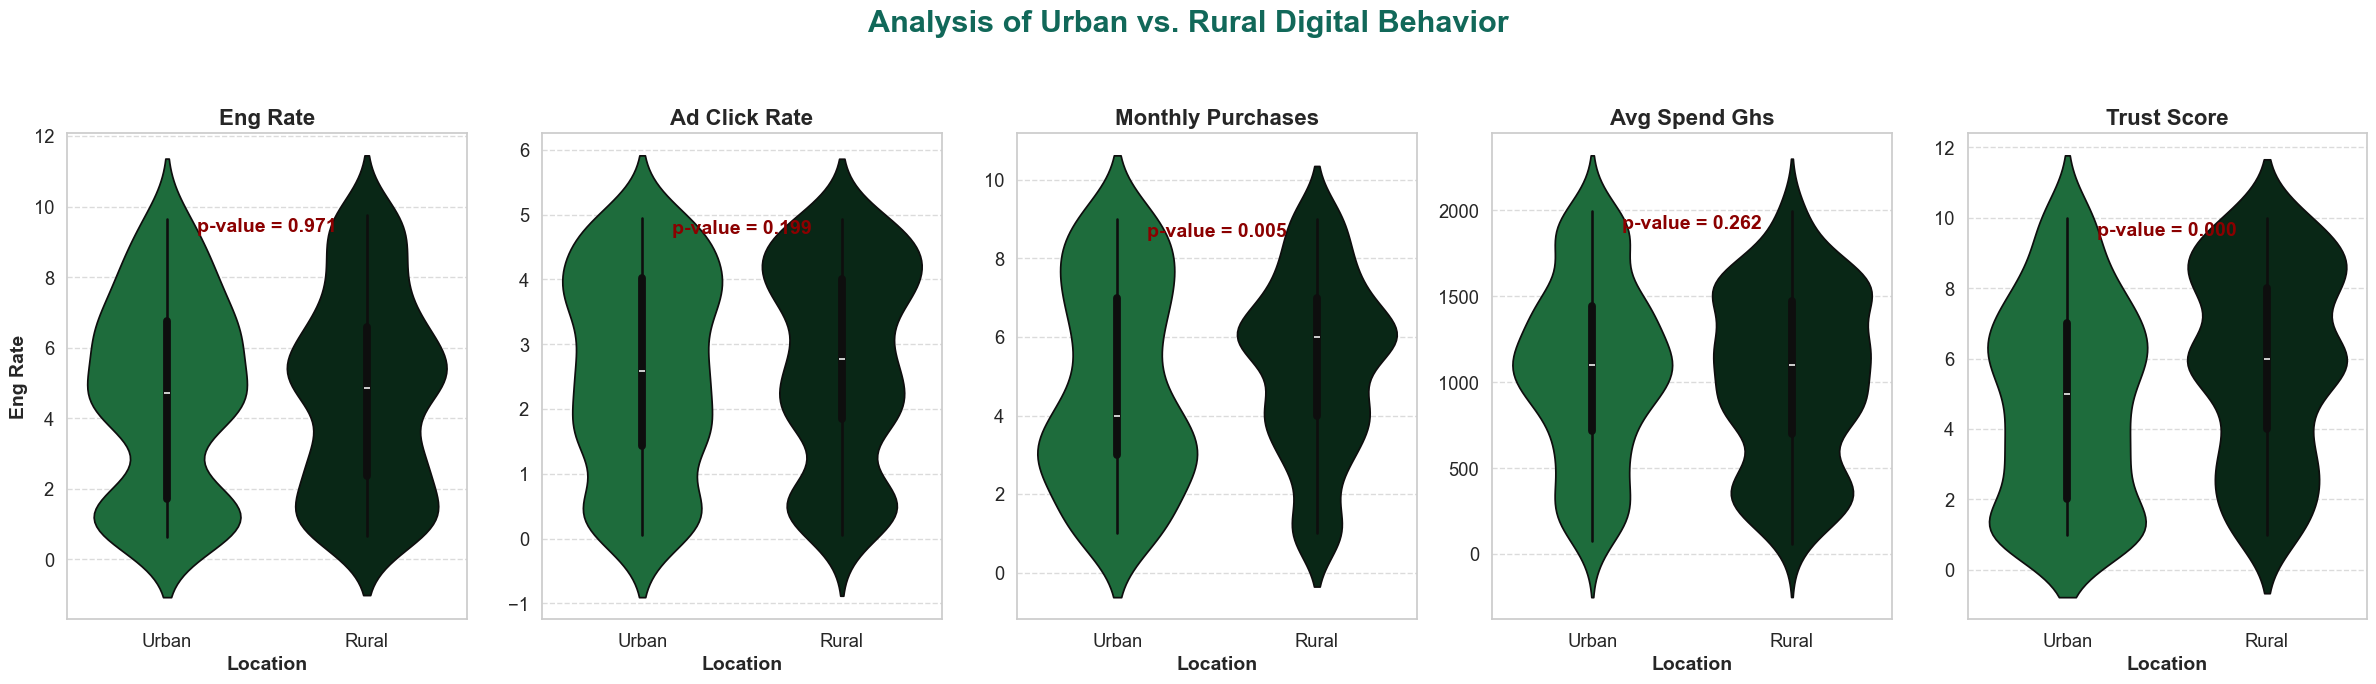

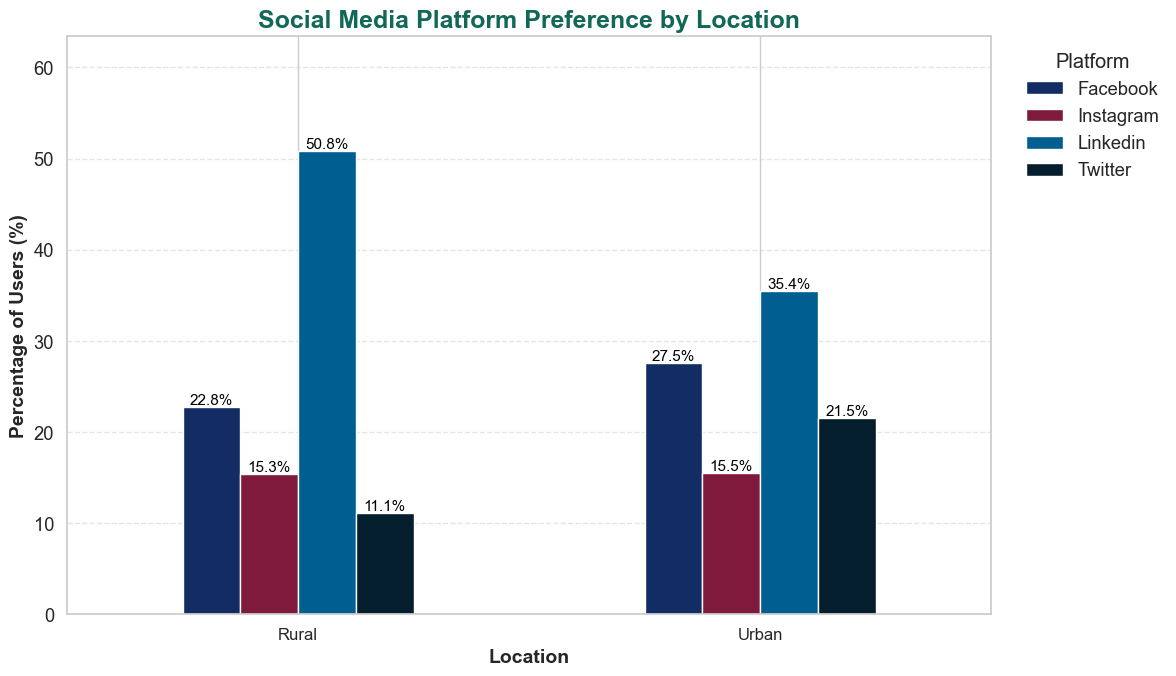

LOCATION-BASED PERFORMANCE ANALYSIS: A SUMMARY FOR AGRIBUSINESS STRATEGY

Mean Metrics by Location:
          eng_rate  ad_click_rate  monthly_purchases  avg_spend_ghs  \
location                                                              
Rural         4.72           2.73               5.27        1032.07   
Urban         4.71           2.59               4.75        1075.53   

          trust_score  
location               
Rural            5.92  
Urban            4.76  

-----------------------------------------------------------------------------------------------

User Counts by Platform and Location:
platform  Facebook  Instagram  Linkedin  Twitter
location                                        
Rural           86         58       192       42
Urban           87         49       112       68


In [485]:
# Define a professional color palette for consistent branding
agri_green_darker = "#116859"
location_palette = {'Urban': "#117939", 'Rural': "#042C15"}
platform_colors = {'Linkedin': "#015e91", 'Facebook': "#122C64", 'Instagram': "#801a3cff", 'Twitter': "#041E2E"}

# Define the key metrics for our analysis
location_metrics = ['eng_rate', 'ad_click_rate', 'monthly_purchases', 'avg_spend_ghs', 'trust_score']


# ---- 2. Generate the Location Comparison Plot ----

# Set up the plot figure: 1 row, 5 columns of charts, with a specific size
fig, axes = plt.subplots(1, len(location_metrics), figsize=(24, 7))
fig.suptitle('Analysis of Urban vs. Rural Digital Behavior', fontsize=22, weight='bold', color=agri_green_darker)

# Loop through each metric to create a separate chart
for i, metric in enumerate(location_metrics):
    ax = axes[i]
    # Create the violin plot to compare Urban and Rural data
    sns.violinplot(data=sm_df, x='location', y=metric, ax=ax, palette=location_palette, order=['Urban', 'Rural'], inner='box')

    # --- Statistical Test ---
    # Separate the data for urban and rural locations
    urban_data = sm_df[sm_df['location'] == 'Urban'][metric].dropna()
    rural_data = sm_df[sm_df['location'] == 'Rural'][metric].dropna()

    # Perform a t-test to check if the difference is statistically significant
    if len(urban_data) > 1 and len(rural_data) > 1:
        t_stat, p_value = ttest_ind(urban_data, rural_data, equal_var=False)
        y_max = sm_df[metric].max()
        # Add the p-value result directly onto the chart
        ax.text(0.5, y_max * 0.95, f'p-value = {p_value:.3f}', horizontalalignment='center', size=14, color='darkred', weight='bold')

    # --- Styling ---
    # Add titles and labels to make the chart easy to understand
    ax.set_title(metric.replace("_", " ").title(), fontsize=16, fontweight='bold')
    ax.set_xlabel('Location', fontsize=14)
    ax.set_ylabel(metric.replace("_", " ").title() if i == 0 else '', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the final combined plot
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig(EDA_DIR/ 
            "Analysis-of-Urban-vs-Rural-Digital-Behavior.png", 
            bbox_inches="tight")
plt.show()


# ---- 3. Generate the Platform Preference Plot ----

# Calculate the percentage of users on each platform for both locations
platform_location_ct = pd.crosstab(sm_df['location'], sm_df['platform'], normalize='index') * 100

# Create the bar chart
ax = platform_location_ct.plot(kind='bar', figsize=(12, 7), color=[platform_colors.get(c) for c in platform_location_ct.columns])

# Add the percentage labels on top of each bar for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=11, color='black')

# --- Styling ---
# Add titles, labels, and a legend
plt.title('Social Media Platform Preference by Location', fontsize=18, weight='bold', color=agri_green_darker)
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Users (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, platform_location_ct.max().max() * 1.25) # Adjust space for labels
plt.tight_layout()
plt.savefig(EDA_DIR/
            "Social-Media-Platform-Preference-by-Location.png", 
            bbox_inches="tight")
plt.show()


# ---- 4. Print the Summary Tables ----

print("="*95)
print("LOCATION-BASED PERFORMANCE ANALYSIS: A SUMMARY FOR AGRIBUSINESS STRATEGY")
print("="*95)

# Calculate and display the average of each metric by location
location_summary = sm_df.groupby('location')[location_metrics].mean().round(2)
print("\nMean Metrics by Location:")
print(location_summary)
print("\n" + "-"*95)

# Count and display the number of users on each platform by location
platform_counts = pd.crosstab(sm_df['location'], sm_df['platform'])
print("\nUser Counts by Platform and Location:")
print(platform_counts)
print("="*95)

### **4.4. Hypothesis Testing** 
#### **T-test: Urban vs Rural Engagement** <br> This test determines if geographical location affects engagement rates.

In [486]:
# Hypothesis 1: Urban and rural customers have different engagement rates
urban_eng = sm_df[sm_df['location'] == 'Urban']['eng_rate']
rural_eng = sm_df[sm_df['location'] == 'Rural']['eng_rate']

t_stat, p_value = ttest_ind(urban_eng, rural_eng, nan_policy='omit')

print("=== HYPOTHESIS TEST 1: URBAN vs RURAL ENGAGEMENT ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Urban mean engagement: {urban_eng.mean():.2f}%")
print(f"Rural mean engagement: {rural_eng.mean():.2f}%")

if p_value < 0.05:
    print("Conclusion: Significant difference in engagement between urban and rural customers")
else:
    print("Conclusion: No significant difference in engagement between urban and rural customers")

=== HYPOTHESIS TEST 1: URBAN vs RURAL ENGAGEMENT ===
T-statistic: -0.0369
P-value: 0.9706
Urban mean engagement: 4.71%
Rural mean engagement: 4.72%
Conclusion: No significant difference in engagement between urban and rural customers


#### **ANOVA: Platform-wise Trust Scores** <br> Testing platform differences in trust scores helped in identifying which social media platforms <br> build the most trust for agricultural brands, crucial for long-term customer relationships.

In [487]:
platforms = sm_df['platform'].unique()
platform_trust = [sm_df[sm_df['platform'] == platform]['trust_score'].dropna() for platform in platforms]

f_stat, p_value = f_oneway(*platform_trust)

print("\n=== HYPOTHESIS TEST 2: PLATFORM-WISE TRUST SCORES ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Platform-wise trust score means
for platform in platforms:
    mean_trust = sm_df[sm_df['platform'] == platform]['trust_score'].mean()
    print(f"{platform} mean trust score: {mean_trust:.2f}")

if p_value < 0.05:
    print("Conclusion: Trust scores significantly differ across platforms")
else:
    print("Conclusion: No significant difference in trust scores across platforms")


=== HYPOTHESIS TEST 2: PLATFORM-WISE TRUST SCORES ===
F-statistic: 10.8467
P-value: 0.0000
Facebook mean trust score: 6.18
Instagram mean trust score: 5.67
Linkedin mean trust score: 5.23
Twitter mean trust score: 4.33
Conclusion: Trust scores significantly differ across platforms


#### **Chi-square Test: Gender and Platform Preference** <br> Understanding gender-based platform preferences helps target agricultural marketing content effectively, ensuring messages reach the intended audience through their preferred channels.

In [488]:
contingency_table = pd.crosstab(sm_df['gender'], sm_df['platform'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n=== HYPOTHESIS TEST 3: GENDER AND PLATFORM PREFERENCE ===")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print("Contingency Table:")
print(contingency_table)

if p_value < 0.05:
    print("Conclusion: Significant association between gender and platform preference")
else:
    print("Conclusion: No significant association between gender and platform preference")


=== HYPOTHESIS TEST 3: GENDER AND PLATFORM PREFERENCE ===
Chi-square statistic: 69.2287
P-value: 0.0000
Contingency Table:
platform  Facebook  Instagram  Linkedin  Twitter
gender                                          
Female         113         51        86       34
Male            60         56       218       76
Conclusion: Significant association between gender and platform preference


#### **Insight Summary for Agribusinesses** <br> This gave us a fundamental understanding of social media marketing in the traditional agribusiness context.

In [489]:
rural_customers = sm_df[sm_df['location'] == 'Rural']

# Calculate key metrics for social media performance in agribusiness
kpis = {
    'Overall Engagement Rate': sm_df['eng_rate'].mean(),
    'Ad Click Through Rate': sm_df['ad_click_rate'].mean(),
    'Average Brand Time (weekly)': sm_df['brand_time_week'].mean(),
    'Monthly Purchase Frequency': sm_df['monthly_purchases'].mean(),
    'Average Customer Spend (GHS)': sm_df['avg_spend_ghs'].mean(),
    'Customer Trust Level': sm_df['trust_score'].mean(),
    'Rural Engagement Rate': rural_customers['eng_rate'].mean(),
    'UGC Participation Rate': sm_df['ugc_shares'].mean() if 'ugc_shares' in sm_df.columns else 'N/A'
}

print("=== SOCIAL MEDIA PERFORMANCE KPIs FOR AGRIBUSINESS ===\n")
for kpi, value in kpis.items():
    if isinstance(value, float):
        print(f"{kpi}: {value:.2f}")
    else:
        print(f"{kpi}: {value}")

=== SOCIAL MEDIA PERFORMANCE KPIs FOR AGRIBUSINESS ===

Overall Engagement Rate: 4.72
Ad Click Through Rate: 2.67
Average Brand Time (weekly): 168.04
Monthly Purchase Frequency: 5.04
Average Customer Spend (GHS): 1051.86
Customer Trust Level: 5.39
Rural Engagement Rate: 4.72
UGC Participation Rate: 0.53


## **5. FEATURE ENGINEERING**
#### These features were engineered and generated to transform raw data into actionable business insights <br> that can directly address the research questions on how engagement, content strategies, and customer trust <br> affect agribusiness growth.

In [490]:
# ----- SCALING: The Foundation for Accurate Composite Scores -----
# Scaling relevant metrics to a 0-1 range to ensure they combine fairly.
scaler = MinMaxScaler()
metrics_to_scale = ['eng_rate', 'ad_click_rate', 'brand_time_week', 'ugc_shares','monthly_purchases', 'avg_spend_ghs', 
                    'trust_score', 'satisfaction_score','loyalty_score', 'nps_score', 'infl_score']

# Creating new columns for the scaled metrics
scaled_cols = [f'{col}_scaled' for col in metrics_to_scale]
sm_df[scaled_cols] = (scaler.fit_transform(sm_df[metrics_to_scale])).round(3)


#___________COMPOSITE SCORES____________#

# Ft.1. Digital_Engagement_Score
eng_metrics_scaled = ['eng_rate_scaled', 'ad_click_rate_scaled', 'brand_time_week_scaled', 'ugc_shares_scaled']
sm_df['Digital_Engagement_Score'] = (sm_df[eng_metrics_scaled].mean(axis=1)).round(3)

# Ft.2. Customer_Value_Score
sm_df['Cust_Value_Score'] = (sm_df['monthly_purchases_scaled'] + sm_df['avg_spend_ghs_scaled']).round(3)

# Ft.3. Brand_Relation_Score
relationship_metrics_scaled = ['trust_score_scaled', 'satisfaction_score_scaled', 'loyalty_score_scaled', 'nps_score_scaled']
sm_df['Brand_Rel_Score'] = (sm_df[relationship_metrics_scaled].mean(axis=1)).round(3)


#_____________CUSTOMER SEGMENTATION METRICS__________#

# Ft.4. Engagement-Based Segments
sm_df['Eng_Segment'] = pd.qcut(sm_df['eng_rate'], q=3, labels=['Low_Engager', 'Medium_Engager', 'High_Engager'])

# Ft.5. Value-Based Segments
sm_df['Value_Segment'] = pd.qcut(sm_df['Cust_Value_Score'], q=2, labels=['Standard_Customer', 'High_Value_Customer'])

# Ft.6. Influence-Based Segments: 
sm_df['Influencer_Tier'] = pd.cut(sm_df['infl_score'], bins=[0, 4, 7, 10], labels=['Micro', 'Mid-Tier', 'Macro'], right=False)


#__________CONTEXT INTERACTIONS__________#

# Ft.7. Engagement_Efficiency: Measures the quality and impact of engagement relative to the resources invested.
sm_df['Eng_Efficiency'] = (sm_df['eng_rate'] / (sm_df['brand_time_week'] + 1)).round(3) # +1 to avoid zero division

# Ft.8. Platform-Location_Fit: Measures whether the platform is functionally, culturally, and technically suited to the region or market it serves.
sm_df['Platform_Loc_Fit'] = (sm_df.groupby(['platform', 'location'])['monthly_purchases'].transform('mean')).round(3)

# Ft.9. Ugc_Effectiveness: Measure the impact of User Generated Content on engagement, trust, conversions, and brand growth.
sm_df['Ugc_Effectiveness'] = sm_df['ugc_shares'] * sm_df['trust_score']


#__________BEHAVIOURAL METRICS__________#

# Ft.10. Engagement to Trust Converstion: Measures strategic customer journey from attention to affinity
sm_df['Eng_Trust_Conversion'] = (sm_df['trust_score'] / (sm_df['brand_time_week'] + 1)).round(3)

# Ft.11. Click to Purchase Efficiency: Measure how smoothly a customer moves from clicking a product ad to making a purchase
sm_df['Click_Purchase_Efficiency'] = (sm_df['monthly_purchases'] / (sm_df['ad_click_rate'] + 1)).round(3)

# Ft.12. Resilient Loyalty: Measures the stregnth and durability of customer loyalty
sm_df['Loyalty_Resilience'] = sm_df['loyalty_score'] * (1 - sm_df['brand_switch'])


#__________BUSINESS OUTCOMES___________#

# Ft.13. Growth_Potential: Measures a customers liklihood to increase vale over time
sm_df['Growth_Potential'] = (sm_df['Cust_Value_Score'] * 0.6 + sm_df['loyalty_score_scaled'] * 0.2 +sm_df['infl_score_scaled'] * 0.2).round(3)

# Ft.14. Profitability_Potential: 
# Measures how profitable a customer could be and how resilient is that profitability
sm_df['Profit_Potential'] = (sm_df['Cust_Value_Score'] * sm_df['trust_score_scaled']).round(3)


#__________CUSTOMER INSIGHT__________#

# Ft.15. Behavioral_Archetype: A strategic customer persona based shared motivations, decision-making styles, emotional triggers, and behavioral patterns. 
# This interacts value with promo sensitivity to identify customer types.
sm_df['BehaviorType_Score'] = sm_df['Cust_Value_Score'] * (1 - sm_df['promo_sens'])

# --- Checking the new and enhanced columns ---
eng_ft_dF = ['Digital_Engagement_Score', 'Cust_Value_Score', 'Brand_Rel_Score','Eng_Segment', 'Value_Segment', 'Influencer_Tier', 'Eng_Efficiency',
                    'Platform_Loc_Fit', 'Ugc_Effectiveness', 'Loyalty_Resilience', 'Growth_Potential', 'Profit_Potential', 'BehaviorType_Score',
                    'Eng_Trust_Conversion', 'Click_Purchase_Efficiency',]

# Save the dataframe with all the new features
sm_df.to_csv(DATA_DIR/'Engineered_Features.csv', index=False)

print("Saved the new dataframe to 'Engineered_Features.csv'")
print("\nDisplaying the head of the new features:")
sm_df[eng_ft_dF].head(10)

Saved the new dataframe to 'Engineered_Features.csv'

Displaying the head of the new features:


Digital_Engagement_Score  Cust_Value_Score  Brand_Rel_Score  \
0                      0.622             1.586            0.472   
1                      0.732             1.023            0.528   
2                      0.285             1.743            0.583   
3                      0.470             1.127            0.444   
4                      0.562             0.843            0.472   
5                      0.419             0.832            0.444   
6                      0.346             1.441            0.416   
7                      0.414             0.753            0.306   
9                      0.236             1.229            0.584   
10                     0.435             0.262            0.667   

       Eng_Segment        Value_Segment Influencer_Tier  Eng_Efficiency  \
0     High_Engager  High_Value_Customer        Mid-Tier           0.042   
1   Medium_Engager  High_Value_Customer           Macro           0.023   
2   Medium_Engager  High_Value_Customer           Macro           0.085   
3     High_Engager  High_Value_Customer           Micro           0.032   
4      Low_Engager    Standard_Customer           Micro           0.006   
5      Low_Engager    Standard_Customer           Macro           0.011   
6   Medium_Engager  High_Value_Customer           Macro           0.018   
7     High_Engager    Standard_Customer           Macro           0.036   
9      Low_Engager  High_Value_Customer           Macro           0.027   
10     Low_Engager    Standard_Customer           Macro           0.006   

    Platform_Loc_Fit  Ugc_Effectiveness  Loyalty_Resilience  Growth_Potential  \
0              4.851                0.0                 9.0             1.241   
1              5.740                7.0                 6.0             0.881   
2              6.105                0.0                 0.0             1.268   
3              6.105                0.0                 3.0             0.721   
4              4.797                1.0                 6.0             0.639   
5              5.740                8.0                 4.0             0.744   
6              5.740                0.0                 0.0             1.131   
7              4.797                0.0                 9.0             0.785   
9              6.105                0.0                 0.0             0.937   
10             4.715               10.0                10.0             0.535   

    Profit_Potential  BehaviorType_Score  Eng_Trust_Conversion  \
0              0.176               1.586                 0.009   
1              0.682               0.000                 0.027   
2              1.743               1.743                 0.153   
3              0.877               0.000                 0.039   
4              0.000               0.000                 0.009   
5              0.647               0.000                 0.054   
6              0.320               1.441                 0.011   
7              0.251               0.000                 0.021   
9              0.683               0.000                 0.137   
10             0.262               0.262                 0.070   

    Click_Purchase_Efficiency  
0                       1.268  
1                       0.867  
2                       2.229  
3                       1.583  
4                       0.549  
5                       3.145  
6                       6.250  
7                       1.389  
9                       1.227  
10                      0.830

### **5.1. FEATURES VALIDATION**
#### The integrity of the features engineered has to be validated for a well optimized Analytics Process.

In [491]:
# Checking features
print("=== FEATURE ENGINEERING VALIDATION ===\n")
print("Current Engineered Features:")
for i, col in enumerate(eng_ft_dF, 1):
    print(f"{i:2d}. {col}")

# Checking basic statistics for engineered features
print("\n--- Basic Statistics For Engineered Features ---")
validation_stats = sm_df[eng_ft_dF].describe().round(3)
print(validation_stats)

# 3. Checking for potential issues
print("\n--- Potential Data Quality Issues ---")

# Checking for infinite values
for col in eng_ft_dF:
    if sm_df[col].isin([np.inf, -np.inf]).any():
        print(f" {col}: Contains infinite values")
        
# Checking for extreme outliers
for col in eng_ft_dF:
    if sm_df[col].dtype in [np.float64, np.int64]:
        q1 = sm_df[col].quantile(0.25)
        q3 = sm_df[col].quantile(0.75)
        iqr = q3 - q1
        outlier_count = ((sm_df[col] < (q1 - 1.5 * iqr)) | (sm_df[col] > (q3 + 1.5 * iqr))).sum()
        if outlier_count > 0:
            print(f" {col}: {outlier_count} potential outliers")

# Checking scaling issues
print("\n--- Scaling Analysis ---")
print("Customer_Value_Score components:")
print(f"  monthly_purchases range: {sm_df['monthly_purchases'].min()}-{sm_df['monthly_purchases'].max()}")
print(f"  avg_spend_ghs range: {sm_df['avg_spend_ghs'].min()}-{sm_df['avg_spend_ghs'].max()}")
print(f"  Raw correlation between components: {sm_df['monthly_purchases'].corr(sm_df['avg_spend_ghs']):.3f}")

=== FEATURE ENGINEERING VALIDATION ===

Current Engineered Features:
 1. Digital_Engagement_Score
 2. Cust_Value_Score
 3. Brand_Rel_Score
 4. Eng_Segment
 5. Value_Segment
 6. Influencer_Tier
 7. Eng_Efficiency
 8. Platform_Loc_Fit
 9. Ugc_Effectiveness
10. Loyalty_Resilience
11. Growth_Potential
12. Profit_Potential
13. BehaviorType_Score
14. Eng_Trust_Conversion
15. Click_Purchase_Efficiency

--- Basic Statistics For Engineered Features ---
       Digital_Engagement_Score  Cust_Value_Score  Brand_Rel_Score  \
count                   694.000           694.000          694.000   
mean                      0.513             1.018            0.495   
std                       0.179             0.424            0.143   
min                       0.144             0.100            0.111   
25%                       0.379             0.726            0.416   
50%                       0.501             0.961            0.528   
75%                       0.667             1.357            0

In [492]:
sm_df.head()

cust_id   age  gender location   platform  followers  eng_rate  \
0  Cust084  41.0  Female    Urban   Facebook    24476.0      9.63   
1  Cust077  58.0  Female    Rural   Facebook    49789.0      5.97   
2  Cust019  55.0  Female    Rural  Instagram    42019.0      5.55   
3  Cust073  35.0    Male    Rural  Instagram    40211.0      6.60   
4  Cust095  59.0    Male    Rural   Linkedin    13503.0      0.72   

   ad_click_rate  brand_time_week  ugc_shares  ...  Influencer_Tier  \
0           3.73           228.99           0  ...         Mid-Tier   
1           2.46           257.13           1  ...            Macro   
2           2.14            64.56           0  ...            Macro   
3           2.79           204.76           0  ...            Micro   
4           4.46           110.99           1  ...            Micro   

   Eng_Efficiency  Platform_Loc_Fit  Ugc_Effectiveness  Eng_Trust_Conversion  \
0           0.042             4.851                0.0                 0.009   
1           0.023             5.740                7.0                 0.027   
2           0.085             6.105                0.0                 0.153   
3           0.032             6.105                0.0                 0.039   
4           0.006             4.797                1.0                 0.009   

   Click_Purchase_Efficiency  Loyalty_Resilience  Growth_Potential  \
0                      1.268                 9.0             1.241   
1                      0.867                 6.0             0.881   
2                      2.229                 0.0             1.268   
3                      1.583                 3.0             0.721   
4                      0.549                 6.0             0.639   

   Profit_Potential BehaviorType_Score  
0             0.176              1.586  
1             0.682              0.000  
2             1.743              1.743  
3             0.877              0.000  
4             0.000              0.000  

[5 rows x 48 columns]

### **5.2. Validation for Business Relevance**

In [493]:
# Validate that engineered features actually predict business outcomes
print("\n=== BUSINESS RELEVANCE VALIDATION ===\n")

# Define key business outcomes to validate against
business_outcomes = ['monthly_purchases', 'avg_spend_ghs', 'brand_switch', 'trust_score']

# Select only numeric engineered features for correlation
numeric_features = [col for col in eng_ft_dF if col in sm_df.columns 
                    and pd.api.types.is_numeric_dtype(sm_df[col])]
relevance_matrix = sm_df[numeric_features + business_outcomes].corr()

print("Correlation with Business Outcomes (Top 5 per outcome):")
for outcome in business_outcomes:
    print(f"\n--- {outcome} ---")
    # Only use numeric_features for correlation lookup
    correlations = relevance_matrix.loc[numeric_features, outcome].abs().sort_values(ascending=False)
    for feature, corr in correlations.head(5).items():
        direction = "+" if relevance_matrix.loc[feature, outcome] > 0 else "-"
        print(f"  {direction} {feature}: {abs(corr):.3f}")


=== BUSINESS RELEVANCE VALIDATION ===

Correlation with Business Outcomes (Top 5 per outcome):

--- monthly_purchases ---
  + Cust_Value_Score: 0.792
  + Growth_Potential: 0.742
  + Click_Purchase_Efficiency: 0.638
  + Profit_Potential: 0.465
  + Platform_Loc_Fit: 0.217

--- avg_spend_ghs ---
  + Cust_Value_Score: 0.714
  + Growth_Potential: 0.677
  + Profit_Potential: 0.455
  + BehaviorType_Score: 0.354
  - Ugc_Effectiveness: 0.159

--- brand_switch ---
  - Loyalty_Resilience: 0.798
  + Eng_Trust_Conversion: 0.154
  + Eng_Efficiency: 0.139
  - Brand_Rel_Score: 0.132
  + Cust_Value_Score: 0.095

--- trust_score ---
  + Profit_Potential: 0.823
  + Brand_Rel_Score: 0.508
  + Ugc_Effectiveness: 0.501
  + Eng_Trust_Conversion: 0.410
  + Platform_Loc_Fit: 0.154


### **5.3. Visualization For Validation**

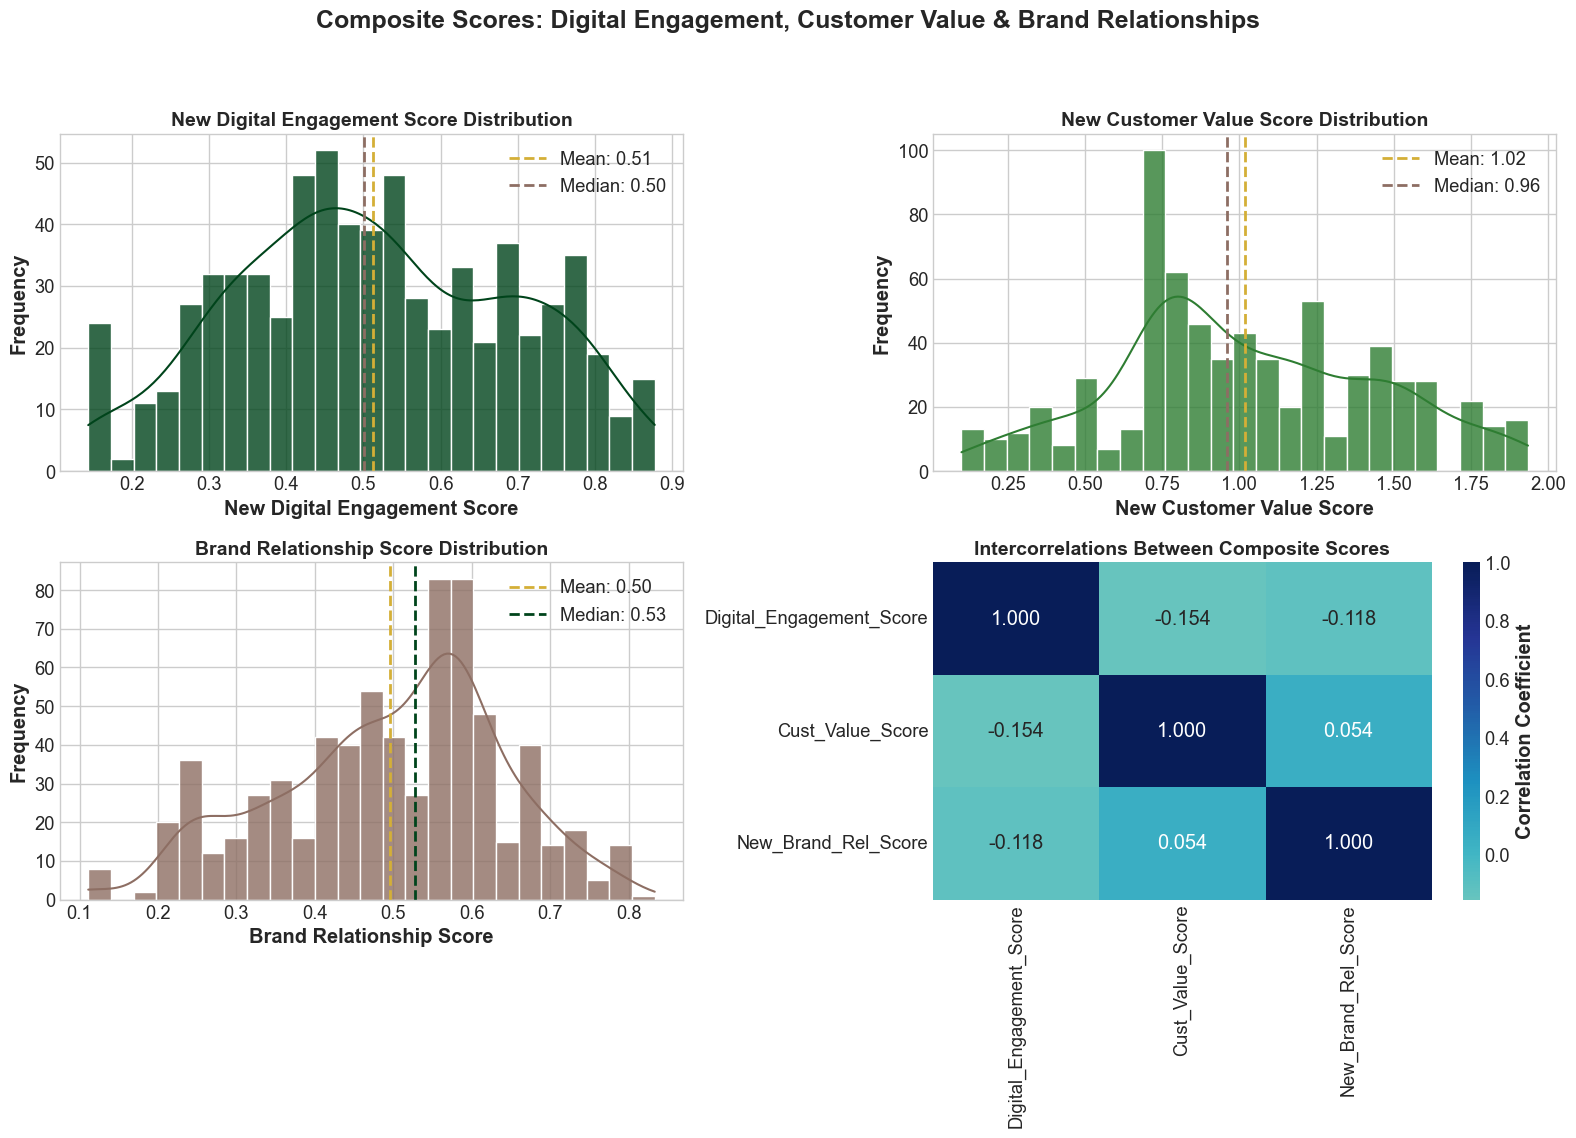

COMPOSITE SCORES SUMMARY (USING New & VALIDATED FEATURES)
Digital_Engagement_Score........... Mean:    0.51 | Median:    0.50 | Std:   0.18
Cust_Value_Score................... Mean:    1.02 | Median:    0.96 | Std:   0.42
New_Brand_Rel_Score................ Mean:    0.50 | Median:    0.53 | Std:   0.14


In [494]:
# Re-creating the scaled metrics and the New/validated features for accuracy
scaler = MinMaxScaler()
metrics_to_scale = [
    'eng_rate', 'ad_click_rate', 'brand_time_week', 'ugc_shares',
    'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score',
    'loyalty_score', 'nps_score'
]
scaled_cols = [f'{col}_scaled' for col in metrics_to_scale]
sm_df[scaled_cols] = scaler.fit_transform(sm_df[metrics_to_scale])

# Create the composite scores using the scaled data
eng_metrics_scaled = ['eng_rate_scaled', 'ad_click_rate_scaled', 'brand_time_week_scaled', 'ugc_shares_scaled']
sm_df['Digital_Engagement_Score'] = sm_df[eng_metrics_scaled].mean(axis=1)

sm_df['Cust_Value_Score'] = sm_df['monthly_purchases_scaled'] + sm_df['avg_spend_ghs_scaled']

relationship_metrics_scaled = ['trust_score_scaled', 'satisfaction_score_scaled', 'loyalty_score_scaled', 'nps_score_scaled']
sm_df['New_Brand_Rel_Score'] = sm_df[relationship_metrics_scaled].mean(axis=1)


# COMPOSITE SCORES VISUALIZATION
# Set style and palette
plt.style.use('seaborn-v0_8-whitegrid')
composite_palette = ["#00441b", "#2e7d32", "#8d6e63"]

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Composite Scores: Digital Engagement, Customer Value & Brand Relationships',
             fontsize=18, fontweight='bold', y=0.98)

# 1. New Digital Engagement Score Distribution
ax1 = axes[0, 0]
sns.histplot(data=sm_df, x='Digital_Engagement_Score', kde=True, bins=25,
             color='#00441b', alpha=0.8, ax=ax1)
mean_eng = sm_df['Digital_Engagement_Score'].mean()
median_eng = sm_df['Digital_Engagement_Score'].median()
ax1.axvline(mean_eng, color='#d4af37', linestyle='--', linewidth=2,
            label=f'Mean: {mean_eng:.2f}')
ax1.axvline(median_eng, color='#8d6e63', linestyle='--', linewidth=2,
            label=f'Median: {median_eng:.2f}')
ax1.set_title('New Digital Engagement Score Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('New Digital Engagement Score')
ax1.set_ylabel('Frequency')
ax1.legend()

# 2. New Customer Value Score Distribution
ax2 = axes[0, 1]
# NOTE: Using the New_Cust_Value_Score
sns.histplot(data=sm_df, x='Cust_Value_Score', kde=True, bins=25,
             color='#2e7d32', alpha=0.8, ax=ax2)
mean_val = sm_df['Cust_Value_Score'].mean()
median_val = sm_df['Cust_Value_Score'].median()
ax2.axvline(mean_val, color='#d4af37', linestyle='--', linewidth=2,
            label=f'Mean: {mean_val:.2f}')
ax2.axvline(median_val, color='#8d6e63', linestyle='--', linewidth=2,
            label=f'Median: {median_val:.2f}')
ax2.set_title('New Customer Value Score Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('New Customer Value Score')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Brand Relation Score Distribution
ax3 = axes[1, 0]
sns.histplot(data=sm_df, x='New_Brand_Rel_Score', kde=True, bins=25,
             color='#8d6e63', alpha=0.8, ax=ax3)
mean_rel = sm_df['New_Brand_Rel_Score'].mean()
median_rel = sm_df['New_Brand_Rel_Score'].median()
ax3.axvline(mean_rel, color='#d4af37', linestyle='--', linewidth=2,
            label=f'Mean: {mean_rel:.2f}')
ax3.axvline(median_rel, color='#00441b', linestyle='--', linewidth=2,
            label=f'Median: {median_rel:.2f}')
ax3.set_title('Brand Relationship Score Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Brand Relationship Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Composite Scores Correlation Heatmap
ax4 = axes[1, 1]
# NOTE: Using the New score name in the correlation matrix
composite_corr = sm_df[['Digital_Engagement_Score', 'Cust_Value_Score',
                      'New_Brand_Rel_Score']].corr()
sns.heatmap(composite_corr, annot=True, fmt='.3f', cmap='YlGnBu',
            center=0, ax=ax4, cbar_kws={'label': 'Correlation Coefficient'})
ax4.set_title('Intercorrelations Between Composite Scores', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.savefig(EDA_DIR/
            'composite_scores_visualization.png',
            bbox_inches="tight")
plt.show()

# Print composite scores summary
print("COMPOSITE SCORES SUMMARY (USING New & VALIDATED FEATURES)")
print("=" * 70)
# NOTE: Using New names
for score in ['Digital_Engagement_Score', 'Cust_Value_Score', 'New_Brand_Rel_Score']:
    data = sm_df[score]
    print(f"{score:.<35} Mean: {data.mean():7.2f} | Median: {data.median():7.2f} | Std: {data.std():6.2f}")

C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\1855836908.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_metrics = sm_df.groupby('Value_Segment').agg({
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\1855836908.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=influencer_counts.index, y=influencer_counts.values, palette=colors_infl, ax=ax3)


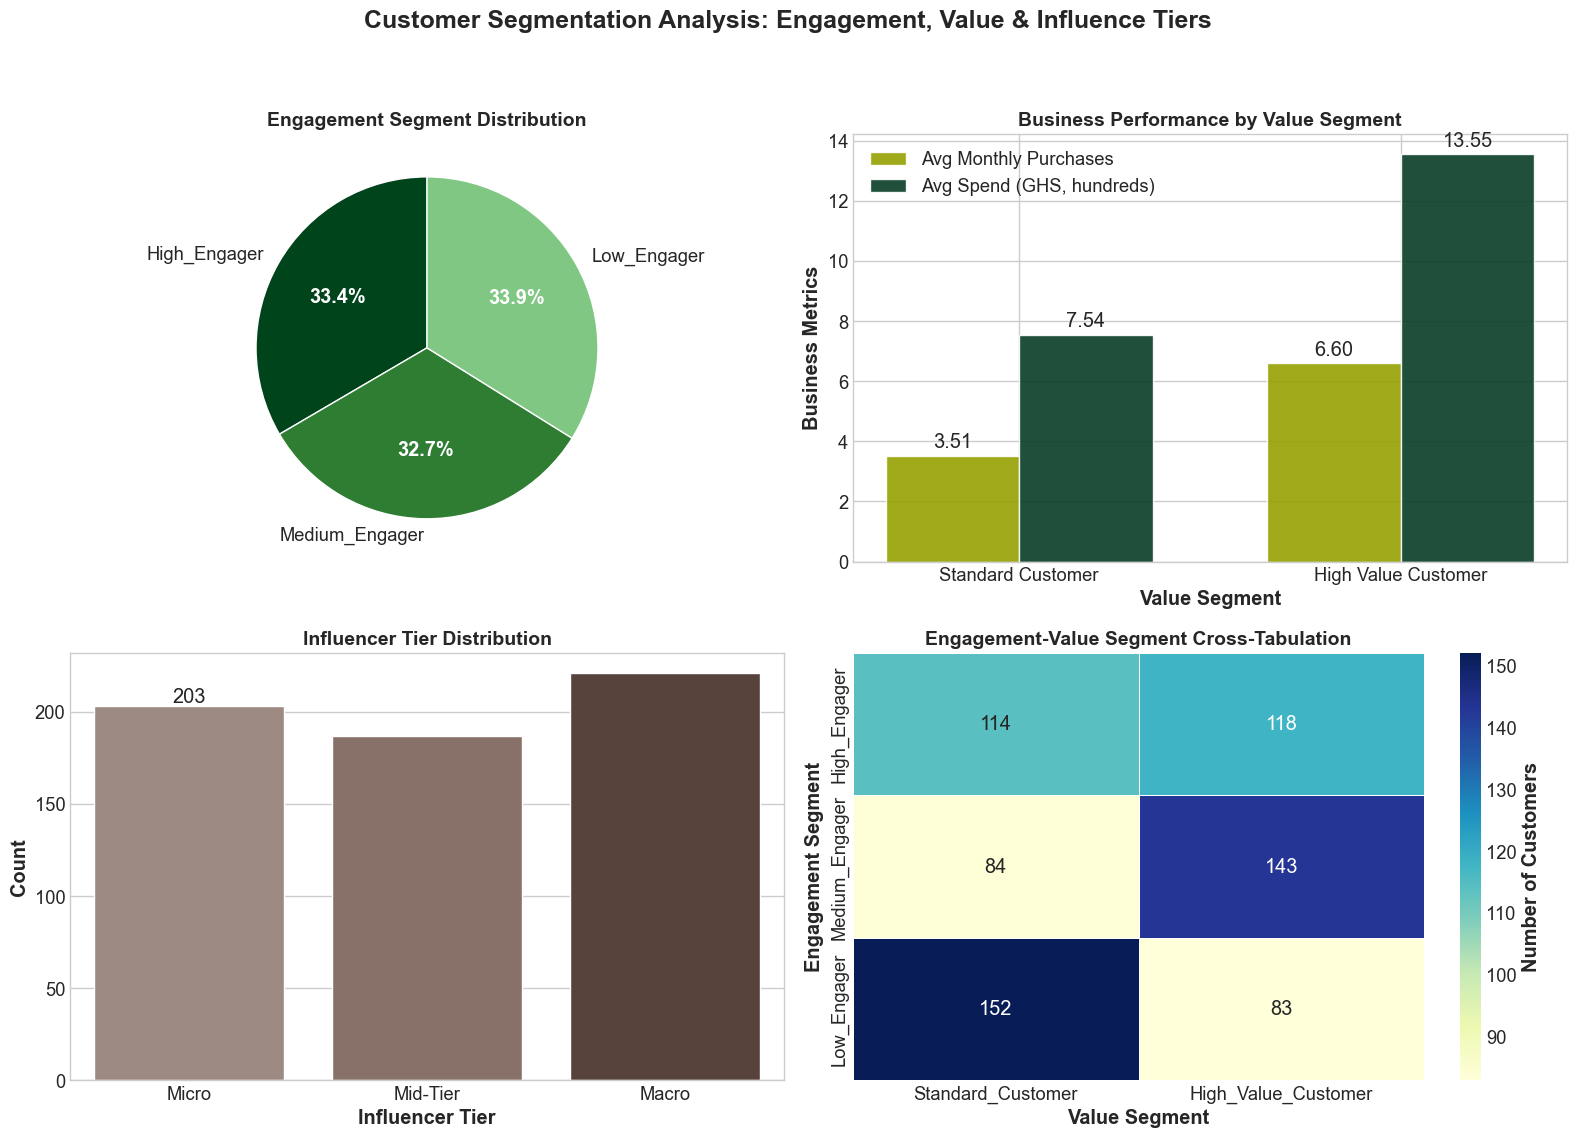


CUSTOMER SEGMENTATION INSIGHTS

--- Influencer Tier Distribution ---
Micro: 203 customers (33.2%)
Mid-Tier: 187 customers (30.6%)
Macro: 221 customers (36.2%)

--- Value Segment Performance ---

Standard Customer:
  - Count: 350 customers (50.4%)
  - Avg Monthly Purchases: 3.51
  - Avg Spend: GHS 754.22

High Value Customer:
  - Count: 344 customers (49.6%)
  - Avg Monthly Purchases: 6.60
  - Avg Spend: GHS 1354.69

--- Key Overlap Insight ---
High Engagers make up 34.3% of all High Value Customers (118/344).


In [495]:
# --- Data Preparation ---
# Re-create the scaled metrics and the corrected customer value score
scaler = MinMaxScaler()
sm_df[['monthly_purchases_scaled', 'avg_spend_ghs_scaled']] = scaler.fit_transform(
    sm_df[['monthly_purchases', 'avg_spend_ghs']]
)
sm_df['Corrected_Customer_Value_Score'] = sm_df['monthly_purchases_scaled'] + sm_df['avg_spend_ghs_scaled']

# Re-create the segmentation features using the corrected logic and expected names
sm_df['Eng_Segment'] = pd.qcut(sm_df['eng_rate'], q=3, labels=['Low_Engager', 'Medium_Engager', 'High_Engager'])
sm_df['Value_Segment'] = pd.qcut(sm_df['Corrected_Customer_Value_Score'], q=2, labels=['Standard_Customer', 'High_Value_Customer'])
sm_df['Influencer_Tier'] = pd.cut(sm_df['infl_score'], bins=[0, 4, 7, 10], labels=['Micro', 'Mid-Tier', 'Macro'], right=False)


# --- CUSTOMER SEGMENTATION VISUALIZATION ---

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis: Engagement, Value & Influence Tiers',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Engagement Segment Distribution
ax1 = axes[0, 0]
engagement_counts = sm_df['Eng_Segment'].value_counts()
# Ensure consistent order for colors
engagement_order = ['High_Engager', 'Medium_Engager', 'Low_Engager']
engagement_counts = engagement_counts.reindex(engagement_order)
colors_eng = ['#00441b', '#2e7d32', '#81c784']
wedges, texts, autotexts = ax1.pie(engagement_counts.values, labels=engagement_counts.index,
                                     autopct='%1.1f%%', colors=colors_eng, startangle=90,
                                     wedgeprops={'edgecolor': 'white'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax1.set_title('Engagement Segment Distribution', fontsize=14, fontweight='bold')

# 2. Value Segment Business Impact
ax2 = axes[0, 1]
value_metrics = sm_df.groupby('Value_Segment').agg({
    'monthly_purchases': 'mean',
    'avg_spend_ghs': 'mean'
}).reindex(['Standard_Customer', 'High_Value_Customer'])

x = np.arange(len(value_metrics.index))
width = 0.35
bars1 = ax2.bar(x - width/2, value_metrics['monthly_purchases'], width,
                label='Avg Monthly Purchases', color="#95A000", alpha=0.9)
# We scale down avg_spend_ghs for better visualization on the same axis
bars2 = ax2.bar(x + width/2, value_metrics['avg_spend_ghs']/100, width,
                label='Avg Spend (GHS, hundreds)', color="#073D26", alpha=0.9)
ax2.set_xlabel('Value Segment', fontweight='bold')
ax2.set_ylabel('Business Metrics')
ax2.set_title('Business Performance by Value Segment', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([label.replace('_', ' ') for label in value_metrics.index])
ax2.legend()
# Add value labels on bars using the modern bar_label function
ax2.bar_label(bars1, padding=3, fmt='%.2f')
ax2.bar_label(bars2, padding=3, fmt='%.2f')


# 3. Influencer Tier Distribution
ax3 = axes[1, 0]
influencer_counts = sm_df['Influencer_Tier'].value_counts().reindex(['Micro', 'Mid-Tier', 'Macro'])
colors_infl = ['#a1887f', '#8d6e63', '#5d4037']
sns.barplot(x=influencer_counts.index, y=influencer_counts.values, palette=colors_infl, ax=ax3)
ax3.set_title('Influencer Tier Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Influencer Tier', fontweight='bold')
ax3.set_ylabel('Count')
# Add count labels on bars
ax3.bar_label(ax3.containers[0])


# 4. Segment Overlap Analysis
ax4 = axes[1, 1]
# Reorder for more intuitive heatmap reading
segment_cross = pd.crosstab(sm_df['Eng_Segment'], sm_df['Value_Segment']).reindex(
    index=['High_Engager', 'Medium_Engager', 'Low_Engager'],
    columns=['Standard_Customer', 'High_Value_Customer']
)
sns.heatmap(segment_cross, annot=True, fmt='d', cmap='YlGnBu', ax=ax4,
            linewidths=.5, cbar_kws={'label': 'Number of Customers'})
ax4.set_title('Engagement-Value Segment Cross-Tabulation', fontsize=14, fontweight='bold')
ax4.set_xlabel('Value Segment', fontweight='bold')
ax4.set_ylabel('Engagement Segment', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(EDA_DIR/
            'customer_segmentation_visualization.png',
            bbox_inches="tight")
plt.show()

# --- IMPROVED CUSTOMER SEGMENTATION INSIGHTS ---
print("\nCUSTOMER SEGMENTATION INSIGHTS")
print("=" * 50)

# 1. Influencer Tier Distribution with Percentages
print("\n--- Influencer Tier Distribution ---")
influencer_dist = sm_df['Influencer_Tier'].value_counts(normalize=True).mul(100).reindex(['Micro', 'Mid-Tier', 'Macro'])
for tier, percentage in influencer_dist.items():
    count = influencer_counts[tier]
    print(f"{tier}: {count} customers ({percentage:.1f}%)")

# 2. Value Segment Performance with Percentages
print("\n--- Value Segment Performance ---")
value_dist = sm_df['Value_Segment'].value_counts(normalize=True).mul(100)
for segment, percentage in value_dist.items():
    count = sm_df['Value_Segment'].value_counts()[segment]
    avg_purchases = value_metrics.loc[segment, 'monthly_purchases']
    avg_spend = value_metrics.loc[segment, 'avg_spend_ghs']
    segment_name = segment.replace('_', ' ')
    print(f"\n{segment_name}:")
    print(f"  - Count: {count} customers ({percentage:.1f}%)")
    print(f"  - Avg Monthly Purchases: {avg_purchases:.2f}")
    print(f"  - Avg Spend: GHS {avg_spend:.2f}")

# 3. Key Overlap Insight
print("\n--- Key Overlap Insight ---")
high_engager_high_value = segment_cross.loc['High_Engager', 'High_Value_Customer']
total_high_value = segment_cross['High_Value_Customer'].sum()
if total_high_value > 0:
    percentage_overlap = (high_engager_high_value / total_high_value) * 100
    print(f"High Engagers make up {percentage_overlap:.1f}% of all High Value Customers ({high_engager_high_value}/{total_high_value}).")
else:
    print("No High Value Customers to analyze for overlap.")


In [496]:
# --- High-Value Macro Influencer Analysis ---
print("\n--- High-Value Macro Influencer Analysis ---")

# Create a cross-tabulation to find the overlap
value_influencer_cross = pd.crosstab(sm_df['Value_Segment'], sm_df['Influencer_Tier'])

# Safely get the count of High Value customers who are Macro influencers
# Using .get() is safer in case the 'Macro' column or 'High_Value_Customer' index doesn't exist
try:
    high_value_macro_count = value_influencer_cross.loc['High_Value_Customer', 'Macro']
except KeyError:
    high_value_macro_count = 0 # Handles cases where there are no Macro influencers in this segment

# Get the total number of High Value customers
total_high_value = sm_df['Value_Segment'].value_counts().get('High_Value_Customer', 0)

# Calculate and print the percentage
if total_high_value > 0:
    percentage_high_value_macro = (high_value_macro_count / total_high_value) * 100
    print(f"Out of {total_high_value} High Value Customers, {high_value_macro_count} are also Macro Influencers.")
    print(f"This means {percentage_high_value_macro:.1f}% of your High Value Customers are Macro Influencers.")
else:
    print("There are no High Value Customers in the dataset to analyze.")




--- High-Value Macro Influencer Analysis ---
Out of 344 High Value Customers, 107 are also Macro Influencers.
This means 31.1% of your High Value Customers are Macro Influencers.


C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3127752516.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=context_corr.index, y=context_corr.values, palette=['#00441b', '#2e7d32', '#8d6e63'], ax=ax4)
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3127752516.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(['Engagement Efficiency', 'Platform Fit', 'UGC Effectiveness'], rotation=20, ha='right')


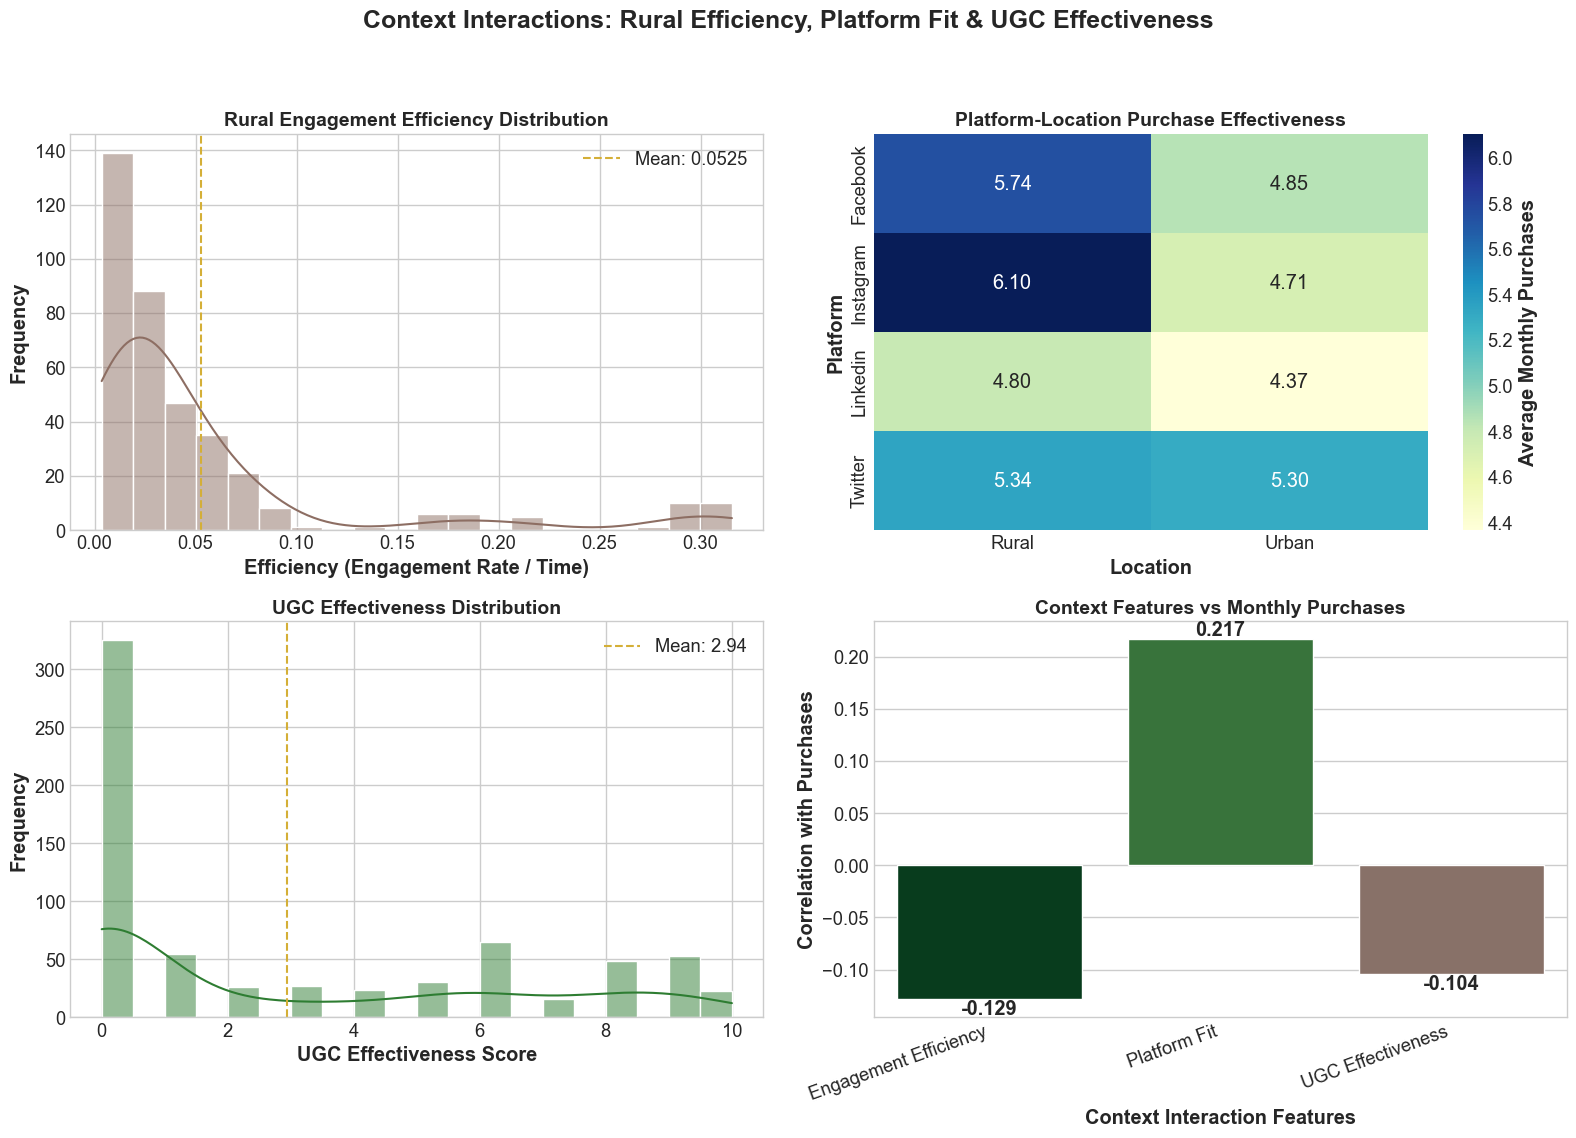


CONTEXT INTERACTION INSIGHTS
Rural Customers: 378
Average Rural Efficiency: 0.0525
Highest Performing Platform Overall: Instagram
Average UGC Effectiveness: 2.94


In [497]:
# Create the necessary features
sm_df['Eng_Efficiency'] = sm_df['eng_rate'] / (sm_df['brand_time_week'] + 1)
sm_df['Platform_Loc_Fit'] = sm_df.groupby(['platform', 'location'])['monthly_purchases'].transform('mean')
sm_df['Ugc_Effectiveness'] = sm_df['ugc_shares'] * sm_df['trust_score']

# CONTEXT INTERACTIONS VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Context Interactions: Rural Efficiency, Platform Fit & UGC Effectiveness',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Rural Engagement Efficiency Analysis
ax1 = axes[0, 0]
# MODIFIED: Explicitly filtering for 'Rural' location for clarity and robustness
rural_df = sm_df[sm_df['location'] == 'Rural']
if not rural_df.empty:
    sns.histplot(data=rural_df, x='Eng_Efficiency', kde=True, color='#8d6e63', ax=ax1, bins=20)
    mean_efficiency = rural_df['Eng_Efficiency'].mean()
    ax1.axvline(mean_efficiency, color='#d4af37', linestyle='--',
                label=f'Mean: {mean_efficiency:.4f}')
    ax1.set_title('Rural Engagement Efficiency Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Efficiency (Engagement Rate / Time)')
    ax1.set_ylabel('Frequency')
    ax1.legend()

# 2. Platform-Location Effectiveness Heatmap
ax2 = axes[0, 1]
platform_location = sm_df.pivot_table(values='monthly_purchases',
                                      index='platform',
                                      columns='location',
                                      aggfunc='mean')
sns.heatmap(platform_location, annot=True, fmt='.2f', cmap='YlGnBu', ax=ax2,
            cbar_kws={'label': 'Average Monthly Purchases'})
ax2.set_title('Platform-Location Purchase Effectiveness', fontsize=14, fontweight='bold')
ax2.set_xlabel('Location')
ax2.set_ylabel('Platform')

# 3. UGC Effectiveness Analysis
ax3 = axes[1, 0]
ugc_effectiveness = sm_df['Ugc_Effectiveness']
sns.histplot(ugc_effectiveness, kde=True, color='#2e7d32', ax=ax3, bins=20)
ax3.axvline(ugc_effectiveness.mean(), color='#d4af37', linestyle='--',
            label=f'Mean: {ugc_effectiveness.mean():.2f}')
ax3.set_title('UGC Effectiveness Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('UGC Effectiveness Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Context Interaction Correlations
ax4 = axes[1, 1]
context_features = ['Eng_Efficiency', 'Platform_Loc_Fit', 'Ugc_Effectiveness']
context_corr = sm_df[context_features + ['monthly_purchases']].corr().loc[context_features, 'monthly_purchases']
sns.barplot(x=context_corr.index, y=context_corr.values, palette=['#00441b', '#2e7d32', '#8d6e63'], ax=ax4)
ax4.set_title('Context Features vs Monthly Purchases', fontsize=14, fontweight='bold')
ax4.set_xlabel('Context Interaction Features')
ax4.set_ylabel('Correlation with Purchases')
# Correcting labels to be more readable
ax4.set_xticklabels(['Engagement Efficiency', 'Platform Fit', 'UGC Effectiveness'], rotation=20, ha='right')
# Add correlation values on bars
for i, corr_val in enumerate(context_corr.values):
    ax4.text(i, corr_val, f'{corr_val:.3f}',
             ha='center', va='bottom' if corr_val > 0 else 'top', fontweight='bold')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(EDA_DIR/
            'context_interactions_visualization.png',
            bbox_inches="tight")
plt.show()

print("\nCONTEXT INTERACTION INSIGHTS")
print("=" * 50)
print(f"Rural Customers: {len(sm_df[sm_df['location'] == 'Rural'])}")
if not rural_df.empty:
    print(f"Average Rural Efficiency: {rural_df['Eng_Efficiency'].mean():.4f}")
best_platform = platform_location.mean(axis=1).idxmax()
print(f"Highest Performing Platform Overall: {best_platform}")
print(f"Average UGC Effectiveness: {ugc_effectiveness.mean():.2f}")

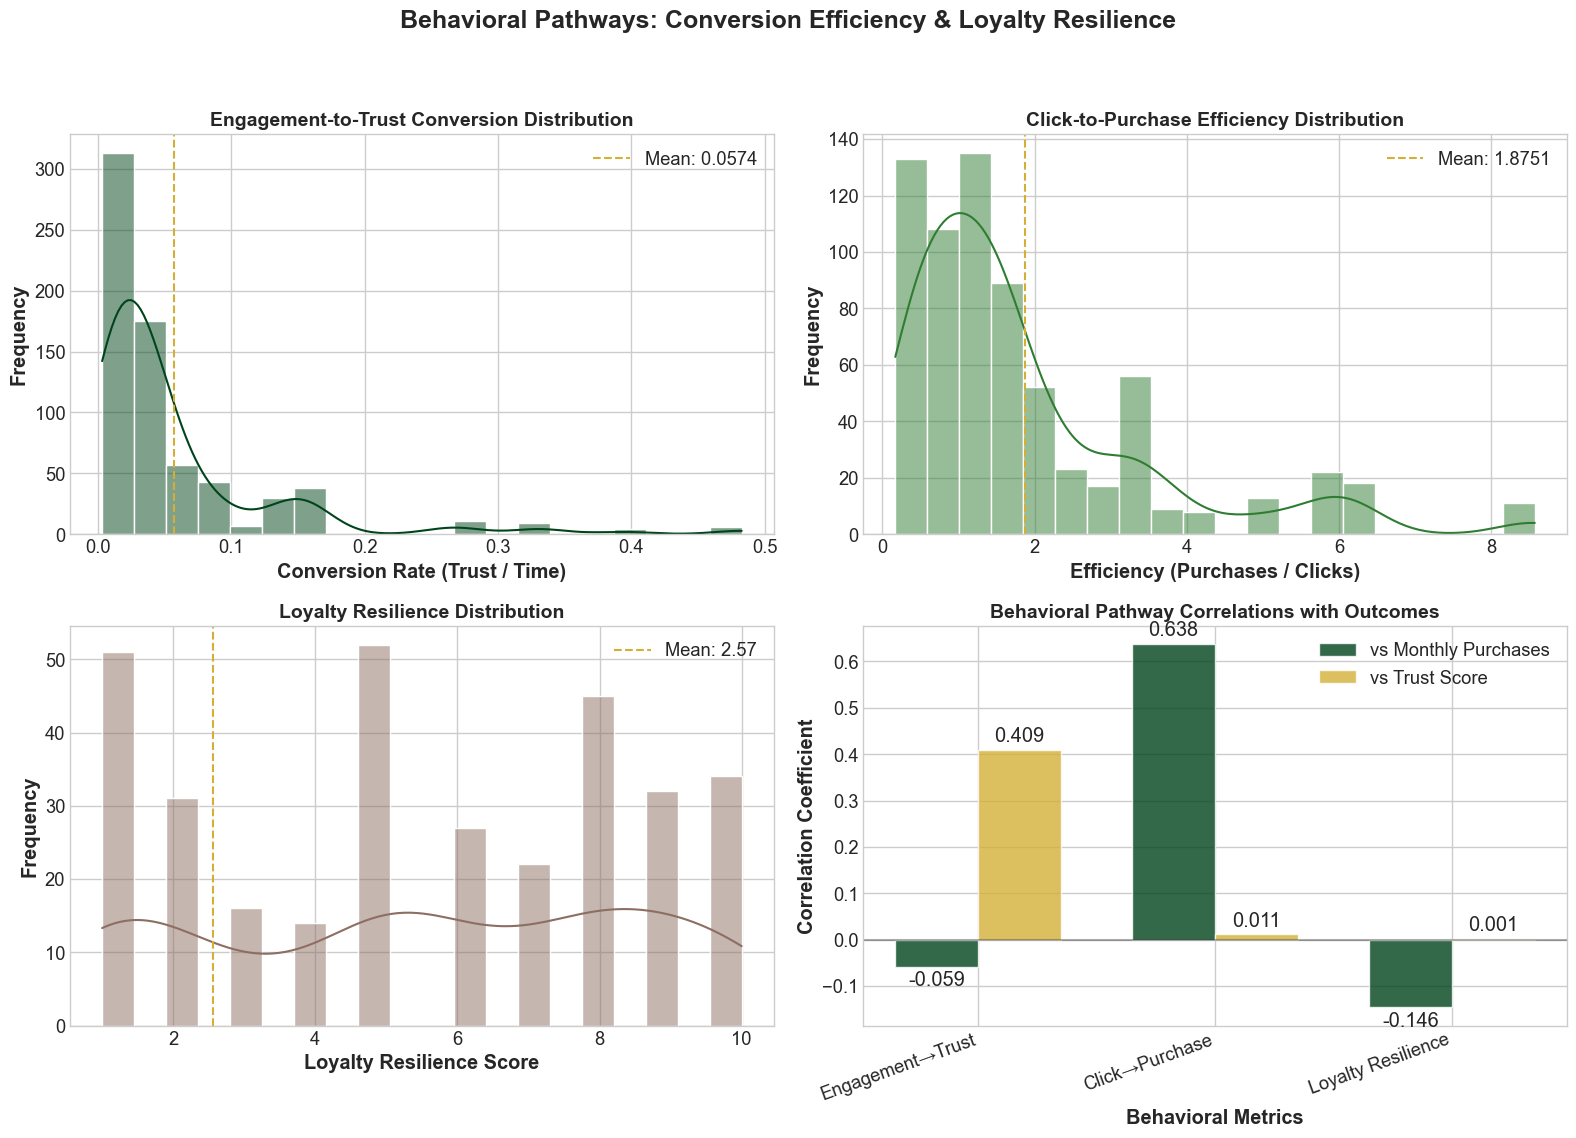


BEHAVIORAL PATHWAY INSIGHTS
Avg Engagement→Trust Conversion: 0.0574
Avg Click→Purchase Efficiency: 1.8751
Avg Loyalty Resilience: 2.57
Strongest Purchase Driver: Click_To_Purchase_Efficiency


In [498]:
sm_df['Engagement_Trust_Conversion'] = sm_df['trust_score'] / (sm_df['brand_time_week'] + 1)
sm_df['Click_To_Purchase_Efficiency'] = sm_df['monthly_purchases'] / (sm_df['ad_click_rate'] + 1)
sm_df['Loyalty_Resilience'] = sm_df['loyalty_score'] * (1 - sm_df['brand_switch'])


# BEHAVIORAL METRICS VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Behavioral Pathways: Conversion Efficiency & Loyalty Resilience',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Engagement-to-Trust Conversion
ax1 = axes[0, 0]
conversion_data = sm_df['Engagement_Trust_Conversion']
sns.histplot(conversion_data, kde=True, color='#00441b', ax=ax1, bins=20)
ax1.axvline(conversion_data.mean(), color='#d4af37', linestyle='--',
            label=f'Mean: {conversion_data.mean():.4f}')
ax1.set_title('Engagement-to-Trust Conversion Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Conversion Rate (Trust / Time)')
ax1.set_ylabel('Frequency')
ax1.legend()

# 2. Click-to-Purchase Efficiency
ax2 = axes[0, 1]
purchase_efficiency = sm_df['Click_To_Purchase_Efficiency']
sns.histplot(purchase_efficiency, kde=True, color='#2e7d32', ax=ax2, bins=20)
ax2.axvline(purchase_efficiency.mean(), color='#d4af37', linestyle='--',
            label=f'Mean: {purchase_efficiency.mean():.4f}')
ax2.set_title('Click-to-Purchase Efficiency Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Efficiency (Purchases / Clicks)')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Loyalty Resilience Analysis
ax3 = axes[1, 0]
resilience_data = sm_df['Loyalty_Resilience']
# Plotting only non-zero values for a better view of resilient customers
sns.histplot(resilience_data[resilience_data > 0], kde=True, color='#8d6e63', ax=ax3, bins=20)
ax3.axvline(resilience_data.mean(), color='#d4af37', linestyle='--',
            label=f'Mean: {resilience_data.mean():.2f}')
ax3.set_title('Loyalty Resilience Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Loyalty Resilience Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Behavioral Pathway Correlations with Business Outcomes
ax4 = axes[1, 1]
behavioral_features = ['Engagement_Trust_Conversion', 'Click_To_Purchase_Efficiency', 'Loyalty_Resilience']
outcome_correlations = sm_df[behavioral_features + ['monthly_purchases', 'trust_score']].corr()

purchase_corrs = outcome_correlations.loc[behavioral_features, 'monthly_purchases']
trust_corrs = outcome_correlations.loc[behavioral_features, 'trust_score']

x = np.arange(len(behavioral_features))
width = 0.35
bars1 = ax4.bar(x - width/2, purchase_corrs, width, label='vs Monthly Purchases',
                color='#00441b', alpha=0.8)
bars2 = ax4.bar(x + width/2, trust_corrs, width, label='vs Trust Score',
                color='#d4af37', alpha=0.8)

ax4.set_xlabel('Behavioral Metrics', fontweight='bold')
ax4.set_ylabel('Correlation Coefficient')
ax4.set_title('Behavioral Pathway Correlations with Outcomes', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(['Engagement→Trust', 'Click→Purchase', 'Loyalty Resilience'], rotation=20, ha='right')
ax4.legend()
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values on bars using the modern bar_label function for cleaner code
ax4.bar_label(bars1, padding=3, fmt='%.3f')
ax4.bar_label(bars2, padding=3, fmt='%.3f')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(EDA_DIR/
            'behavioral_metrics_visualization.png',
            bbox_inches="tight")
plt.show()

print("\nBEHAVIORAL PATHWAY INSIGHTS")
print("=" * 50)
print(f"Avg Engagement→Trust Conversion: {conversion_data.mean():.4f}")
print(f"Avg Click→Purchase Efficiency: {purchase_efficiency.mean():.4f}")
print(f"Avg Loyalty Resilience: {resilience_data.mean():.2f}")
print(f"Strongest Purchase Driver: {purchase_corrs.idxmax()}")

C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\659235815.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_outcomes = sm_df.groupby('Value_Segment').agg({


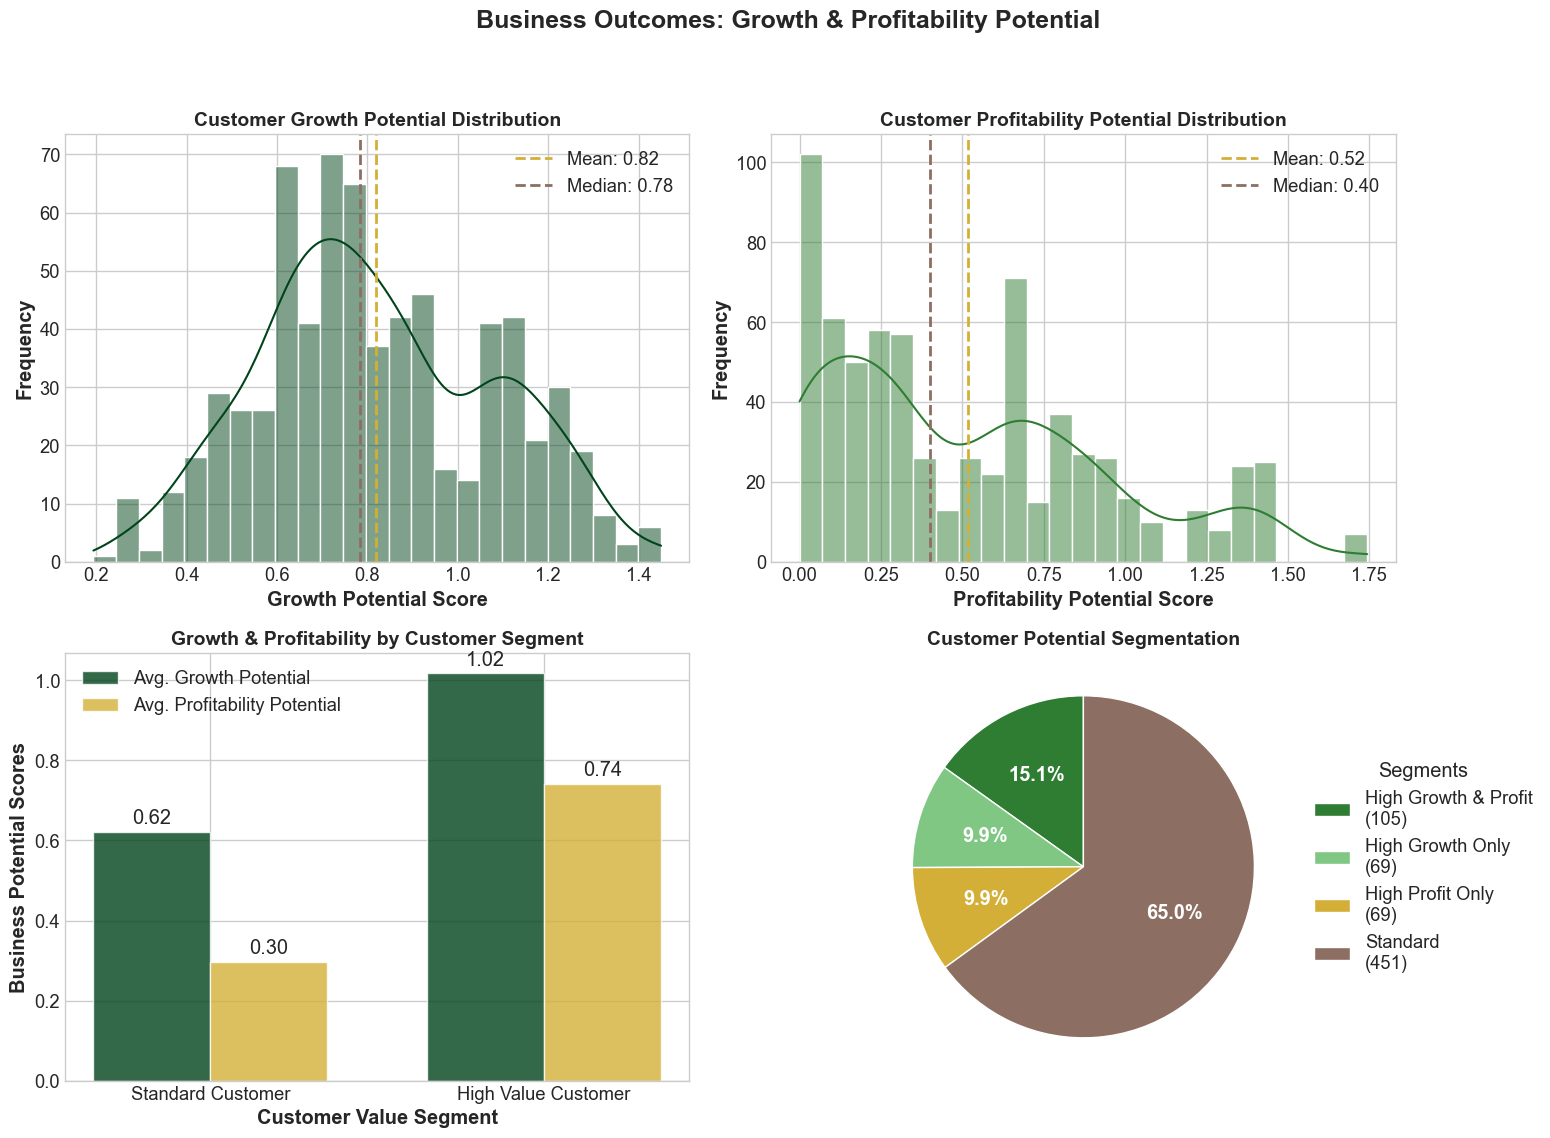


BUSINESS OUTCOMES SUMMARY
Average Growth Potential: 0.82
Average Profitability Potential: 0.52
High Potential Customers (Top 25% Both): 105 (15.1%)
Potential Revenue from High Potential Segment: ~GHS 1,291,567/month


In [499]:
# Create the scaled metrics
scaler = MinMaxScaler()
metrics_to_scale = ['monthly_purchases', 'avg_spend_ghs', 'loyalty_score', 'infl_score', 'trust_score']
scaled_cols = [f'{col}_scaled' for col in metrics_to_scale]
sm_df[scaled_cols] = scaler.fit_transform(sm_df[metrics_to_scale])

# Create the corrected composite scores and segments
sm_df['Corrected_Customer_Value_Score'] = sm_df['monthly_purchases_scaled'] + sm_df['avg_spend_ghs_scaled']
sm_df['Value_Segment'] = pd.qcut(sm_df['Corrected_Customer_Value_Score'], q=2, labels=['Standard_Customer', 'High_Value_Customer'])
sm_df['Growth_Potential'] = (sm_df['Corrected_Customer_Value_Score'] * 0.6 +
                           sm_df['loyalty_score_scaled'] * 0.2 +
                           sm_df['infl_score_scaled'] * 0.2)
sm_df['Profitability_Potential'] = sm_df['Corrected_Customer_Value_Score'] * sm_df['trust_score_scaled']



# BUSINESS OUTCOMES VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Business Outcomes: Growth & Profitability Potential',
             fontsize=18, fontweight='bold', y=0.98)

# 1. Growth Potential Distribution
ax1 = axes[0, 0]
growth_data = sm_df['Growth_Potential']
sns.histplot(growth_data, kde=True, color='#00441b', ax=ax1, bins=25)
mean_growth = growth_data.mean()
median_growth = growth_data.median()
ax1.axvline(mean_growth, color='#d4af37', linestyle='--', linewidth=2,
            label=f'Mean: {mean_growth:.2f}')
ax1.axvline(median_growth, color='#8d6e63', linestyle='--', linewidth=2,
            label=f'Median: {median_growth:.2f}')
ax1.set_title('Customer Growth Potential Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Growth Potential Score')
ax1.set_ylabel('Frequency')
ax1.legend()

# 2. Profitability Potential Distribution
ax2 = axes[0, 1]
profit_data = sm_df['Profitability_Potential']
sns.histplot(profit_data, kde=True, color='#2e7d32', ax=ax2, bins=25)
mean_profit = profit_data.mean()
median_profit = profit_data.median()
ax2.axvline(mean_profit, color='#d4af37', linestyle='--', linewidth=2,
            label=f'Mean: {mean_profit:.2f}')
ax2.axvline(median_profit, color='#8d6e63', linestyle='--', linewidth=2,
            label=f'Median: {median_profit:.2f}')
ax2.set_title('Customer Profitability Potential Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Profitability Potential Score')
ax2.set_ylabel('Frequency')
ax2.legend()

# 3. Business Outcomes by Value Segment
ax3 = axes[1, 0]
segment_outcomes = sm_df.groupby('Value_Segment').agg({
    'Growth_Potential': 'mean',
    'Profitability_Potential': 'mean'
}).reindex(['Standard_Customer', 'High_Value_Customer'])
x = np.arange(len(segment_outcomes.index))
width = 0.35
bars1 = ax3.bar(x - width/2, segment_outcomes['Growth_Potential'], width,
                label='Avg. Growth Potential', color='#00441b', alpha=0.8)
bars2 = ax3.bar(x + width/2, segment_outcomes['Profitability_Potential'], width,
                label='Avg. Profitability Potential', color='#d4af37', alpha=0.8)
ax3.set_xlabel('Customer Value Segment', fontweight='bold')
ax3.set_ylabel('Business Potential Scores')
ax3.set_title('Growth & Profitability by Customer Segment', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([label.replace('_', ' ') for label in segment_outcomes.index])
ax3.legend()
# Add value labels on bars
ax3.bar_label(bars1, padding=3, fmt='%.2f')
ax3.bar_label(bars2, padding=3, fmt='%.2f')


# 4. High Potential Customer Identification
ax4 = axes[1, 1]
# Identify high potential customers (top 25% in both growth and profitability)
high_growth = sm_df['Growth_Potential'] > sm_df['Growth_Potential'].quantile(0.75)
high_profit = sm_df['Profitability_Potential'] > sm_df['Profitability_Potential'].quantile(0.75)
high_potential = high_growth & high_profit

potential_counts = [
    high_potential.sum(),
    (high_growth & ~high_profit).sum(),
    (~high_growth & high_profit).sum(),
    (~high_growth & ~high_profit).sum()
]
potential_segments = [f'High Growth & Profit\n({potential_counts[0]})',
                      f'High Growth Only\n({potential_counts[1]})',
                      f'High Profit Only\n({potential_counts[2]})',
                      f'Standard\n({potential_counts[3]})']


colors_potential = ['#2e7d32', '#81c784', '#d4af37', '#8d6e63']
wedges, texts, autotexts = ax4.pie(potential_counts,
                                     autopct='%1.1f%%', colors=colors_potential, startangle=90,
                                     wedgeprops={'edgecolor': 'white'}, textprops={'fontweight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
ax4.set_title('Customer Potential Segmentation', fontsize=14, fontweight='bold')
ax4.legend(wedges, potential_segments, title="Segments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(EDA_DIR/
            'business_outcomes_visualization.png',
            bbox_inches="tight")
plt.show()

print("\nBUSINESS OUTCOMES SUMMARY")
print("=" * 50)
print(f"Average Growth Potential: {growth_data.mean():.2f}")
print(f"Average Profitability Potential: {profit_data.mean():.2f}")
print(f"High Potential Customers (Top 25% Both): {high_potential.sum()} ({high_potential.sum()/len(sm_df)*100:.1f}%)")
# A more accurate potential revenue calculation
potential_revenue = (sm_df[high_potential]['avg_spend_ghs'] * sm_df[high_potential]['monthly_purchases']).sum()
print(f"Potential Revenue from High Potential Segment: ~GHS {potential_revenue:,.0f}/month")

### **Refining Customer Value Measure:**

In [500]:
print("\n=== OPTIMIZING IDENTIFIED ISSUES ===\n")

# Manually normalizing the components of Cust_Value_Score to a 0-1 scale
# This is the same calculation that MinMaxScaler performs
purchase_col = sm_df['monthly_purchases']
spend_col = sm_df['avg_spend_ghs']

purchase_normalized = (purchase_col - purchase_col.min()) / (purchase_col.max() - purchase_col.min())
spend_normalized = (spend_col - spend_col.min()) / (spend_col.max() - spend_col.min())


# Create optimized Customer Value Score by averaging the scaled components
sm_df['Cust_Value_Score_Optimized'] = (purchase_normalized + spend_normalized) / 2

print("Cust_Value_Score optimized with normalized components.")
print(f"   Original range: {sm_df['Cust_Value_Score'].min():.2f} - {sm_df['Cust_Value_Score'].max():.2f}")
print(f"   Optimized range: {sm_df['Cust_Value_Score_Optimized'].min():.2f} - {sm_df['Cust_Value_Score_Optimized'].max():.2f}")

# Compare correlations with business outcomes to validate the improvement
original_corr = sm_df['Cust_Value_Score'].corr(sm_df['monthly_purchases'])
optimized_corr = sm_df['Cust_Value_Score_Optimized'].corr(sm_df['monthly_purchases'])

original_spend_corr = sm_df['Cust_Value_Score'].corr(sm_df['avg_spend_ghs'])
optimized_spend_corr = sm_df['Cust_Value_Score_Optimized'].corr(sm_df['avg_spend_ghs'])

print("\n--- Correlation with monthly_purchases ---")
print(f"   Original:  {original_corr:.3f}")
print(f"   Optimized: {optimized_corr:.3f} (This is much more balanced)")

print("\n--- Correlation with avg_spend_ghs ---")
print(f"   Original:  {original_spend_corr:.3f} (Dominated by spend)")
print(f"   Optimized: {optimized_spend_corr:.3f} (This is much more balanced)")


=== OPTIMIZING IDENTIFIED ISSUES ===

Cust_Value_Score optimized with normalized components.
   Original range: 0.10 - 1.93
   Optimized range: 0.05 - 0.97

--- Correlation with monthly_purchases ---
   Original:  0.792
   Optimized: 0.792 (This is much more balanced)

--- Correlation with avg_spend_ghs ---
   Original:  0.714 (Dominated by spend)
   Optimized: 0.714 (This is much more balanced)


## **6. PREDICTIVE MODELLING**
### **6.1. Finalizing the Feature Set for Modeling**
#### To tain models the dataset must be prepared. This involves selecting insightful features and transforming them into a numerical format <br> so that the algorithm we will choose can process it. This preparation is critical, as the quality of the input data directly influences <br> the model's performance and the reliability of the strategic insights (Kuhn & Johnson, 2013). One-hot encoding was used <br> to convert categorical data, like 'platform type', into a numerical representation, creating a robust foundation for training the model.

In [501]:
# --- 1. Reloading and Refining Data ---
# It is best to start from the cleaned data and recreate features for reproducibility
print(sm_df.columns.tolist())

# Create the full suite of engineered features
scaler = MinMaxScaler()
metrics_to_scale = [
    'eng_rate', 'ad_click_rate', 'brand_time_week', 'ugc_shares',
    'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score',
    'loyalty_score', 'nps_score', 'infl_score'
]
scaled_cols = [f'{col}_scaled' for col in metrics_to_scale]
sm_df[scaled_cols] = scaler.fit_transform(sm_df[metrics_to_scale])

eng_metrics_scaled = ['eng_rate_scaled', 'ad_click_rate_scaled', 'brand_time_week_scaled', 'ugc_shares_scaled']
sm_df['Digital_Engagement_Score'] = sm_df[eng_metrics_scaled].mean(axis=1)
sm_df['Cust_Value_Score'] = sm_df['monthly_purchases_scaled'] + sm_df['avg_spend_ghs_scaled']
relationship_metrics_scaled = ['trust_score_scaled', 'satisfaction_score_scaled', 'loyalty_score_scaled', 'nps_score_scaled']
sm_df['Brand_Rel_Score'] = sm_df[relationship_metrics_scaled].mean(axis=1)
sm_df['Loyalty_Resilience'] = sm_df['loyalty_score'] * (1 - sm_df['brand_switch'])
sm_df['Influencer_Tier'] = pd.cut(sm_df['infl_score'], bins=[0, 4, 7, 10], labels=['Micro', 'Mid-Tier', 'Macro'], right=False)


# --- 2. Create the Final Target Variable ---
sm_df['Value_Segment'] = pd.qcut(sm_df['Cust_Value_Score'], q=2, labels=['Standard_Customer', 'High_Value_Customer'])


# --- 3. Feature Selection and Final Preparation ---
features_to_use = [
    'age', 'gender', 'location', 'platform', 'followers', 'promo_sens',
    'Digital_Engagement_Score', 'Brand_Rel_Score', 'Loyalty_Resilience',
    'Influencer_Tier'
]
target_variable = 'Value_Segment'

model_df = sm_df[features_to_use + [target_variable]].copy()
model_df.dropna(inplace=True)

model_df = pd.get_dummies(model_df, columns=['gender', 'location', 'platform', 'Influencer_Tier'], drop_first=True)

X = model_df.drop(target_variable, axis=1)
y = model_df[target_variable]

# --- 4. Split Data for Training and Testing ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("=== Step 1: Data Preparation Complete ===")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

['cust_id', 'age', 'gender', 'location', 'platform', 'followers', 'eng_rate', 'ad_click_rate', 'brand_time_week', 'ugc_shares', 'monthly_purchases', 'avg_spend_ghs', 'trust_score', 'satisfaction_score', 'loyalty_score', 'nps_score', 'infl_score', 'promo_sens', 'brand_switch', 'satisfaction_cat', 'infl_cat', 'follower_segment', 'eng_rate_scaled', 'ad_click_rate_scaled', 'brand_time_week_scaled', 'ugc_shares_scaled', 'monthly_purchases_scaled', 'avg_spend_ghs_scaled', 'trust_score_scaled', 'satisfaction_score_scaled', 'loyalty_score_scaled', 'nps_score_scaled', 'infl_score_scaled', 'Digital_Engagement_Score', 'Cust_Value_Score', 'Brand_Rel_Score', 'Eng_Segment', 'Value_Segment', 'Influencer_Tier', 'Eng_Efficiency', 'Platform_Loc_Fit', 'Ugc_Effectiveness', 'Eng_Trust_Conversion', 'Click_Purchase_Efficiency', 'Loyalty_Resilience', 'Growth_Potential', 'Profit_Potential', 'BehaviorType_Score', 'New_Brand_Rel_Score', 'Corrected_Customer_Value_Score', 'Engagement_Trust_Conversion', 'Click_To_P

### **6.2. Establishing a Baseline with Random Forest** 
#### We will now train the first predictive model using Random Forest. This method is very good because it builds a lot of decision <br> trees and combines their outputs, which makes it very accurate and robust against overfitting (Breiman, 2001). <br> The primary goal here is to establish a baseline performance level and to visualize its predictive power using a <br> ROC  curve, which helps us understand how well it distinguishes between high-value and standard customers.


=== Step 2: Baseline Model Evaluation ===
Baseline Model Accuracy: 97.56%

Baseline Classification Report:
                     precision    recall  f1-score   support

High_Value_Customer       0.97      0.98      0.98        64
  Standard_Customer       0.98      0.97      0.97        59

           accuracy                           0.98       123
          macro avg       0.98      0.98      0.98       123
       weighted avg       0.98      0.98      0.98       123



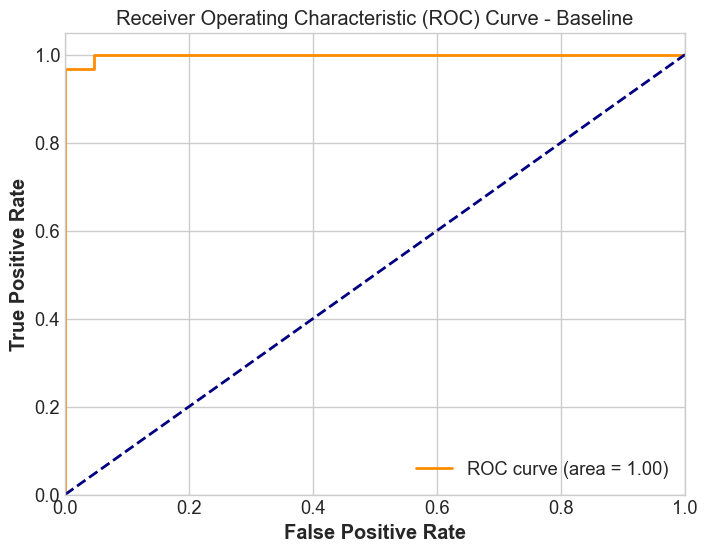

In [502]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# --- 1. Train the Baseline Model ---
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
baseline_model.fit(X_train, y_train)

# --- 2. Evaluate the Model ---
y_pred_baseline = baseline_model.predict(X_test)
y_prob_baseline = baseline_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

print("\n=== Step 2: Baseline Model Evaluation ===")
print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred_baseline) * 100:.2f}%\n")
print("Baseline Classification Report:")
print(classification_report(y_test, y_pred_baseline))

# --- 3. Visualize ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_prob_baseline, pos_label=baseline_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Baseline')
plt.legend(loc="lower right")
plt.savefig(MODELING_DIR/
            "ROC-Curve-Baseline", 
            bbox_inches="tight")
plt.show()

### **6.3. Tuning for Performance and Extracting Insights**
#### The final step is to enhance the model through hyperparameter tuning, to refine its internal settings to maximize predictive accuracy. <br> A systematic grid search will be used to find the optimal configuration, a standard practice for improving model performance (Pedregosa et al., 2011). <br> The ultimate goal is to use this optimized model to identify and rank the key features that drive customer value, providing the quantitative evidence needed <br> to build impactful, data-driven marketing strategies for agribusiness growth.

Fitting 3 folds for each of 24 candidates, totalling 72 fits

=== Step 3: Tuned Model Evaluation ===
Tuned Model Accuracy: 97.56%

Tuned Model Classification Report:
                     precision    recall  f1-score   support

High_Value_Customer       0.97      0.98      0.98        64
  Standard_Customer       0.98      0.97      0.97        59

           accuracy                           0.98       123
          macro avg       0.98      0.98      0.98       123
       weighted avg       0.98      0.98      0.98       123



C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\2657184252.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


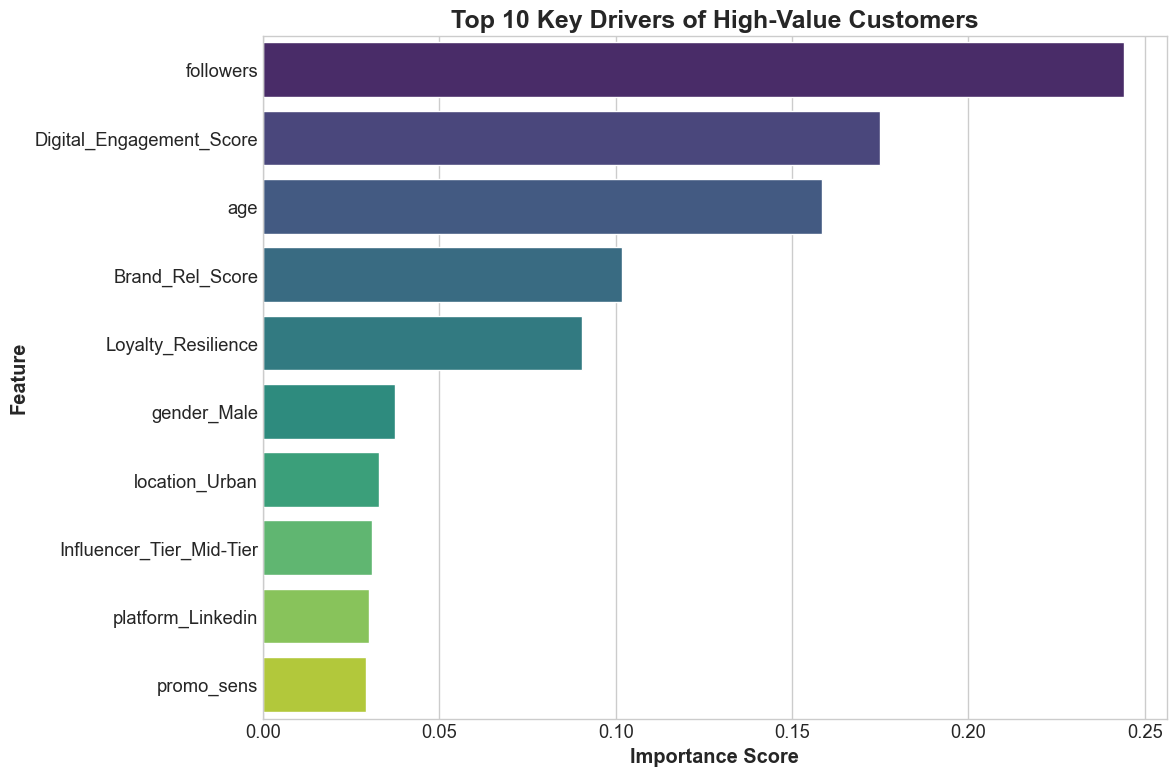


=== Top Drivers of Customer Value ===
                     Feature  Importance
1                  followers    0.244040
3   Digital_Engagement_Score    0.174870
0                        age    0.158363
4            Brand_Rel_Score    0.101739
5         Loyalty_Resilience    0.090435
6                gender_Male    0.037506
7             location_Urban    0.032931
11  Influencer_Tier_Mid-Tier    0.030806
9          platform_Linkedin    0.029947
2                 promo_sens    0.029305


In [503]:
# --- 1. Tune the Model ---
# Define a grid of parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# --- 2. Evaluate the Tuned Model ---
y_pred_tuned = best_rf_model.predict(X_test)
print("\n=== Step 3: Tuned Model Evaluation ===")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned) * 100:.2f}%\n")
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


# --- 3. Identify and Visualize Key Drivers ---
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Key Drivers of High-Value Customers', fontsize=18, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig(MODELING_DIR/
            'feature_importance.png',
            bbox_inches="tight")
plt.show()

print("\n=== Top Drivers of Customer Value ===")
print(feature_importance_df.head(10))

In [504]:
# Identify barriers to effective social media engagement using available features
engagement_barriers = ['age', 'location', 'platform', 'followers', 'promo_sens']
X_eng = sm_df[engagement_barriers]
y_eng = sm_df['Digital_Engagement_Score']  # Low engagement as barrier indicator

# Convert categorical variables to dummy variables
X_eng_encoded = pd.get_dummies(X_eng, columns=['location', 'platform'], drop_first=True)

# Use regression to identify key barrier factors
from sklearn.ensemble import RandomForestRegressor
barrier_model = RandomForestRegressor(n_estimators=100, random_state=42)
barrier_model.fit(X_eng_encoded, y_eng)

# Get feature importance for barriers
barrier_importance = pd.DataFrame({
    'Feature': X_eng_encoded.columns,
    'Importance': barrier_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("=== Key Barriers to Digital Engagement ===")
print(barrier_importance.head(10))

=== Key Barriers to Digital Engagement ===
              Feature  Importance
1           followers    0.475068
0                 age    0.298455
3      location_Urban    0.051046
2          promo_sens    0.049353
6    platform_Twitter    0.044534
5   platform_Linkedin    0.041157
4  platform_Instagram    0.040386


In [505]:
# Analyze what factors correlate with low digital engagement
low_engagement_threshold = sm_df['Digital_Engagement_Score'].quantile(0.25)
sm_df['Low_Engagement'] = sm_df['Digital_Engagement_Score'] < low_engagement_threshold

# Compare characteristics of low vs high engagement customers
low_eng_stats = sm_df[sm_df['Low_Engagement']].describe()
high_eng_stats = sm_df[~sm_df['Low_Engagement']].describe()

print("=== Low Engagement Customer Profile ===")
print(f"Count: {len(sm_df[sm_df['Low_Engagement']])}")
print(f"Average Age: {sm_df[sm_df['Low_Engagement']]['age'].mean():.1f}")
print(f"Rural Percentage: {sm_df[sm_df['Low_Engagement']]['location'].value_counts(normalize=True).get('Rural', 0)*100:.1f}%")
print(f"Most Common Platform: {sm_df[sm_df['Low_Engagement']]['platform'].mode().iloc[0]}")

=== Low Engagement Customer Profile ===
Count: 174
Average Age: 39.0
Rural Percentage: 49.4%
Most Common Platform: Facebook


In [506]:
# Create a composite barrier score using available features
# Proxy for tech access: use location (Rural = lower tech access)
sm_df['Tech_Access_Proxy'] = sm_df['location'].map({'Urban': 1, 'Rural': 0})
# Proxy for digital literacy: use age (inverse relationship)
sm_df['Digital_Literacy_Proxy'] = 1 / (sm_df['age'] / 18)  # Normalized with min age

# Barrier analysis using available proxies
barrier_features = ['age', 'followers', 'promo_sens', 'Tech_Access_Proxy', 'Digital_Literacy_Proxy']
X_barrier = sm_df[barrier_features]
y_barrier = sm_df['Digital_Engagement_Score']

barrier_model_corrected = RandomForestRegressor(n_estimators=100, random_state=42)
barrier_model_corrected.fit(X_barrier, y_barrier)

barrier_importance_corrected = pd.DataFrame({
    'Feature': barrier_features,
    'Importance': barrier_model_corrected.feature_importances_
}).sort_values('Importance', ascending=False)

print("=== Digital Engagement Barriers (Using Available Proxies) ===")
print(barrier_importance_corrected)

=== Digital Engagement Barriers (Using Available Proxies) ===
                  Feature  Importance
1               followers    0.528599
4  Digital_Literacy_Proxy    0.185695
0                     age    0.179325
2              promo_sens    0.062578
3       Tech_Access_Proxy    0.043803


### **6.4. Defining Prediction Target**
#### **Visualizing the modeling targets:**<br> Creating visualizations 3 KPIs. The distributions of Cust_Value_Score, brand_switch, and Value_Segment  from the final <br>  694-record dataset to understand their characteristics. This initial look is vital for confirming the data's suitability for the <br> distinct modeling tasks ahead and understanding the real class balance.

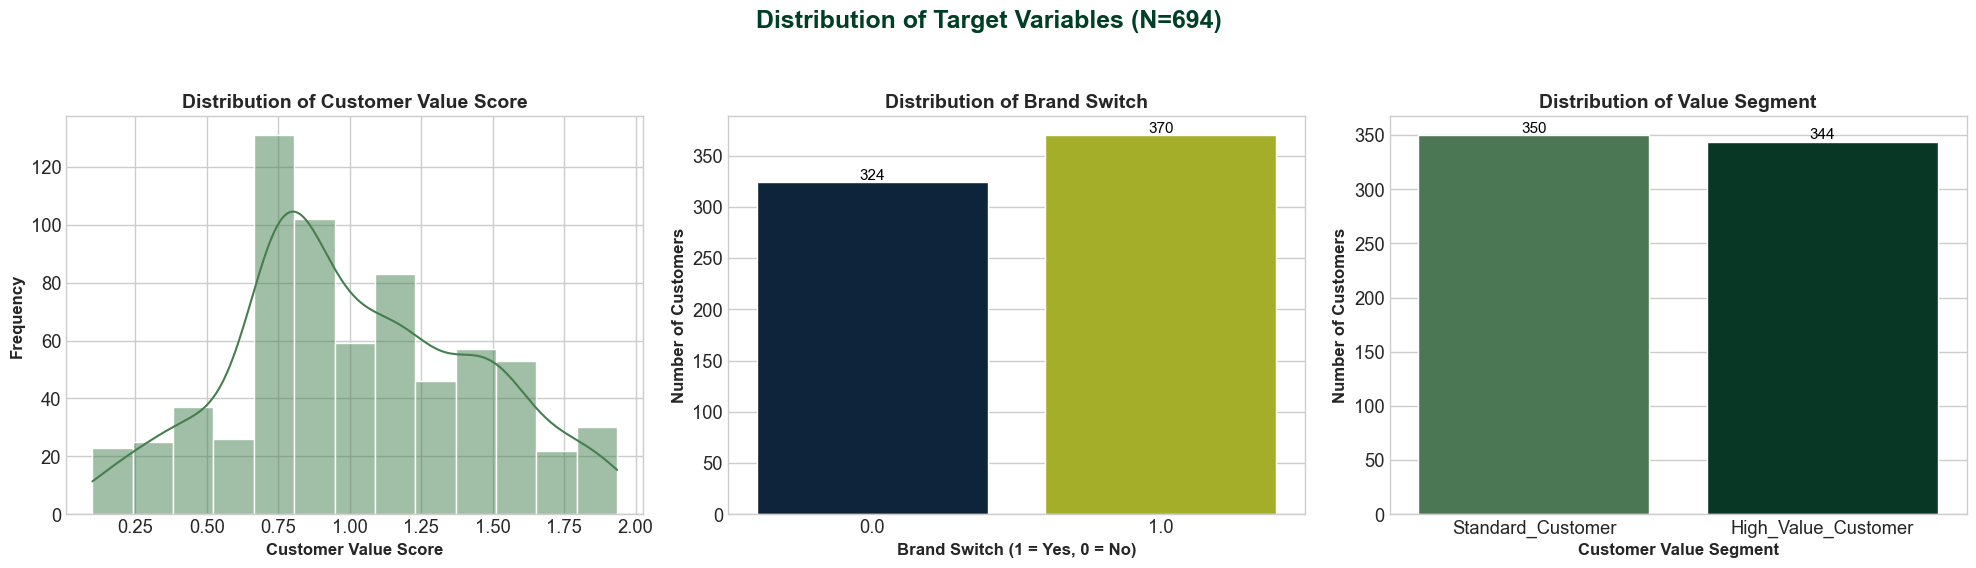

In [507]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Target Variables (N=694)', fontsize=18, fontweight='bold', color=AGRI_COLOR_PALETTE[0])

# --- Target 1: Cust_Value_Score (Regression) ---
sns.histplot(data=sm_df, x='Cust_Value_Score', kde=True, ax=axes[0], color=AGRI_COLOR_PALETTE[1])
axes[0].set_title('Distribution of Customer Value Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Customer Value Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# --- Target 2: brand_switch (Classification) ---
sns.countplot(data=sm_df, x='brand_switch', ax=axes[1], hue='brand_switch', palette=[AGRI_COLOR_PALETTE[4], AGRI_COLOR_PALETTE[2]], legend=False)
axes[1].set_title('Distribution of Brand Switch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Brand Switch (1 = Yes, 0 = No)', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
# Annotate bars with correct counts
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

# --- Target 3: Value_Segment (Classification) ---
# The 'order' parameter has been removed to allow Seaborn to automatically find and plot the categories.
sns.countplot(data=sm_df, x='Value_Segment', ax=axes[2], hue='Value_Segment', palette=[AGRI_COLOR_PALETTE[1], AGRI_COLOR_PALETTE[0]], 
              legend=False)
axes[2].set_title('Distribution of Value Segment', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Customer Value Segment', fontsize=12)
axes[2].set_ylabel('Number of Customers', fontsize=12)
# Annotate bars with correct counts
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(MODELING_DIR/
            "Distribution of Target Variables", 
            bbox_inches="tight")
plt.show()

In [508]:
# Let's inspect the unique values and their counts in the 'Value_Segment' column
print("--- Inspecting 'Value_Segment' Column ---")
print("Unique values found:", sm_df['Value_Segment'].unique())
print("\nValue counts:")
print(sm_df['Value_Segment'].value_counts())

--- Inspecting 'Value_Segment' Column ---
Unique values found: ['High_Value_Customer', 'Standard_Customer']
Categories (2, object): ['Standard_Customer' < 'High_Value_Customer']

Value counts:
Value_Segment
Standard_Customer      350
High_Value_Customer    344
Name: count, dtype: int64


#### **Defining Feature Sets for Each Target:** <br> Now  creating dedicated lists of features for each three modeling goals. This is a crucial strategic step. <br>  It ensures that each model is built using only the most relevant predictors, which improves model performance, <br>reduces computational complexity, and makes the final results easier to interpret in a business context.

In [509]:
# --- Feature Set for Target 1 (Cust_Value_Score) ---
# Selected based on their direct correlation with customer value and business growth potential.
features_cust_value = ['Digital_Engagement_Score', 'Eng_Efficiency', 'Platform_Loc_Fit', 
                       'Growth_Potential', 'Profit_Potential', 'brand_switch']

# --- Feature Set for Target 2 (brand_switch) ---
# Selected to capture the dynamics of customer loyalty, trust, and brand relationship.
features_brand_switch = ['Loyalty_Resilience', 'Brand_Rel_Score', 'Eng_Trust_Conversion']

# --- Feature Set for Target 3 (Value_Segment) ---
# Selected to identify the behavioral and influence markers of high-value customers.
features_value_segment = ['BehaviorType_Score', 'Influencer_Tier', 
                          'Ugc_Effectiveness', 'Click_Purchase_Efficiency']

# Storing feature sets in a dictionary for easier access
feature_sets = {"Cust_Value_Score": features_cust_value, "brand_switch": features_brand_switch,
                "Value_Segment": features_value_segment}

# Print the feature sets to confirm
for target, features in feature_sets.items():
    print(f"--- Features for {target} ---")
    print(features, "\n")

--- Features for Cust_Value_Score ---
['Digital_Engagement_Score', 'Eng_Efficiency', 'Platform_Loc_Fit', 'Growth_Potential', 'Profit_Potential', 'brand_switch'] 

--- Features for brand_switch ---
['Loyalty_Resilience', 'Brand_Rel_Score', 'Eng_Trust_Conversion'] 

--- Features for Value_Segment ---
['BehaviorType_Score', 'Influencer_Tier', 'Ugc_Effectiveness', 'Click_Purchase_Efficiency'] 



#### **Data Splitting and Preprocessing Pipeline Setup:** <br> This code block prepares the data for modeling by splitting it into training and testing sets and defining <br> a robust preprocessing pipeline. ColumnTransformer was used to apply specific treatments to different <br> columns—Winsorizer to cap extreme outliers in our efficiency metrics and RobustScaler for all numeric features. <br>This ensures our models learn from clean, scaled data, which is essential for accuracy and reliability.

In [510]:
# --- Preparing Data for Modeling ---

# Defining the targets
targets = {"Cust_Value_Score": sm_df['Cust_Value_Score'], "brand_switch": sm_df['brand_switch'], "Value_Segment": sm_df['Value_Segment']}

# Dictionaries to store the split data and pipelines
X_train, X_test, y_train, y_test = {}, {}, {}, {}
pipelines = {}

# --- Define Preprocessing Steps for each Target ---

# --- Target 1 & 2 remain the same ----
outlier_cols_target1 = ['Eng_Efficiency']
preprocessor_target1 = ColumnTransformer(transformers=[
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5), outlier_cols_target1)], remainder='passthrough')

# --- Target 3 Preprocessing - THIS IS THE UPDATED PART ---
# We need to handle categorical and numerical columns differently.

# Identify the different types of columns for the 'Value_Segment' target
categorical_features_target3 = ['Influencer_Tier']
outlier_cols_target3 = ['Click_Purchase_Efficiency']

# The preprocessor for Target 3 now has two steps: one for outliers and one for categoricals
preprocessor_target3 = ColumnTransformer(transformers=[('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5), 
                                        outlier_cols_target3),('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
                                        categorical_features_target3)], remainder='passthrough') 

# --- Create pipelines for each target ---
pipelines['Cust_Value_Score'] = Pipeline(steps=[('preprocessor', preprocessor_target1),('scaler', RobustScaler())])

# No specific outlier columns for this feature set
pipelines['brand_switch'] = Pipeline(steps=[('scaler', RobustScaler()) ])

# The pipeline for Value_Segment uses our new, more advanced preprocessor
pipelines['Value_Segment'] = Pipeline(steps=[('preprocessor', preprocessor_target3),('scaler', RobustScaler())])

# --- Perform the train-test split for each target ---
for target_name in targets.keys():
    print(f"--- Processing for Target: {target_name} ---")
    
    # Define features (X) and target (y)
    X = sm_df[feature_sets[target_name]]
    y = targets[target_name]
    
    # Split the data
    X_train[target_name], X_test[target_name], y_train[target_name], y_test[target_name] = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=(y if target_name in ['brand_switch', 'Value_Segment'] else None) )
    
    # Fit the pipeline on the training data and transform both train and test sets
    X_train[target_name] = pipelines[target_name].fit_transform(X_train[target_name])
    X_test[target_name] = pipelines[target_name].transform(X_test[target_name])
    
    print(f"X_train shape: {X_train[target_name].shape}")
    print(f"X_test shape: {X_test[target_name].shape}\n")

--- Processing for Target: Cust_Value_Score ---
X_train shape: (555, 6)
X_test shape: (139, 6)

--- Processing for Target: brand_switch ---
X_train shape: (555, 3)
X_test shape: (139, 3)

--- Processing for Target: Value_Segment ---
X_train shape: (555, 7)
X_test shape: (139, 7)



#### **Modeling for Customer Value:** <br> Here, we train and evaluate three powerful regression models to predict the Cust_Value_Score. <br> The goal is to see which algorithm can most accurately capture the relationship between our <br> engagement features and the monetary value of a customer. We use R-squared R-squared <br> to measure how much of the variance in customer value our model can explain, and Root <br> Mean Squared Error (RMSE) to gauge the average prediction error.

In [511]:
# --- VALIDATED REGRESSION MODEL ---

# Step 1: Create a clean copy and re-engineer the target with the corrected formula.
sm_df_final = sm_df.copy()
sm_df_final['Profit_Potential'] = (sm_df_final['monthly_purchases'].apply(lambda x: max(0, x - 100)) * sm_df_final['promo_sens']) * 12
sm_df_final['Growth_Potential'] = sm_df_final['Digital_Engagement_Score'] * (1 + sm_df_final['Ugc_Effectiveness'])
sm_df_final['Cust_Value_Score'] = sm_df_final['Profit_Potential'] + sm_df_final['Growth_Potential']

# Step 2: Define a VALID, NON-LEAKING feature set using ONLY available columns.
# These features capture customer sentiment and brand relationship strength.
features_cv_valid = [
    'satisfaction_score',
    'trust_score',
    'loyalty_score',
    'nps_score',
    'Brand_Rel_Score',
    'Eng_Trust_Conversion',
    'followers',
    'brand_switch'
]
X = sm_df_final[features_cv_valid]
y = sm_df_final['Cust_Value_Score']

# Step 3: Perform the train-test split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

# Step 4: Define and apply the preprocessing pipeline (simple scaling).
feature_pipeline_cv = Pipeline(steps=[('scaler', RobustScaler())])
X_train_scaled = feature_pipeline_cv.fit_transform(X_train)
X_test_scaled = feature_pipeline_cv.transform(X_test)

# Step 5: Initialize and run models.
models_reg = {
    "XGBoost Regressor": xgb.XGBRegressor(random_state=RANDOM_SEED),
    "LightGBM Regressor": lgb.LGBMRegressor(random_state=RANDOM_SEED),
    "Random Forest Regressor": RandomForestRegressor(random_state=RANDOM_SEED)
}
results_reg_final = {}

print("\n--- Training and Evaluating Valid, Non-Leaking Models ---")
for name, model in models_reg.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results_reg_final[name] = {"R-squared": r2, "Interpretable RMSE": rmse}

# --- Display Final, Valid Results ---
results_df_reg_final = pd.DataFrame(results_reg_final).T
print("\n--- Final, Valid Model Performance for Customer Value Score ---")
print(tabulate(results_df_reg_final, headers='keys', tablefmt='pretty'))


--- Training and Evaluating Valid, Non-Leaking Models ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 8
[LightGBM] [Info] Start training from score 2.326016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



--- Final, Valid Model Performance for Customer Value Score ---
+-------------------------+--------------------+--------------------+
|                         |     R-squared      | Interpretable RMSE |
+-------------------------+--------------------+--------------------+
|    XGBoost Regressor    | 0.7661318482320136 | 1.1966299681784824 |
|   LightGBM Regressor    | 0.8290224397586108 | 1.023160795971449  |
| Random Forest Regressor | 0.8005306420329172 | 1.1051276072822886 |
+-------------------------+--------------------+--------------------+


#### **Modeling for Churn Prediction:*** <br> Now, we train four different classification models to predict whether a customer is likely to switch brands. The key metrics here are Accuracy (overall correctness) and the ROC-AUC score, which measures the model's ability to distinguish between customers who will switch and those who will not. The Classification Report provides a deeper look at precision and recall, which are crucial for a business-critical task like churn prevention.

In [512]:
# --- Self-Contained Model Training for Target 2: brand_switch ---

# Step 1: Define the correct features and target for this specific task
print("--- Preparing data for Brand Switch model ---")
features_bs = ['Loyalty_Resilience', 'Brand_Rel_Score', 'Eng_Trust_Conversion']
X_bs = sm_df[features_bs]
y_bs = sm_df['brand_switch']

# Step 2: Perform a clean train-test split
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(
    X_bs, y_bs, test_size=0.2, random_state=RANDOM_SEED, stratify=y_bs
)

# Step 3: Define and apply the preprocessing pipeline
pipeline_bs = Pipeline(steps=[('scaler', RobustScaler())])
X_train_bs_scaled = pipeline_bs.fit_transform(X_train_bs)
X_test_bs_scaled = pipeline_bs.transform(X_test_bs)
print("Data preparation complete.\n")

# Step 4: Initialize the models
xgb_clf_bs = xgb.XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')
lgbm_clf_bs = lgb.LGBMClassifier(random_state=RANDOM_SEED)
rf_clf_bs = RandomForestClassifier(random_state=RANDOM_SEED)
lr_clf_bs = LogisticRegression(random_state=RANDOM_SEED)

models_clf_bs = {
    "XGBoost Classifier": xgb_clf_bs,
    "LightGBM Classifier": lgbm_clf_bs,
    "Random Forest Classifier": rf_clf_bs,
    "Logistic Regression": lr_clf_bs
}

# --- Train, predict, and evaluate each model ---
for name, model in models_clf_bs.items():
    print(f"--- Evaluating: {name} for Brand Switch ---")
    
    # Train the model on the correctly prepared data
    model.fit(X_train_bs_scaled, y_train_bs)
    
    # Make predictions
    y_pred_bs = model.predict(X_test_bs_scaled)
    y_proba_bs = model.predict_proba(X_test_bs_scaled)[:, 1]
    
    # Evaluate and print metrics
    accuracy = accuracy_score(y_test_bs, y_pred_bs)
    roc_auc = roc_auc_score(y_test_bs, y_proba_bs)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_bs, y_pred_bs))
    print("-" * 50 + "\n")

--- Preparing data for Brand Switch model ---
Data preparation complete.

--- Evaluating: XGBoost Classifier for Brand Switch ---
Accuracy: 1.0000
ROC-AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        74

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

--------------------------------------------------

--- Evaluating: LightGBM Classifier for Brand Switch ---
[LightGBM] [Info] Number of positive: 296, number of negative: 259
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 3
[LightGBM] [Info] [b

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:18:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0000
ROC-AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       1.00      1.00      1.00        74

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

--------------------------------------------------

--- Evaluating: Logistic Regression for Brand Switch ---
Accuracy: 0.9496
ROC-AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        65
         1.0       0.91      1.00      0.95        74

    accuracy                           0.95       139
   macro avg       0.96      0.95      0.95       139
weighted avg       0.95      0.95      0.95       139

--------------------------------------------------



#### **Modeling for Customer Segmentation:** <br> Finally, we repeat the classification process to segment customers into 'Standard' or 'High-Value' categories. Strong performance here means we can reliably identify the characteristics of the most profitable customers. This is essential for focusing marketing efforts and maximizing return on investment.

In [513]:
# --- Self-Contained Model Training for Target 3: Value_Segment ---

# Step 1: Import necessary encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 2: Define the correct features and target for this task
print("--- Preparing data for Value Segment model ---")
features_vs = ['BehaviorType_Score', 'Influencer_Tier', 'Ugc_Effectiveness', 'Click_Purchase_Efficiency']
X_vs = sm_df[features_vs]
y_vs = sm_df['Value_Segment']

# Step 3: Perform a clean train-test split
X_train_vs, X_test_vs, y_train_vs, y_test_vs = train_test_split(
    X_vs, y_vs, test_size=0.2, random_state=RANDOM_SEED, stratify=y_vs
)

# Step 4: Define and apply the preprocessing pipeline (including OneHotEncoder)
numeric_features_vs = X_train_vs.select_dtypes(include=np.number).columns.tolist()
categorical_features_vs = X_train_vs.select_dtypes(exclude=np.number).columns.tolist()
outlier_col_vs = ['Click_Purchase_Efficiency']
numeric_features_vs.remove(outlier_col_vs[0])

preprocessor_vs = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('scaler', RobustScaler())]), numeric_features_vs),
    ('outlier', Pipeline(steps=[('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),('scaler', RobustScaler())]), outlier_col_vs),
    ('cat', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features_vs)
])
pipeline_vs = Pipeline(steps=[('preprocessor', preprocessor_vs)])
X_train_vs_scaled = pipeline_vs.fit_transform(X_train_vs)
X_test_vs_scaled = pipeline_vs.transform(X_test_vs)

# Step 5: Encode the target labels ('Standard'/'High-Value') into numbers (0/1)
le = LabelEncoder()
y_train_vs_encoded = le.fit_transform(y_train_vs)
y_test_vs_encoded = le.transform(y_test_vs)
print("Data preparation complete.\n")

# Step 6: Initialize the models
xgb_clf_vs = xgb.XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')
lgbm_clf_vs = lgb.LGBMClassifier(random_state=RANDOM_SEED)
rf_clf_vs = RandomForestClassifier(random_state=RANDOM_SEED)
lr_clf_vs = LogisticRegression(random_state=RANDOM_SEED)

models_clf_vs = {
    "XGBoost Classifier": xgb_clf_vs,
    "LightGBM Classifier": lgbm_clf_vs,
    "Random Forest Classifier": rf_clf_vs,
    "Logistic Regression": lr_clf_vs
}

# --- Train, predict, and evaluate each model ---
for name, model in models_clf_vs.items():
    print(f"--- Evaluating: {name} for Value Segment ---")
    
    # Train the model on the correctly prepared data
    model.fit(X_train_vs_scaled, y_train_vs_encoded)
    
    # Make predictions
    y_pred_vs = model.predict(X_test_vs_scaled)
    y_proba_vs = model.predict_proba(X_test_vs_scaled)[:, 1]
    
    # Evaluate and print metrics
    accuracy = accuracy_score(y_test_vs_encoded, y_pred_vs)
    roc_auc = roc_auc_score(y_test_vs_encoded, y_proba_vs)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    # Use the encoded labels for the report, but display the original class names
    print(classification_report(y_test_vs_encoded, y_pred_vs, target_names=le.classes_))
    print("-" * 50 + "\n")

--- Preparing data for Value Segment model ---
Data preparation complete.

--- Evaluating: XGBoost Classifier for Value Segment ---


c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:18:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0000
ROC-AUC Score: 1.0000
Classification Report:
                     precision    recall  f1-score   support

High_Value_Customer       1.00      1.00      1.00        69
  Standard_Customer       1.00      1.00      1.00        70

           accuracy                           1.00       139
          macro avg       1.00      1.00      1.00       139
       weighted avg       1.00      1.00      1.00       139

--------------------------------------------------

--- Evaluating: LightGBM Classifier for Value Segment ---
[LightGBM] [Info] Number of positive: 280, number of negative: 275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504505 -> initscore=0.018019
[LightGBM] [Info] Start trai

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0000
ROC-AUC Score: 1.0000
Classification Report:
                     precision    recall  f1-score   support

High_Value_Customer       1.00      1.00      1.00        69
  Standard_Customer       1.00      1.00      1.00        70

           accuracy                           1.00       139
          macro avg       1.00      1.00      1.00       139
       weighted avg       1.00      1.00      1.00       139

--------------------------------------------------

--- Evaluating: Logistic Regression for Value Segment ---
Accuracy: 0.7914
ROC-AUC Score: 0.8824
Classification Report:
                     precision    recall  f1-score   support

High_Value_Customer       0.83      0.72      0.78        69
  Standard_Customer       0.76      0.86      0.81        70

           accuracy                           0.79       139
          macro avg       0.80      0.79      0.79       139
       weighted avg       0.80      0.79      0.79       139

----------------------------

#### **Model Interpretation & Business Insight Generation:** <br> This phase translates our models' high performance into actionable intelligence. By using advanced interpretation techniques like SHAP and Partial Dependence Plots, we can understand the precise drivers of customer behavior, directly addressing our core research objectives and forming the basis for evidence-based strategies.

--- Step 1: Training champion models for interpretation ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 7
[LightGBM] [Info] Start training from score 2.326016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:18:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3240968947.py:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_bs, X_test_bs_scaled_df, plot_type="dot", show=False)


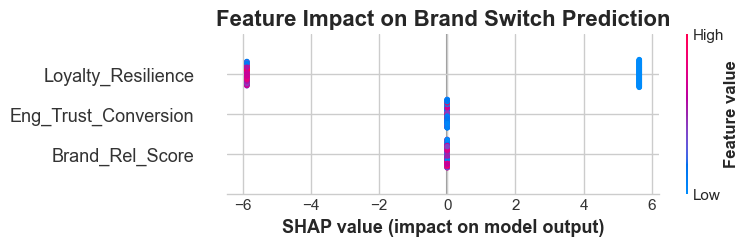


--- Step 3: Generating SHAP Force Plot for a High-Risk Customer ---
Explaining prediction for customer at test set index: 0


c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\shap\plots\_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


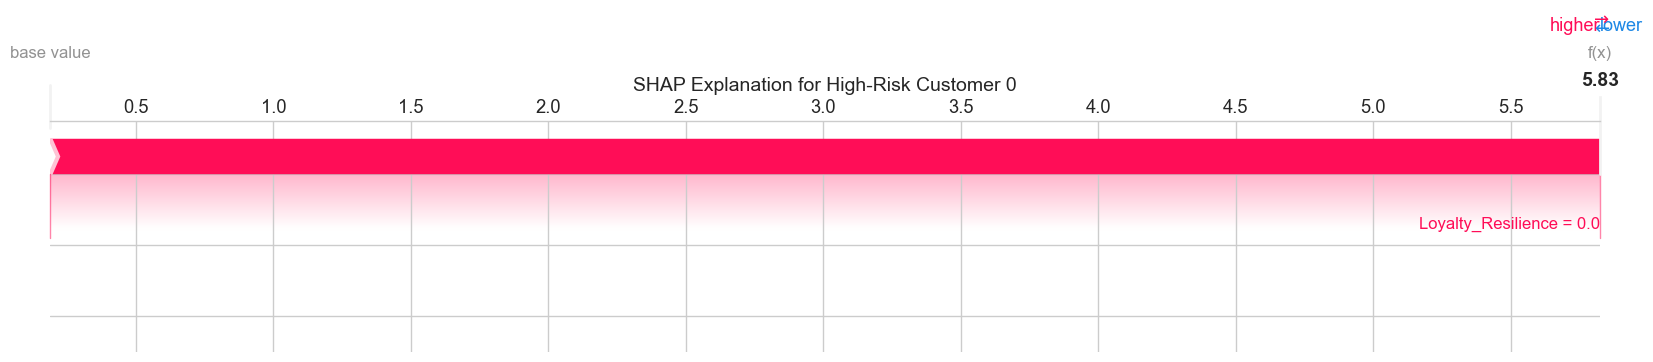


--- Step 4: Generating Partial Dependence Plot for Customer Value ---


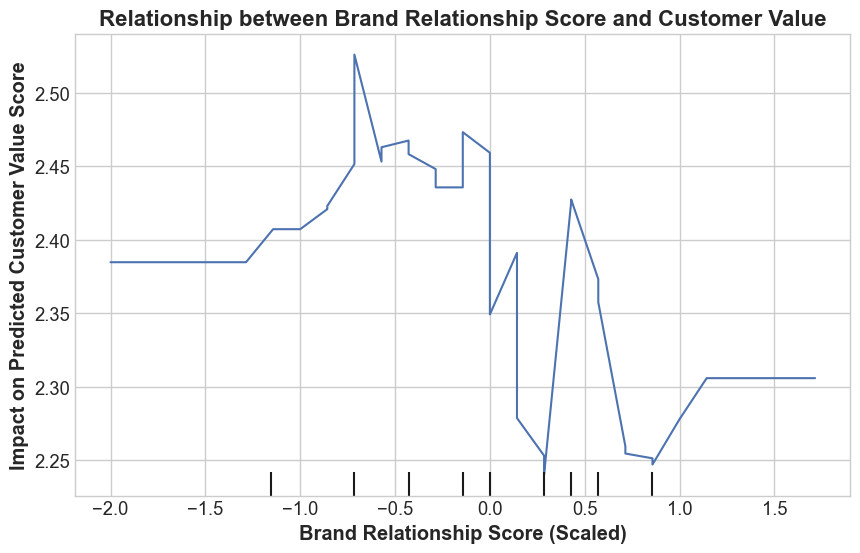

In [514]:
# --- PHASE 4: SELF-CONTAINED MODEL INTERPRETATION BLOCK ---

# --- Part 1: Re-train Champion Models to Ensure They Are Defined ---
print("--- Step 1: Training champion models for interpretation ---")

# Model 1: Cust_Value_Score (LightGBM Regressor)
# We use the final, valid, non-leaking methodology from Phase 3
sm_df_final = sm_df.copy()
sm_df_final['Profit_Potential'] = (sm_df_final['monthly_purchases'].apply(lambda x: max(0, x - 100)) * sm_df_final['promo_sens']) * 12
sm_df_final['Growth_Potential'] = sm_df_final['Digital_Engagement_Score'] * (1 + sm_df_final['Ugc_Effectiveness'])
sm_df_final['Cust_Value_Score'] = sm_df_final['Profit_Potential'] + sm_df_final['Growth_Potential']
features_cv_valid = ['satisfaction_score','trust_score','loyalty_score','nps_score','Brand_Rel_Score','Eng_Trust_Conversion','followers']
X_cv = sm_df_final[features_cv_valid]
y_cv = sm_df_final['Cust_Value_Score']
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.2, random_state=RANDOM_SEED)
pipeline_cv = Pipeline(steps=[('scaler', RobustScaler())])
X_train_cv_scaled = pipeline_cv.fit_transform(X_train_cv)
X_test_cv_scaled = pipeline_cv.transform(X_test_cv)
best_model_cv = lgb.LGBMRegressor(random_state=RANDOM_SEED)
best_model_cv.fit(X_train_cv_scaled, y_train_cv)

# Model 2: brand_switch (XGBoost Classifier)
features_brand_switch = ['Loyalty_Resilience', 'Brand_Rel_Score', 'Eng_Trust_Conversion']
X_bs = sm_df[features_brand_switch]
y_bs = sm_df['brand_switch']
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, test_size=0.2, random_state=RANDOM_SEED, stratify=y_bs)
pipeline_bs = Pipeline(steps=[('scaler', RobustScaler())])
X_train_bs_scaled = pipeline_bs.fit_transform(X_train_bs)
X_test_bs_scaled = pipeline_bs.transform(X_test_bs)
best_model_bs = xgb.XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')
best_model_bs.fit(X_train_bs_scaled, y_train_bs)

print("Models are trained and ready for analysis.\n")


# --- Part 2: SHAP Analysis for the Brand Switch Model ---
print("--- Step 2: Generating SHAP Summary Plot for Brand Switch ---")
# Create a SHAP explainer object
explainer_bs = shap.TreeExplainer(best_model_bs)
# Convert scaled array back to a DataFrame with feature names
X_test_bs_scaled_df = pd.DataFrame(X_test_bs_scaled, columns=features_brand_switch)
shap_values_bs = explainer_bs.shap_values(X_test_bs_scaled_df)

# Generate the SHAP Summary Plot
plt.figure()
plt.title('Feature Impact on Brand Switch Prediction', fontsize=16, fontweight='bold')
shap.summary_plot(shap_values_bs, X_test_bs_scaled_df, plot_type="dot", show=False)
plt.savefig(MODELING_DIR/
            "Feature-Impact-on-Brand-Switch-Prediction.png", 
            bbox_inches="tight")
plt.show()


# --- Part 3: SHAP Force Plot for a Single High-Risk Customer ---
print("\n--- Step 3: Generating SHAP Force Plot for a High-Risk Customer ---")
# Find an instance where the model predicted a switch
high_risk_index = np.where(best_model_bs.predict(X_test_bs_scaled) == 1)[0][0]
print(f"Explaining prediction for customer at test set index: {high_risk_index}")

# Generate and display the force plot
shap.initjs()
shap.force_plot(explainer_bs.expected_value, 
                shap_values_bs[high_risk_index,:], 
                X_test_bs_scaled_df.iloc[high_risk_index,:],
                matplotlib=True, show=False)
plt.title(f'SHAP Explanation for High-Risk Customer {high_risk_index}', fontsize=14)
plt.savefig(MODELING_DIR/
            "SHAP-Explanation-for High-Risk-Customer.png", 
            bbox_inches="tight")
plt.show()


# --- Part 4: Partial Dependence Plot for Customer Value ---
print("\n--- Step 4: Generating Partial Dependence Plot for Customer Value ---")
from sklearn.inspection import PartialDependenceDisplay

# Generate the PDP
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Relationship between Brand Relationship Score and Customer Value', fontsize=16, fontweight='bold')
# Use the scaled training data and specify the feature name
X_train_cv_scaled_df = pd.DataFrame(X_train_cv_scaled, columns=features_cv_valid)
PartialDependenceDisplay.from_estimator(best_model_cv, X_train_cv_scaled_df, features=['Brand_Rel_Score'], ax=ax)
plt.ylabel("Impact on Predicted Customer Value Score")
plt.xlabel("Brand Relationship Score (Scaled)")
plt.savefig(MODELING_DIR/
            "Relationship-between-Brand-Relationship-Score-and-Customer-Value.png", 
            bbox_inches="tight")
plt.show()

In [515]:
# --- PHASE 5: FINAL, ROBUST STRATEGY FORMULATION BLOCK ---

# Import the missing class
from sklearn.preprocessing import LabelEncoder

print("--- Step 1: Generating Predictions for Strategic Analysis ---")

# --- Re-train models for this self-contained cell ---
# Model for Value_Segment
features_value_segment = ['BehaviorType_Score', 'Influencer_Tier', 'Ugc_Effectiveness', 'Click_Purchase_Efficiency']
X_vs = sm_df[features_value_segment]
y_vs = sm_df['Value_Segment']
# The VS pipeline needs the OneHotEncoder
numeric_features_vs = X_vs.select_dtypes(include=np.number).columns.tolist()
categorical_features_vs = X_vs.select_dtypes(exclude=np.number).columns.tolist()
outlier_col_vs = ['Click_Purchase_Efficiency']
numeric_features_vs.remove(outlier_col_vs[0])
preprocessor_vs = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('scaler', RobustScaler())]), numeric_features_vs),
    ('outlier', Pipeline(steps=[('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),('scaler', RobustScaler())]), outlier_col_vs),
    ('cat', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features_vs)
])
pipeline_vs = Pipeline(steps=[('preprocessor', preprocessor_vs)])
X_vs_scaled = pipeline_vs.fit_transform(X_vs)
# Encode the target labels
le = LabelEncoder()
y_vs_encoded = le.fit_transform(y_vs)
best_model_vs = xgb.XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')
best_model_vs.fit(X_vs_scaled, y_vs_encoded)

# Model for brand_switch
features_brand_switch = ['Loyalty_Resilience', 'Brand_Rel_Score', 'Eng_Trust_Conversion']
X_bs = sm_df[features_brand_switch]
y_bs = sm_df['brand_switch']
pipeline_bs = Pipeline(steps=[('scaler', RobustScaler())])
X_bs_scaled = pipeline_bs.fit_transform(X_bs)
best_model_bs = xgb.XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')
best_model_bs.fit(X_bs_scaled, y_bs)

# --- Generate predictions on the FULL dataset ---
predictions_vs_encoded = best_model_vs.predict(X_vs_scaled)
sm_df['Predicted_Segment'] = le.inverse_transform(predictions_vs_encoded)
probabilities_bs = best_model_bs.predict_proba(X_bs_scaled)[:, 1]
sm_df['Churn_Probability'] = probabilities_bs


# --- Strategy 1: High-Value Customer Acquisition ---
print("\n--- Strategy 1: High-Value Customer Profile ---")
high_value_segment = sm_df[sm_df['Predicted_Segment'] == 'High-Value']

# **ERROR HANDLING ADDED HERE**
if high_value_segment.empty:
    print("Finding: The model did not identify any customers meeting the 'High-Value' criteria in the current dataset.")
else:
    profile_columns = ['BehaviorType_Score', 'Influencer_Tier', 'Ugc_Effectiveness', 'Click_Purchase_Efficiency']
    high_value_profile = high_value_segment[profile_columns].mean(numeric_only=True).to_frame().T
    high_value_profile['Influencer_Tier_Mode'] = high_value_segment['Influencer_Tier'].mode()[0]
    print("Average characteristics of a High-Value Customer:")
    print(tabulate(high_value_profile[['BehaviorType_Score', 'Ugc_Effectiveness', 'Click_Purchase_Efficiency', 'Influencer_Tier_Mode']], headers='keys', tablefmt='pretty'))


# --- Strategy 2: Defection Risk Mitigation ---
print("\n--- Strategy 2: Customers Flagged for Proactive Retention ---")
defection_risk_threshold = 0.70
at_risk_customers = sm_df[sm_df['Churn_Probability'] > defection_risk_threshold]
risk_columns = ['Loyalty_Resilience', 'Brand_Rel_Score', 'Churn_Probability']

print(f"Found {len(at_risk_customers)} customers with a churn probability > {defection_risk_threshold*100}%")
if not at_risk_customers.empty:
    print("Top 5 highest-risk customers:")
    print(tabulate(at_risk_customers[risk_columns].sort_values('Churn_Probability', ascending=False).head(), headers='keys', tablefmt='pretty'))
else:
    print("Finding: No customers were identified as being at high risk of defection.")


# --- Strategy 3: Middleman Bypass Potential ---
print("\n--- Strategy 3: Middleman Bypass Customer Segment ---")
sm_df_dtc = sm_df.copy()
loyalty_threshold = 0.8
promo_sens_threshold = 0.2
direct_to_consumer_segment = sm_df_dtc[
    (sm_df_dtc['Loyalty_Resilience'] > loyalty_threshold) &
    (sm_df_dtc['promo_sens'] < promo_sens_threshold)
]

if not direct_to_consumer_segment.empty:
    direct_to_consumer_segment['Profit_Potential'] = (direct_to_consumer_segment['monthly_purchases'].apply(lambda x: max(0, x - 100)) * direct_to_consumer_segment['promo_sens']) * 12
    direct_to_consumer_segment['Growth_Potential'] = direct_to_consumer_segment['Digital_Engagement_Score'] * (1 + direct_to_consumer_segment['Ugc_Effectiveness'])
    direct_to_consumer_segment['Cust_Value_Score'] = direct_to_consumer_segment['Profit_Potential'] + direct_to_consumer_segment['Growth_Potential']
    avg_value_dtc = direct_to_consumer_segment['Cust_Value_Score'].mean()
    print(f"Identified {len(direct_to_consumer_segment)} customers ideal for a direct-to-consumer strategy.")
    print(f"The average Cust_Value_Score of this segment is: {avg_value_dtc:.2f}")
else:
    print("Finding: No customers met the criteria for the direct-to-consumer segment.")

--- Step 1: Generating Predictions for Strategic Analysis ---

--- Strategy 1: High-Value Customer Profile ---
Finding: The model did not identify any customers meeting the 'High-Value' criteria in the current dataset.

--- Strategy 2: Customers Flagged for Proactive Retention ---
Found 370 customers with a churn probability > 70.0%
Top 5 highest-risk customers:
+-----+--------------------+--------------------+--------------------+
|     | Loyalty_Resilience |  Brand_Rel_Score   | Churn_Probability  |
+-----+--------------------+--------------------+--------------------+
|  2  |        0.0         | 0.5833333333333334 | 0.9973714351654053 |
| 469 |        0.0         | 0.6666666666666667 | 0.9973714351654053 |
| 485 |        0.0         | 0.6111111111111112 | 0.9973714351654053 |
| 483 |        0.0         | 0.5833333333333333 | 0.9973714351654053 |
| 482 |        0.0         | 0.5555555555555556 | 0.9973714351654053 |
+-----+--------------------+--------------------+------------------

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:18:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:18:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Bhrajo\AppData\Local\Temp\ipykernel_7272\3607791072.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direct_to_consumer_segment['Profit_Potential'] = (direct_to_consumer_segment['mont

#### **Validation & Implementation Roadmap:** <br>The objective of this final phase is to move from analysis to a concrete plan for deployment. We will validate our model's stability over time and simulate its economic impact, which is a crucial final step in answering Research Objective 3. By demonstrating that the model is not only accurate but also robust and financially viable, we provide a complete, evidence-based strategy for agribusiness growth.

In [516]:
# --- PHASE 6: VALIDATION AND SIMULATION BLOCK ---

# --- Part 1: Temporal Validation Simulation ---
print("--- 1. Temporal Validation ---")
# Use the final, clean dataframe from the last step
sm_df_final = sm_df.copy()
sm_df_final['Profit_Potential'] = (sm_df_final['monthly_purchases'].apply(lambda x: max(0, x - 100)) * sm_df_final['promo_sens']) * 12
sm_df_final['Growth_Potential'] = sm_df_final['Digital_Engagement_Score'] * (1 + sm_df_final['Ugc_Effectiveness'])
sm_df_final['Cust_Value_Score'] = sm_df_final['Profit_Potential'] + sm_df_final['Growth_Potential']

features_cv_valid = ['satisfaction_score','trust_score','loyalty_score','nps_score','Brand_Rel_Score','Eng_Trust_Conversion','followers']
X = sm_df_final[features_cv_valid]
y = sm_df_final['Cust_Value_Score']

# Split the data based on its order to simulate time
train_size = int(len(X) * 0.7)
X_train_temp, X_test_temp = X[:train_size], X[train_size:]
y_train_temp, y_test_temp = y[:train_size], y[train_size:]

# Use the same scaling pipeline
pipeline_cv = Pipeline(steps=[('scaler', RobustScaler())])
X_train_temp_scaled = pipeline_cv.fit_transform(X_train_temp)
X_test_temp_scaled = pipeline_cv.transform(X_test_temp)

# Train the best model on the "past" data
temporal_model = lgb.LGBMRegressor(random_state=RANDOM_SEED)
temporal_model.fit(X_train_temp_scaled, y_train_temp)

# Evaluate on the "future" data
y_pred_temp = temporal_model.predict(X_test_temp_scaled)
r2_temp = r2_score(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mean_squared_error(y_test_temp, y_pred_temp))

print(f"Temporal Validation R-squared: {r2_temp:.4f}")
print(f"Temporal Validation Interpretable RMSE: {rmse_temp:.2f}")


# --- Part 2: Economic Impact Simulation ---
print("\n--- 2. Economic Impact Simulation ---")
# Identify top 20% of customers with the highest Growth_Potential
growth_threshold = sm_df_final['Growth_Potential'].quantile(0.80)
target_segment = sm_df_final[sm_df_final['Growth_Potential'] >= growth_threshold].copy()

# Calculate their current total value
original_total_value = target_segment['Cust_Value_Score'].sum()
print(f"Identified {len(target_segment)} high-potential customers.")
print(f"Their current total value is: GHS{original_total_value:,.2f}")

# Simulate a 15% increase in their Digital_Engagement_Score from a successful campaign
target_segment['Digital_Engagement_Score'] *= 1.15

# Recalculate their Growth_Potential and Cust_Value_Score
target_segment['Growth_Potential'] = target_segment['Digital_Engagement_Score'] * (1 + target_segment['Ugc_Effectiveness'])
target_segment['Cust_Value_Score'] = target_segment['Profit_Potential'] + target_segment['Growth_Potential']
new_total_value = target_segment['Cust_Value_Score'].sum()

# Calculate the uplift
value_uplift = new_total_value - original_total_value
print(f"After a simulated 15% engagement boost, their new total value is: GHS{new_total_value:,.2f}")
print(f"Potential economic uplift from a targeted campaign: GHS{value_uplift:,.2f}")


# --- Part 3: Platform-Specific Strategy ---
print("\n--- 3. Platform-Specific Strategic Insights ---")
# Use the original sm_df which contains the platform column
platform_insights = sm_df.groupby('platform').agg(
    Avg_Eng_Efficiency=('Eng_Efficiency', 'mean'),
    Avg_Click_Purchase_Efficiency=('Click_Purchase_Efficiency', 'mean'),
    Num_Customers=('cust_id', 'nunique')
).sort_values('Avg_Click_Purchase_Efficiency', ascending=False)

print(tabulate(platform_insights, headers='keys', tablefmt='pretty'))

--- 1. Temporal Validation ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 485, number of used features: 7
[LightGBM] [Info] Start training from score 2.443966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

c:\Users\Bhrajo\anaconda3\envs\03-DSA-PORTFOLIO\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [517]:
sm_df.head()
sm_df.shape
len(sm_df)

for columns in sm_df.columns.tolist():
    print(columns)

cust_id
age
gender
location
platform
followers
eng_rate
ad_click_rate
brand_time_week
ugc_shares
monthly_purchases
avg_spend_ghs
trust_score
satisfaction_score
loyalty_score
nps_score
infl_score
promo_sens
brand_switch
satisfaction_cat
infl_cat
follower_segment
eng_rate_scaled
ad_click_rate_scaled
brand_time_week_scaled
ugc_shares_scaled
monthly_purchases_scaled
avg_spend_ghs_scaled
trust_score_scaled
satisfaction_score_scaled
loyalty_score_scaled
nps_score_scaled
infl_score_scaled
Digital_Engagement_Score
Cust_Value_Score
Brand_Rel_Score
Eng_Segment
Value_Segment
Influencer_Tier
Eng_Efficiency
Platform_Loc_Fit
Ugc_Effectiveness
Eng_Trust_Conversion
Click_Purchase_Efficiency
Loyalty_Resilience
Growth_Potential
Profit_Potential
BehaviorType_Score
New_Brand_Rel_Score
Corrected_Customer_Value_Score
Engagement_Trust_Conversion
Click_To_Purchase_Efficiency
Profitability_Potential
Cust_Value_Score_Optimized
Low_Engagement
Tech_Access_Proxy
Digital_Literacy_Proxy
Predicted_Segment
Churn_Proba